# This notebook is a Sentiment Analysis of Dr. Will's wesbite and retailer reviews.

# Install Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import html
import re
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
from ipywidgets import interact, widgets

In [3]:
# Reload full dataset
df_external = pd.read_csv("External Reviews.csv")

# Check total number of reviews
print("Full dataset shape:", df_external.shape)

# Show unique products
print("Unique product names:", df_external['product'].nunique())


Full dataset shape: (473, 5)
Unique product names: 15


# Data Preparation

## Yotpo Reviews

In [4]:
df_yotpo = pd.read_csv('/content/Yotpo Reviews copy.csv')
df_yotpo.head()

app_key  Review ID Review Creation Date  \
0  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  708305901     10/05/2025 22:56   
1  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  707537715     10/05/2025 12:15   
2  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  706975012     10/05/2025 06:57   
3  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  706760398     09/05/2025 21:09   
4  m8haUpltDsBafOcODlduyCApOhqNnWXKZFanlc1I  705102399     07/05/2025 11:37   

      Review Type Review Status Status Details             Review Source  \
0  product_review     Published            NaN                 widget_v2   
1  product_review     Published            NaN                  reminder   
2  product_review     Published            NaN                  reminder   
3     site_review     Published            NaN  review_request_link_site   
4  product_review     Published            NaN                  reminder   

   Review Score               Review Title  \
0             3  Wish it was seed oil free   
1             5              No going back   
2             5     Avocado oil mayonnaise   
3             5                   Avo mayo   
4             5        Classic mayo winner   

                                      Review Content  ...  \
0  It is made with seed oils - rapeseed oil. What...  ...   
1  We swapped our normal big brand mayo to Japane...  ...   
2  I really like your mayonnaise although I would...  ...   
3  Superb product delicious and healthy! \nAnd ex...  ...   
4  Most majors are tangy and I&#x27;ve never been...  ...   

                     Product Handle Product Group Product Category  \
0  dr-wills-chipotle-ranch-dressing           NaN              NaN   
1         dr-wills-avocado-oil-mayo           NaN              NaN   
2         dr-wills-avocado-oil-mayo           NaN              NaN   
3                               NaN           NaN              NaN   
4             dr-wills-classic-mayo           NaN              NaN   

  Product UPC  Product SKU  Product Brand Product MPN Product ISBN  \
0         NaN         125s            NaN         NaN          NaN   
1         NaN          68s            NaN         NaN          NaN   
2         NaN          68s            NaN         NaN          NaN   
3         NaN          NaN            NaN         NaN          NaN   
4         NaN         120s            NaN         NaN          NaN   

   Incentivized Flag                                  Metaobject handle  
0                NaN  eb7dfd7d-db44-4334-bc49-c893b51b36cf-4bc9996f-...  
1                NaN                                                NaN  
2                NaN                                                NaN  
3                NaN                                                NaN  
4                NaN  eb7dfd7d-db44-4334-bc49-c893b51b36cf-c03b8e11-...  

[5 rows x 45 columns]

In [5]:
df_yotpo.info()           # Data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   app_key                 653 non-null    object 
 1   Review ID               653 non-null    int64  
 2   Review Creation Date    653 non-null    object 
 3   Review Type             653 non-null    object 
 4   Review Status           653 non-null    object 
 5   Status Details          6 non-null      object 
 6   Review Source           653 non-null    object 
 7   Review Score            653 non-null    int64  
 8   Review Title            628 non-null    object 
 9   Review Content          653 non-null    object 
 10  Sentiment Score         653 non-null    float64
 11  Profanity Flag          10 non-null     object 
 12  Published Image URLs    1 non-null      object 
 13  Unpublished Image URLs  5 non-null      object 
 14  Published Video URLs    0 non-null      fl

In [6]:
df_yotpo.describe()

Review ID  Review Score  Sentiment Score  Published Video URLs  \
count  6.530000e+02    653.000000       653.000000                   0.0   
mean   4.503290e+08      4.626340         0.838877                   NaN   
std    1.802787e+08      0.992941         0.304696                   NaN   
min    5.571935e+07      1.000000        -1.000000                   NaN   
25%    2.466468e+08      5.000000         0.921237                   NaN   
50%    4.988441e+08      5.000000         0.979024                   NaN   
75%    6.132865e+08      5.000000         0.988550                   NaN   
max    7.083059e+08      5.000000         0.996541                   NaN   

       Unpublished Video URLs  Comment Public  Review Tags   Thumbs Up  \
count                     0.0           280.0          0.0  653.000000   
mean                      NaN             1.0          NaN    0.139357   
std                       NaN             0.0          NaN    0.483340   
min                       NaN             1.0          NaN    0.000000   
25%                       NaN             1.0          NaN    0.000000   
50%                       NaN             1.0          NaN    0.000000   
75%                       NaN             1.0          NaN    0.000000   
max                       NaN             1.0          NaN    6.000000   

       Thumbs Down     Order ID  Pushed to Social  Product Group  \
count   653.000000   379.000000               0.0            0.0   
mean      0.091884  5571.387863               NaN            NaN   
std       0.443921  2159.831679               NaN            NaN   
min       0.000000  1146.000000               NaN            NaN   
25%       0.000000  3827.500000               NaN            NaN   
50%       0.000000  5873.000000               NaN            NaN   
75%       0.000000  7273.500000               NaN            NaN   
max       9.000000  9227.000000               NaN            NaN   

       Product Category   Product UPC  Product Brand  Product MPN  \
count               0.0  4.300000e+01            0.0          0.0   
mean                NaN  7.832203e+11            NaN          NaN   
std                 NaN  1.878544e+10            NaN          NaN   
min                 NaN  7.065020e+11            NaN          NaN   
25%                 NaN  7.870999e+11            NaN          NaN   
50%                 NaN  7.870999e+11            NaN          NaN   
75%                 NaN  7.870999e+11            NaN          NaN   
max                 NaN  7.930521e+11            NaN          NaN   

       Product ISBN  Incentivized Flag  
count           0.0                0.0  
mean            NaN                NaN  
std             NaN                NaN  
min             NaN                NaN  
25%             NaN                NaN  
50%             NaN                NaN  
75%             NaN                NaN  
max             NaN                NaN

In [7]:
df_yotpo.columns

Index(['app_key', 'Review ID', 'Review Creation Date', 'Review Type',
       'Review Status', 'Status Details', 'Review Source', 'Review Score',
       'Review Title', 'Review Content', 'Sentiment Score', 'Profanity Flag',
       'Published Image URLs', 'Unpublished Image URLs',
       'Published Video URLs', 'Unpublished Video URLs', 'Comment Date',
       'Comment Content', 'Comment Public', 'Review Tags', 'Thumbs Up',
       'Thumbs Down', 'Order ID', 'Order Date', 'Pushed to Social',
       'Reviewer Display Name', 'Reviewer Email', 'Reviewer Type',
       'Reviewer Country', 'Reviewer Device Type', 'Product ID',
       'Product Title', 'Product Description', 'Product URL',
       'Product Image URL', 'Product Handle', 'Product Group',
       'Product Category', 'Product UPC', 'Product SKU', 'Product Brand',
       'Product MPN', 'Product ISBN', 'Incentivized Flag',
       'Metaobject handle'],
      dtype='object')

In [8]:
df_yotpo.isnull().sum()

app_key                     0
Review ID                   0
Review Creation Date        0
Review Type                 0
Review Status               0
Status Details            647
Review Source               0
Review Score                0
Review Title               25
Review Content              0
Sentiment Score             0
Profanity Flag            643
Published Image URLs      652
Unpublished Image URLs    648
Published Video URLs      653
Unpublished Video URLs    653
Comment Date              373
Comment Content           373
Comment Public            373
Review Tags               653
Thumbs Up                   0
Thumbs Down                 0
Order ID                  274
Order Date                274
Pushed to Social          653
Reviewer Display Name       0
Reviewer Email              0
Reviewer Type               0
Reviewer Country           59
Reviewer Device Type      124
Product ID                  0
Product Title               0
Product Description        69
Product URL                69
Product Image URL          71
Product Handle             77
Product Group             653
Product Category          653
Product UPC               610
Product SKU                71
Product Brand             653
Product MPN               653
Product ISBN              653
Incentivized Flag         653
Metaobject handle         573
dtype: int64

In [9]:
# View column names

df_yotpo = df_yotpo[[
    'Review Creation Date',
    'Review Score',
    'Review Content',
    'Product Title',
    'Sentiment Score'
]].copy()

# Rename column names for simplicity

df_yotpo.columns = [
    'date',
    'rating',
    'comment',
    'product',
    'yotpo_sentiment'
]

In [10]:
df_yotpo['source'] = 'Yotpo'

In [11]:
df_yotpo.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  09/05/2025 21:09       5   
4  07/05/2025 11:37       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Superb product delicious and healthy! \nAnd ex...   
4  Most majors are tangy and I&#x27;ve never been...   

                              product  yotpo_sentiment source  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo  
3             http://www.dr-wills.com         0.992493  Yotpo  
4             Dr. Will's Classic Mayo         0.428422  Yotpo

In [12]:
 # Some products are listed as link this is to see how many of those are not product based
df_yotpo['product'].value_counts(dropna=False)

product
http://www.dr-wills.com                       69
Dr. Will's Tomato Ketchup                     54
Dr. Will's BBQ Sauce                          41
Dr. Will's Classic Mayonnaise                 38
Dr. Will's Avocado Oil Mayonnaise             37
Dr. Will‚Äôs Squeezy Tomato Ketchup           36
Dr. Will's Vegan Mayonnaise                   29
Dr. Will's Ketchup & Mayo Pack                28
Dr. Will's Ketchup & BBQ Sauce Pack           28
Dr. Will's Squeezy Sriracha                   23
Dr. Will's Sriracha Mayonnaise                22
Dr. Will‚Äôs Squeezy Barbecue Sauce           21
Dr. Will's Sriracha                           20
Dr. Will's Jalape√±o Hot Sauce                16
Swap Box                                      15
Dr. Will's Chilli Mayo                        15
Dr. Will's Classic Mayo                       14
Dr. Will's Mayonnaise Selection Pack          14
Ketchup 2 Pack                                11
Dr. Will's The Full House (Do not use)        11
Dr. Will's Miso Tahini                        10
Dr. Will's Beetroot Ketchup                   10
Dr. Will's Tomato Ketchup Triple Pack          9
Ketchup and Barbecue 2 Pack                    8
Dr. Will's Sriracha Squeezy 270g               8
Dr. Will's Sweet Chilli Sauce                  8
Dr. Will's Sweet Mango Sriracha                7
Dr. Will's The Squeezy Selection               6
Dr. Will's Condiment Selection                 6
Dr. Will's Caesar Dressing                     5
Dr. Will's THIS Isn't Bacon Ketchup            4
Dr. Will's Buffalo Hot Sauce                   4
Dr. Will's Must-Haves Set                      2
Dr Will&#x27;s BBQ Sauce Sachets - 30          2
Avocado Oil Mayonnaise 2 Pack                  2
Dr. Will's Sriracha and BBQ Pack               2
Dr Will's Mayonnaise Gift Set                  2
Dr Will&#x27;s Taster Pack                     2
Dr. Will's Vegan Pack (Do not use)             2
Dr. Will's Chipotle Ranch Dressing             1
Dr. Will's Great Taste Award Winners Pack      1
Sriracha Hot Sauce 2 Pack                      1
Dr. Will's Scorcher Set                        1
Dr. Will's Squeezy Essentials                  1
Barbecue Sauce 2 Pack                          1
Dr. Will's Dip Pot BBQ Sauce                   1
Dr. Will's Great Taste Award Winning Pack      1
Dr Will&#x27;s Classic Mayonnaise              1
Dr Will&#x27;s Tote Bag                        1
Dr Will&#x27;s Tomato Ketchup Sachets - 30     1
Dr Will&#x27;s Logo Jumper                     1
Name: count, dtype: int64

In [13]:
# View dataset
df_yotpo.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  09/05/2025 21:09       5   
4  07/05/2025 11:37       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Superb product delicious and healthy! \nAnd ex...   
4  Most majors are tangy and I&#x27;ve never been...   

                              product  yotpo_sentiment source  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo  
3             http://www.dr-wills.com         0.992493  Yotpo  
4             Dr. Will's Classic Mayo         0.428422  Yotpo

In [14]:
df_yotpo.shape
df_yotpo.isnull().any(axis=1).sum()
df_yotpo.isnull().sum()

date               0
rating             0
comment            0
product            0
yotpo_sentiment    0
source             0
dtype: int64

In [15]:
import html
df_yotpo['product'] = df_yotpo['product'].apply(lambda x: html.unescape(str(x)).strip())

In [16]:
# Replace any product entry that looks like a URL with "General Feedback"
df_yotpo['product'] = df_yotpo['product'].apply(
    lambda x: "General Feedback" if isinstance(x, str) and 'http' in x.lower() else x
)
df_yotpo.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  09/05/2025 21:09       5   
4  07/05/2025 11:37       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Superb product delicious and healthy! \nAnd ex...   
4  Most majors are tangy and I&#x27;ve never been...   

                              product  yotpo_sentiment source  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo  
3                    General Feedback         0.992493  Yotpo  
4             Dr. Will's Classic Mayo         0.428422  Yotpo

In [17]:
df_yotpo['product'].value_counts()

product
General Feedback                             69
Dr. Will's Tomato Ketchup                    54
Dr. Will's BBQ Sauce                         41
Dr. Will's Classic Mayonnaise                38
Dr. Will's Avocado Oil Mayonnaise            37
Dr. Will‚Äôs Squeezy Tomato Ketchup          36
Dr. Will's Vegan Mayonnaise                  29
Dr. Will's Ketchup & Mayo Pack               28
Dr. Will's Ketchup & BBQ Sauce Pack          28
Dr. Will's Squeezy Sriracha                  23
Dr. Will's Sriracha Mayonnaise               22
Dr. Will‚Äôs Squeezy Barbecue Sauce          21
Dr. Will's Sriracha                          20
Dr. Will's Jalape√±o Hot Sauce               16
Swap Box                                     15
Dr. Will's Chilli Mayo                       15
Dr. Will's Classic Mayo                      14
Dr. Will's Mayonnaise Selection Pack         14
Ketchup 2 Pack                               11
Dr. Will's The Full House (Do not use)       11
Dr. Will's Miso Tahini                       10
Dr. Will's Beetroot Ketchup                  10
Dr. Will's Tomato Ketchup Triple Pack         9
Ketchup and Barbecue 2 Pack                   8
Dr. Will's Sriracha Squeezy 270g              8
Dr. Will's Sweet Chilli Sauce                 8
Dr. Will's Sweet Mango Sriracha               7
Dr. Will's The Squeezy Selection              6
Dr. Will's Condiment Selection                6
Dr. Will's Caesar Dressing                    5
Dr. Will's THIS Isn't Bacon Ketchup           4
Dr. Will's Buffalo Hot Sauce                  4
Dr. Will's Must-Haves Set                     2
Dr Will's BBQ Sauce Sachets - 30              2
Avocado Oil Mayonnaise 2 Pack                 2
Dr. Will's Sriracha and BBQ Pack              2
Dr Will's Mayonnaise Gift Set                 2
Dr Will's Taster Pack                         2
Dr. Will's Vegan Pack (Do not use)            2
Dr. Will's Chipotle Ranch Dressing            1
Dr. Will's Great Taste Award Winners Pack     1
Sriracha Hot Sauce 2 Pack                     1
Dr. Will's Scorcher Set                       1
Dr. Will's Squeezy Essentials                 1
Barbecue Sauce 2 Pack                         1
Dr. Will's Dip Pot BBQ Sauce                  1
Dr. Will's Great Taste Award Winning Pack     1
Dr Will's Classic Mayonnaise                  1
Dr Will's Tote Bag                            1
Dr Will's Tomato Ketchup Sachets - 30         1
Dr Will's Logo Jumper                         1
Name: count, dtype: int64

In [18]:
product_mapping = {
    # Tomato Ketchup
    "Dr. Will's Tomato Ketchup": "Tomato Ketchup",
    "Dr. Will‚Äôs Squeezy Tomato Ketchup": "Tomato Ketchup",
    "Dr. Will's Tomato Ketchup Triple Pack": "Tomato Ketchup",

    # BBQ Sauce
    "Dr. Will's BBQ Sauce": "BBQ Sauce",
    "Dr. Will‚Äôs Squeezy Barbecue Sauce": "BBQ Sauce",

    # Mayonnaise
    "Dr. Will's Classic Mayonnaise": "Classic Mayo",
    "Dr. Will's Classic Mayo": "Classic Mayo",
    "Dr Will&#x27;s Classic Mayonnaise": "Classic Mayo",

    # Vegan Mayonnaise
    "Dr. Will's Vegan Mayonnaise": "Vegan Mayo",

    # Avo Mayo
    "Dr. Will's Avocado Oil Mayonnaise": "Avocado Mayo",

    # Sriracha Mayo
    "Dr. Will's Sriracha Mayonnaise": "Sriracha Mayo",

    # Sriracha Hot Sauce
    "Dr. Will's Sriracha": "Sriracha Hot Sauce",
    "Dr. Will's Squeezy Sriracha": "Sriracha Hot Sauce",


    # Jalapeno Hot Sauces
    "Dr. Will's Jalape√±o Hot Sauce": "Jalapeño Hot Sauce",

    # Buffalo Hot Sauces
    "Dr. Will's Buffalo Hot Sauce": "Buffalo Hot Sauce",

    # Specialty Sauces
    "Dr. Will's Beetroot Ketchup": "Specialty Sauces",
    "Dr. Will's Sweet Chilli Sauce": "Specialty Sauces",
    "Dr. Will's Sweet Mango Sriracha": "Specialty Sauces",
    "Dr. Will's Miso Tahini": "Specialty Sauces",
    "Dr. Will's THIS Isn't Bacon Ketchup": "Specialty Sauces",

    #  Caesar Dressings
    "Dr. Will's Caesar Dressing": "Caesar Dressing",

    # Chipotle Dressings
    "Dr. Will's Chipotle Ranch Dressing": "Chipotle Ranch",

    # Combo Packs
    "Dr. Will's Ketchup & Mayo Pack": "Combo Pack",
    "Dr. Will's Ketchup & BBQ Sauce Pack": "Combo Pack",
    "Dr. Will's Sriracha and BBQ Pack": "Combo Pack",
    "Dr. Will's Mayonnaise Selection Pack": "Combo Pack",
    "Ketchup 2 Pack": "Combo Pack",
    "Ketchup and Barbecue 2 Pack": "Combo Pack",
    "Dr. Will's The Squeezy Selection": "Combo Pack",
    "Dr. Will's Condiment Selection": "Combo Pack",
    "Dr Will&#x27;s Mayonnaise Gift Set": "Combo Pack",
    "Dr. Will's Great Taste Award Winners Pack": "Combo Pack",
    "Dr. Will's Great Taste Award Winning Pack": "Combo Pack",
    "Dr. Will's Must-Haves Set": "Combo Pack",

    # Irrelevant (to be removed)
    "Swap Box": None,
    "Dr. Will's The Full House (Do not use)": None,
    "Dr. Will's Vegan Pack (Do not use)": None,
    "Dr Will&#x27;s Taster Pack": None,
    "Dr Will&#x27;s Tote Bag": None,
    "Dr Will&#x27;s Logo Jumper": None,
}

In [19]:
df_yotpo.head(30)

date  rating  \
0   10/05/2025 22:56       3   
1   10/05/2025 12:15       5   
2   10/05/2025 06:57       5   
3   09/05/2025 21:09       5   
4   07/05/2025 11:37       5   
5   30/04/2025 16:14       5   
6   30/04/2025 16:01       5   
7   27/04/2025 16:46       5   
8   22/04/2025 10:51       5   
9   21/04/2025 16:52       4   
10  21/04/2025 14:26       4   
11  21/04/2025 07:35       5   
12  19/04/2025 11:27       5   
13  17/04/2025 19:40       5   
14  16/04/2025 09:14       4   
15  12/04/2025 08:40       5   
16  06/04/2025 16:47       5   
17  05/04/2025 13:24       2   
18  29/03/2025 07:59       5   
19  28/03/2025 17:59       5   
20  23/03/2025 15:42       1   
21  21/03/2025 06:58       5   
22  13/03/2025 16:58       3   
23  12/03/2025 10:19       4   
24  12/03/2025 07:13       1   
25  12/03/2025 07:11       4   
26  08/03/2025 12:36       5   
27  06/03/2025 09:53       5   
28  05/03/2025 09:39       5   
29  04/03/2025 04:47       5   

                                              comment  \
0   It is made with seed oils - rapeseed oil. What...   
1   We swapped our normal big brand mayo to Japane...   
2   I really like your mayonnaise although I would...   
3   Superb product delicious and healthy! \nAnd ex...   
4   Most majors are tangy and I&#x27;ve never been...   
5   Amazing taste &amp; ingredients. Overall fanta...   
6   Top stuff. Ideal for special diets and tastes ...   
7   My daughter and granddaughter recommended your...   
8   Absolutely lovely flavour to the siracha mayo ...   
9   Only thing stopping it from being 5 star is be...   
10  Enjoyed the taste of both the barbecue sauce a...   
11  Love the sauce, really glad I found it. And lo...   
12  Very delicious vegan mayonnaise. I wish we cou...   
13  The best mayonnaise ever, it‚Äôs absolutely de...   
14  Great product, great taste, my only recommenda...   
15  Absolutely delicious. . only problem is the sq...   
16  Decent decision to try this companies products...   
17           Sadly not impressed as too sweet for me.   
18  The only one I can rely on not to be full of s...   
19  Always looking for healthier and tastier optio...   
20  I didn‚Äôt realise this Mayo has a very high c...   
21  I was buying the avocado oil mayo in Tesco but...   
22  Loved the taste but the nozzle/packaging desig...   
23  Love the sauce, hate how the lid gets clogged....   
24                                      We love them!   
25                                     We love them!!   
26  Exquisite products, just amazing at every leve...   
27                             Best tomato sauce ever   
28                             Best tomato sauce ever   
29  Hi, just like to say I love the sauce. My only...   

                                product  yotpo_sentiment source  
0    Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  
1     Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo  
2     Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo  
3                      General Feedback         0.992493  Yotpo  
4               Dr. Will's Classic Mayo         0.428422  Yotpo  
5      Dr. Will's Sriracha Squeezy 270g         0.996541  Yotpo  
6               Dr. Will's Classic Mayo         0.985937  Yotpo  
7                      General Feedback         0.987938  Yotpo  
8        Dr. Will's Sriracha Mayonnaise         0.966115  Yotpo  
9               Dr. Will's Classic Mayo         0.533657  Yotpo  
10                     General Feedback         0.985416  Yotpo  
11     Dr. Will's Sriracha Squeezy 270g         0.915706  Yotpo  
12                     General Feedback         0.755385  Yotpo  
13                     General Feedback         0.992231  Yotpo  
14     Dr. Will's Sriracha Squeezy 270g         0.919296  Yotpo  
15     Dr. Will's Sriracha Squeezy 270g         0.598118  Yotpo  
16                     General Feedback         0.238899  Yotpo  
17       Dr. Will's Jalape√±o Hot Sauce         0.007312  Yotpo  
1

In [20]:
df_yotpo.shape

(653, 6)

In [21]:
# 1. Map messy product names to clean group names
df_yotpo['product_group'] = df_yotpo['product'].map(product_mapping)

# 2. Keep only rows with valid product_group (remove None, irrelevant, etc.)
df_yotpo = df_yotpo[df_yotpo['product_group'].notna()]

# 3. Final filter: keep only current products from the website
valid_products = [
    'Tomato Ketchup',
    'BBQ Sauce',
    'Sriracha Hot Sauce',
    'Buffalo Hot Sauce',
    'Jalapeño Hot Sauce',
    'Beetroot Ketchup',
    'Sweet Chilli Sauce',
    'Caesar Dressing',
    'Chipotle Ranch',
    'Classic Mayo',
    'Vegan Mayo',
    'Avocado Mayo',
    'Sriracha Mayo'
]


df_yotpo = df_yotpo[df_yotpo['product_group'].isin(valid_products)]
df_yotpo.head(40)

date  rating  \
0   10/05/2025 22:56       3   
1   10/05/2025 12:15       5   
2   10/05/2025 06:57       5   
4   07/05/2025 11:37       5   
6   30/04/2025 16:01       5   
8   22/04/2025 10:51       5   
9   21/04/2025 16:52       4   
17  05/04/2025 13:24       2   
18  29/03/2025 07:59       5   
19  28/03/2025 17:59       5   
20  23/03/2025 15:42       1   
22  13/03/2025 16:58       3   
24  12/03/2025 07:13       1   
25  12/03/2025 07:11       4   
27  06/03/2025 09:53       5   
31  28/02/2025 15:54       5   
33  25/02/2025 18:11       5   
34  25/02/2025 18:11       4   
35  25/02/2025 18:10       5   
36  23/02/2025 10:19       1   
37  15/02/2025 09:40       5   
39  12/02/2025 12:39       5   
40  12/02/2025 12:38       5   
41  08/02/2025 04:35       5   
42  08/02/2025 04:17       5   
43  07/02/2025 08:21       5   
46  03/02/2025 21:34       5   
48  31/01/2025 13:19       5   
51  28/01/2025 09:14       5   
52  28/01/2025 09:13       3   
53  28/01/2025 09:12       3   
54  23/01/2025 21:57       5   
55  23/01/2025 21:56       5   
56  20/01/2025 21:03       5   
57  20/01/2025 20:58       5   
58  20/01/2025 20:57       5   
59  20/01/2025 20:57       5   
60  16/01/2025 18:21       5   
61  14/01/2025 18:18       5   
62  13/01/2025 20:02       5   

                                              comment  \
0   It is made with seed oils - rapeseed oil. What...   
1   We swapped our normal big brand mayo to Japane...   
2   I really like your mayonnaise although I would...   
4   Most majors are tangy and I&#x27;ve never been...   
6   Top stuff. Ideal for special diets and tastes ...   
8   Absolutely lovely flavour to the siracha mayo ...   
9   Only thing stopping it from being 5 star is be...   
17           Sadly not impressed as too sweet for me.   
18  The only one I can rely on not to be full of s...   
19  Always looking for healthier and tastier optio...   
20  I didn‚Äôt realise this Mayo has a very high c...   
22  Loved the taste but the nozzle/packaging desig...   
24                                      We love them!   
25                                     We love them!!   
27                             Best tomato sauce ever   
31  I like the classic mayonnaise which goes with ...   
33  One of the best ketchup i have had . infact it...   
34  Only reason it doesn&#x27;t get 5 stars is tha...   
35  Love this bbq sauce one of the best I have and...   
36  Wow what a lovely taste so smooth ,this is tas...   
37  Im salt intolerant so its perfect for me but t...   
39                        A very nice, tasty ketchup.   
40                 This is a lovely vegan mayonnaise.   
41  Delicious, reasonably priced for what it is an...   
42  The perfect trifecta of taste, healthy ingredi...   
43  I don&#x27;t feel guilty about eating mayonnai...   
46  Great sauce, good taste and alot healthy than ...   
48  It has a spice, a kick, but the flavour is gre...   
51                                         Amazing!!!   
52  Disappointed as stickers come off and this is ...   
53  Disappointed that stickers come off the bottle...   
54  Both the ketchup and mayo are amazing. Sauces ...   
55  Ketchup is so rich tasting and the mayo is dev...   
56  I prefer this to any brand of normal tomato sa...   
57  As someone who usually doesn‚Äôt like hot sauc...   
58  This tastes incredible and works perfectly wit...   
59  A sweet hot sauce ! We have this with burgers ...   
60  As a coeliac with egg and dairy intolerance as...   
61  Love replacing my high sugar bbq with this one...   
62  A creamy tasty sauce, hot and spicy, without b...   

                                product  yotpo_sentiment source  \
0    Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo   
1     Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo   
2     Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo   
4               Dr. Will's Classic Mayo         0.428422  Yotpo   
6               Dr. Will's Cla

# External Reviews : Tesco, Ocado and Waitrose

In [22]:
df_external = pd.read_csv('/content/External Reviews.csv')
df_external.head()

date                                        review_text  \
0       10th May 2025  This a delicious alternative to the sweeter mo...   
1     22nd March 2025  Tomato ketchup that actually tastes of tomatoe...   
2     22nd March 2025  I didn't like this at all. Really runny with a...   
3  22nd December 2024                Excellent product! Full of flavour.   
4  22nd November 2024  I was looking for a tomato sauce that I could ...   

   rating                    product    Source  
0       5  Dr. Will's Tomato Ketchup  Waitrose  
1       5  Dr. Will's Tomato Ketchup  Waitrose  
2       2  Dr. Will's Tomato Ketchup  Waitrose  
3       5  Dr. Will's Tomato Ketchup  Waitrose  
4       5  Dr. Will's Tomato Ketchup  Waitrose

In [23]:
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         472 non-null    object
 1   review_text  473 non-null    object
 2   rating       473 non-null    int64 
 3   product      473 non-null    object
 4   Source       473 non-null    object
dtypes: int64(1), object(4)
memory usage: 18.6+ KB


In [24]:
df_external.describe()

rating
count  473.000000
mean     4.103594
std      1.374652
min      1.000000
25%      4.000000
50%      5.000000
75%      5.000000
max      5.000000

In [25]:
df_external.columns

Index(['date', 'review_text', 'rating', 'product', 'Source'], dtype='object')

In [26]:
df_external.isnull().sum()
df_external.shape

(473, 5)

In [27]:
# Consistent column naming
df_external = df_external.rename(columns={'Source': 'source'})
# Rename review_text to comment
df_external = df_external.rename(columns={'review_text': 'comment'})
df_external.head()
df_external.shape

(473, 5)

In [28]:
# Clean up product names for consistency
df_external['product'] = (
    df_external['product']
    .str.strip()
    .str.replace('’', "'")
    .str.replace('‘', "'")
    .str.replace('“', '"')
    .str.replace('”', '"')
    .str.replace("Dr Wills", "Dr. Will's", regex=False)
    .str.replace("Dr Will's", "Dr. Will's", regex=False)
)

# Define your external product mapping (based on website)
product_mapping_external = {
    "Dr. Will's Tomato Ketchup": "Tomato Ketchup",
    "Dr Will's Tomato Ketchup 250g": "Tomato Ketchup",

    "Dr. Will's BBQ Sauce 250g": "BBQ Sauce",
    "Dr Will's BBQ Sauce 250g": "BBQ Sauce",

    "Dr Wills Avocado Oil Mayonnaise Sugar Free 175G": "Avocado Mayo",
    "Dr. Will's Avocado Oil Mayonnaise": "Avocado Mayo",


    "Dr. Will's Classic Mayo": "Classic Mayo",
    "Dr. Will's Vegan Mayo": "Vegan Mayo",

    "Dr. Will's Sriracha Hot Sauce 275g": "Sriracha Hot Sauce",
    "Dr. Will's Chipotle Ranch Dressing 250g": "Chipotle Ranch",
    "Dr. Will's Sriracha Mayo 245g": "Sriracha Mayo",
    "Dr. Will's Sriracha Mayo 250g": "Sriracha Mayo",

    "Dr. Will's Jalapeno Hot Sauce": "Jalapeño Hot Sauce",
    "Dr. Will's Jalapeno Hot Sauce 270g": "Jalapeño Hot Sauce",

    "Dr. Will's Buffalo Hot Sauce": "Buffalo Hot Sauce"
}

# Map to product group (no filtering yet!)
df_external['product_group'] = df_external['product'].map(product_mapping_external)

# Check if all rows were mapped
print("Total rows in df_external:", df_external.shape[0])
print("Mapped product_group count:", df_external['product_group'].notna().sum())
print("Unmapped rows (if any):", df_external['product_group'].isna().sum())


Total rows in df_external: 473
Mapped product_group count: 346
Unmapped rows (if any): 127


In [29]:
df_external.head()

date                                            comment  \
0       10th May 2025  This a delicious alternative to the sweeter mo...   
1     22nd March 2025  Tomato ketchup that actually tastes of tomatoe...   
2     22nd March 2025  I didn't like this at all. Really runny with a...   
3  22nd December 2024                Excellent product! Full of flavour.   
4  22nd November 2024  I was looking for a tomato sauce that I could ...   

   rating                    product    source   product_group  
0       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
1       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
2       2  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
3       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup  
4       5  Dr. Will's Tomato Ketchup  Waitrose  Tomato Ketchup

In [30]:
df_external.shape

(473, 6)

# Combine Yotpo + External Reviews

In [31]:
# Combine the two datasets
df_reviews = pd.concat([df_yotpo, df_external], ignore_index=True)

# Check the final combined DataFrame
print("Combined shape:", df_reviews.shape)
print("Sources in combined dataset:", df_reviews['source'].unique())
df_reviews.sample(7)  # Preview 7 random rows


Combined shape: (843, 7)
Sources in combined dataset: ['Yotpo' 'Waitrose' 'Tesco' 'Ocado']


date  rating  \
427     15th May 2024       5   
353  27/09/2018 00:00       5   
335  18/06/2019 00:00       1   
227  06/02/2023 13:46       5   
520  16th August 2021       3   
696         20-Oct-24       5   
172  14/01/2024 18:16       5   

                                               comment  \
427  Very Creamy This mayo is really rich and cream...   
353  Love this Ketchup and the fact it has less sug...   
335  Not too fussy on the BBQ sauce also too thick ...   
227  This is without doubt the best sugar free mayo...   
520  Fancy mayonaise For the price-tag I think I wa...   
696  Great buffalo sauce: I am a hot sauce fan and ...   
172                 Super taste . Will be re ordering.   

                                               product  yotpo_sentiment  \
427  Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G              NaN   
353                          Dr. Will's Tomato Ketchup         0.993162   
335                               Dr. Will's BBQ Sauce         0.034593   
227                      Dr. Will's Classic Mayonnaise         0.963565   
520  Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G              NaN   
696                       Dr. Will's Buffalo Hot Sauce              NaN   
172                               Dr. Will's BBQ Sauce         0.874983   

    source      product_group  
427  Tesco                NaN  
353  Yotpo     Tomato Ketchup  
335  Yotpo          BBQ Sauce  
227  Yotpo       Classic Mayo  
520  Tesco                NaN  
696  Ocado  Buffalo Hot Sauce  
172  Yotpo          BBQ Sauce

In [32]:
df_reviews.head()

date  rating  \
0  10/05/2025 22:56       3   
1  10/05/2025 12:15       5   
2  10/05/2025 06:57       5   
3  07/05/2025 11:37       5   
4  30/04/2025 16:01       5   

                                             comment  \
0  It is made with seed oils - rapeseed oil. What...   
1  We swapped our normal big brand mayo to Japane...   
2  I really like your mayonnaise although I would...   
3  Most majors are tangy and I&#x27;ve never been...   
4  Top stuff. Ideal for special diets and tastes ...   

                              product  yotpo_sentiment source   product_group  
0  Dr. Will's Chipotle Ranch Dressing         0.952684  Yotpo  Chipotle Ranch  
1   Dr. Will's Avocado Oil Mayonnaise         0.710523  Yotpo    Avocado Mayo  
2   Dr. Will's Avocado Oil Mayonnaise         0.461072  Yotpo    Avocado Mayo  
3             Dr. Will's Classic Mayo         0.428422  Yotpo    Classic Mayo  
4             Dr. Will's Classic Mayo         0.985937  Yotpo    Classic Mayo

In [33]:
df_reviews.shape

(843, 7)

# Exploratory Data Analysis (EDA)
## The objective of this EDA is to Understand review distribution and identify trend patterns across products and platforms of Dr. Will's

In [34]:
# Overview of the datasets
print("Shape:", df_reviews.shape)
print("\nColumn types:\n", df_reviews.dtypes)
print("\nMissing values:\n", df_reviews.isnull().sum())
print("\nValue counts - Source:\n", df_reviews['source'].value_counts())
print("\nValue counts - Product Group:\n", df_reviews['product_group'].value_counts())

Shape: (843, 7)

Column types:
 date                object
rating               int64
comment             object
product             object
yotpo_sentiment    float64
source              object
product_group       object
dtype: object

Missing values:
 date                 1
rating               0
comment              0
product              0
yotpo_sentiment    473
source               0
product_group      127
dtype: int64

Value counts - Source:
 source
Yotpo       370
Tesco       225
Ocado       200
Waitrose     48
Name: count, dtype: int64

Value counts - Product Group:
 product_group
Tomato Ketchup        124
Jalapeño Hot Sauce    114
Avocado Mayo          102
Classic Mayo           89
BBQ Sauce              86
Sriracha Mayo          64
Vegan Mayo             62
Sriracha Hot Sauce     50
Buffalo Hot Sauce      18
Caesar Dressing         5
Chipotle Ranch          2
Name: count, dtype: int64


### VADER Sentiment Score Distribution

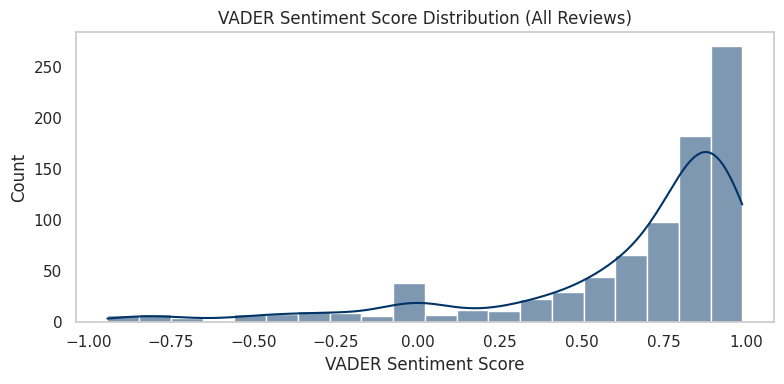

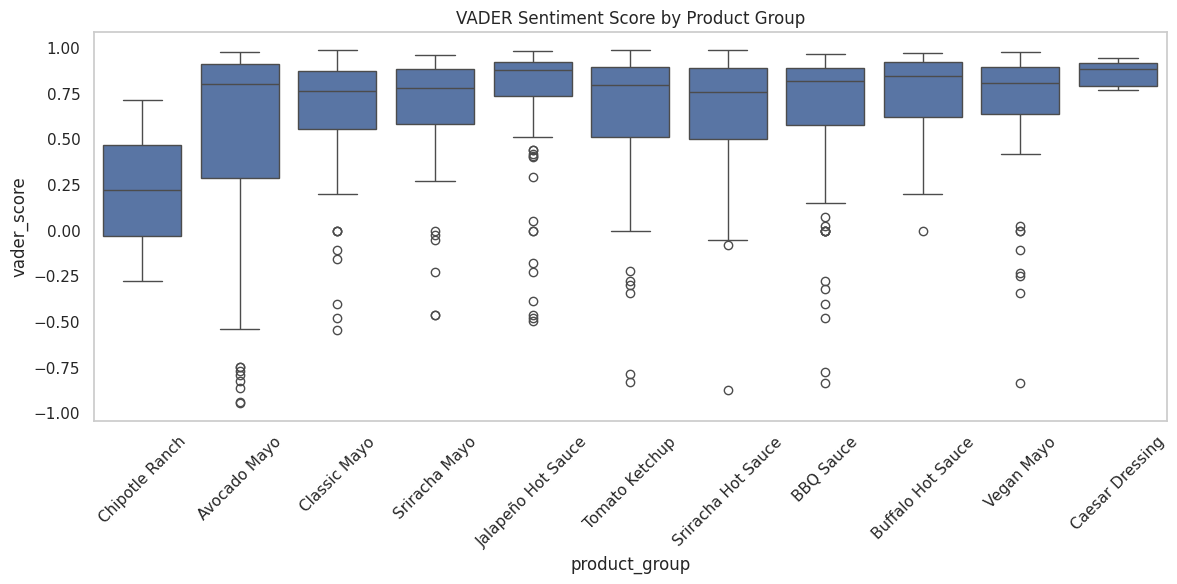

In [318]:
# Filter for valid VADER sentiment scores
sentiment_data_vader = df_reviews[df_reviews['vader_score'].notna()]

# Histogram with KDE
plt.figure(figsize=(8, 4))
sns.histplot(sentiment_data_vader['vader_score'], bins=20, kde=True, color = "#003366")
plt.title("VADER Sentiment Score Distribution (All Reviews)")
plt.xlabel("VADER Sentiment Score")
plt.tight_layout()
plt.grid(False)
plt.show()

# Boxplot by Product Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_group', y='vader_score', data=sentiment_data_vader)
plt.xticks(rotation=45)
plt.title("VADER Sentiment Score by Product Group")
plt.tight_layout()
plt.grid(False)
plt.show()

### Yotpo Sentiment Score distribution

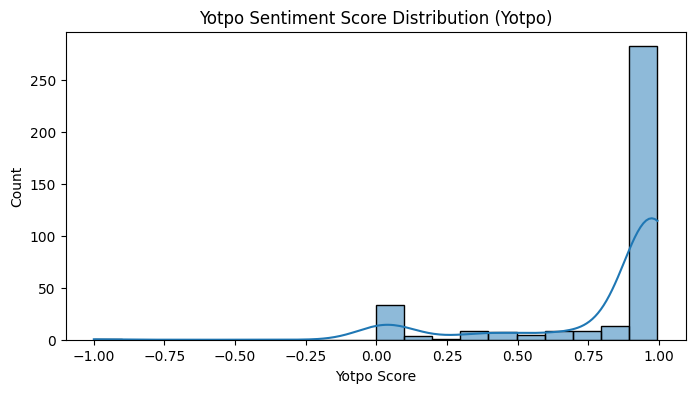

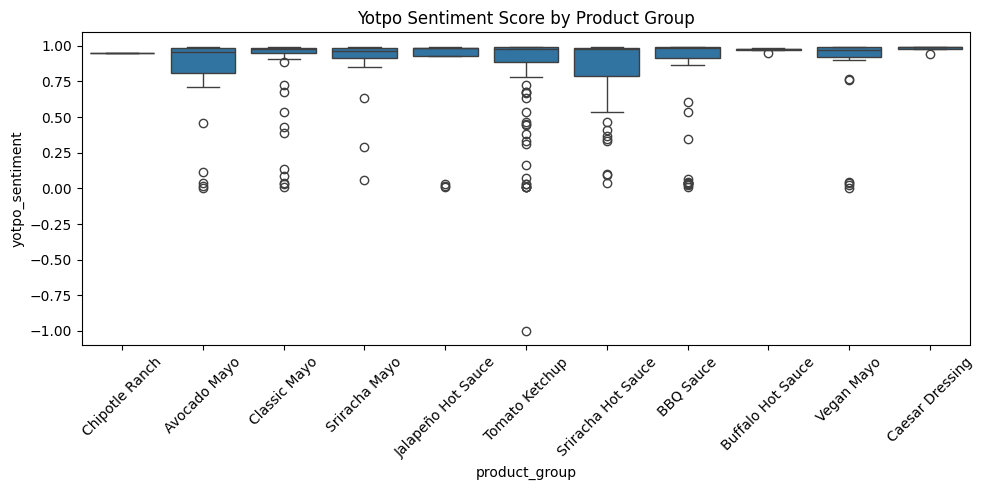

In [36]:
# SENTIMENT DISTRIBUTION OF VADER SCORE
sentiment_data = df_reviews[df_reviews['yotpo_sentiment'].notna()]
plt.figure(figsize=(8, 4))
sns.histplot(sentiment_data['yotpo_sentiment'], bins=20, kde=True)
plt.title("Yotpo Sentiment Score Distribution (Yotpo)")
plt.xlabel("Yotpo Score")
plt.grid(False)
plt.show()

# Sentiment by product group (boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x='product_group', y='yotpo_sentiment', data=sentiment_data)
plt.xticks(rotation=45)
plt.title("Yotpo Sentiment Score by Product Group")
plt.tight_layout()
plt.grid(False)
plt.show()

### Overall Distribution of Ratings

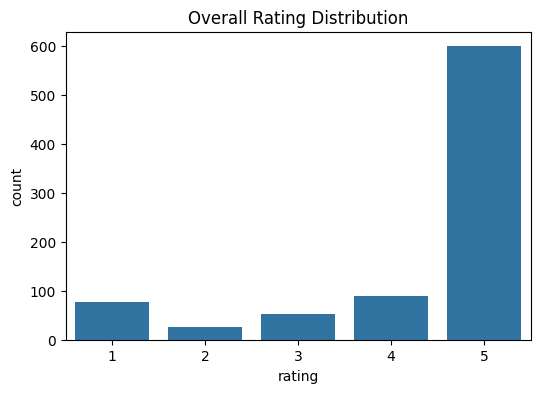

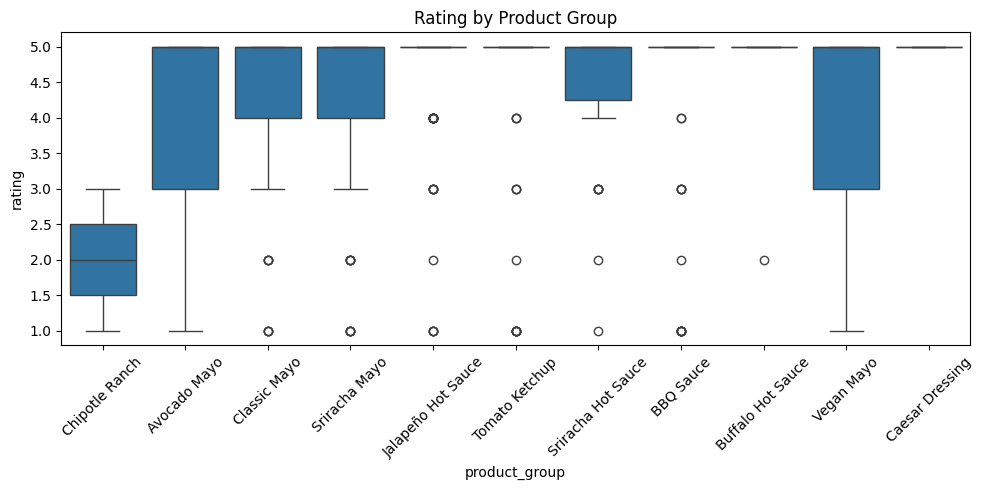

In [38]:
# Distribution of rating
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df_reviews)
plt.title("Overall Rating Distribution")
plt.show()

# Boxplot of rating by product group
plt.figure(figsize=(10, 5))
sns.boxplot(x='product_group', y='rating', data=df_reviews)
plt.xticks(rotation=45)
plt.title("Rating by Product Group")
plt.tight_layout()
plt.show()

### Sentiment Distribution Overview

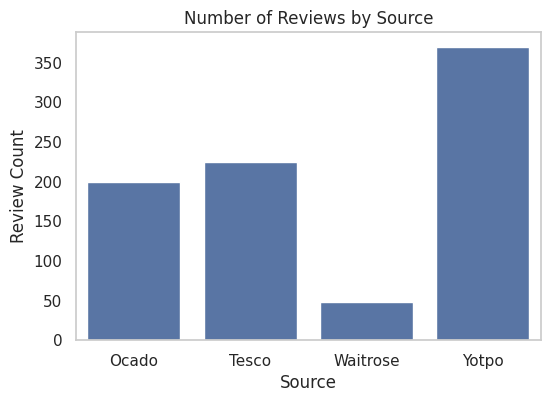

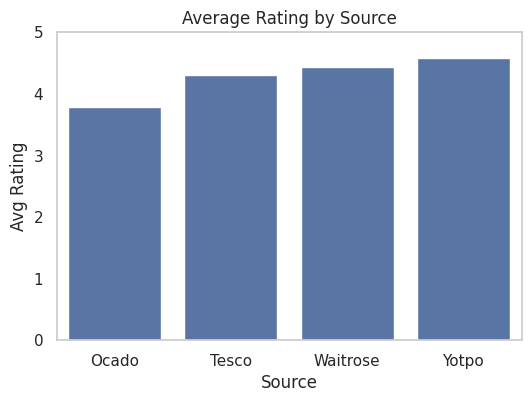

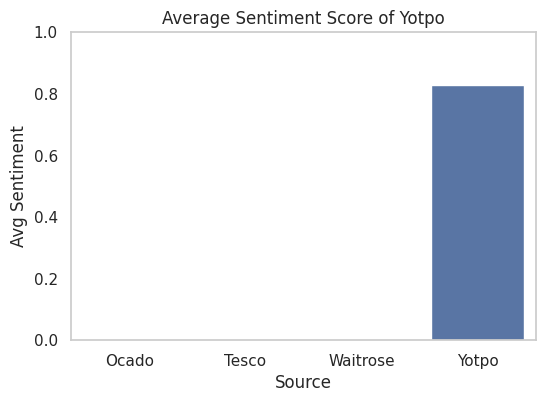

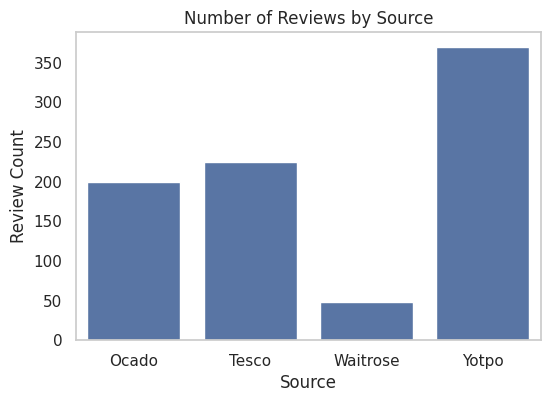

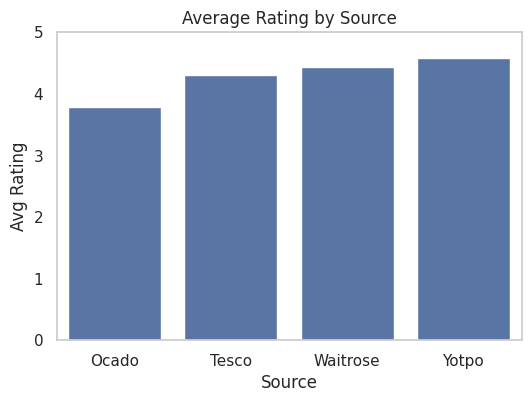

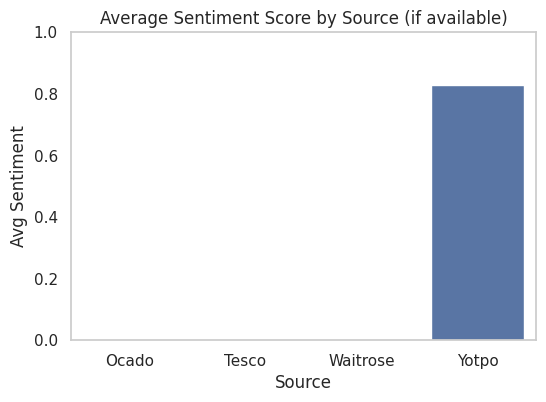

In [39]:
# Platform Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Group by source
platform_stats = df_reviews.groupby('source').agg(
    review_count=('rating', 'count'),
    avg_rating=('rating', 'mean'),
    avg_sentiment=('yotpo_sentiment', 'mean')
).reset_index()

# Set plot style
sns.set(style="whitegrid")

# 1. Review count per source
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='review_count', data=platform_stats)
plt.title("Number of Reviews by Source")
plt.ylabel("Review Count")
plt.xlabel("Source")
plt.grid(False)
plt.show()

# 2. Average rating per source
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='avg_rating', data=platform_stats)
plt.title("Average Rating by Source")
plt.ylabel("Avg Rating")
plt.ylim(0, 5)
plt.xlabel("Source")
plt.grid(False)
plt.show()

# 3. Average sentiment score (Yotpo only has values)
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='avg_sentiment', data=platform_stats)
plt.title("Average Sentiment Score of Yotpo")
plt.ylabel("Avg Sentiment")
plt.ylim(0, 1)
plt.xlabel("Source")
plt.grid(False)
plt.show()


# Group by source
platform_stats = df_reviews.groupby('source').agg(
    review_count=('rating', 'count'),
    avg_rating=('rating', 'mean'),
    avg_sentiment=('yotpo_sentiment', 'mean')
).reset_index()

# Set plot style
sns.set(style="whitegrid")

# 1. Review count per source
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='review_count', data=platform_stats)
plt.title("Number of Reviews by Source")
plt.ylabel("Review Count")
plt.xlabel("Source")
plt.grid(False)
plt.show()

# 2. Average rating per source
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='avg_rating', data=platform_stats)
plt.title("Average Rating by Source")
plt.ylabel("Avg Rating")
plt.ylim(0, 5)
plt.xlabel("Source")
plt.grid(False)
plt.show()

# 3. Average sentiment score (Yotpo only has values)
plt.figure(figsize=(6, 4))
sns.barplot(x='source', y='avg_sentiment', data=platform_stats)
plt.title("Average Sentiment Score by Source (if available)")
plt.ylabel("Avg Sentiment")
plt.ylim(0, 1)
plt.xlabel("Source")
plt.grid(False)
plt.show()


In [40]:
# Top reviewed products
product_stats = df_reviews.groupby('product_group').agg(
    review_count=('rating', 'count'),
    avg_rating=('rating', 'mean'),
    avg_sentiment=('yotpo_sentiment', 'mean')
).sort_values(by='review_count', ascending=False)

print("\nProduct Group Summary:\n", product_stats)



Product Group Summary:
                     review_count  avg_rating  avg_sentiment
product_group                                              
Tomato Ketchup               124    4.645161       0.822439
Jalapeño Hot Sauce           114    4.605263       0.796127
Avocado Mayo                 102    3.892157       0.822651
Classic Mayo                  89    4.370787       0.846997
BBQ Sauce                     86    4.476744       0.814473
Sriracha Mayo                 64    4.265625       0.872192
Vegan Mayo                    62    4.016129       0.827185
Sriracha Hot Sauce            50    4.540000       0.814911
Buffalo Hot Sauce             18    4.833333       0.971472
Caesar Dressing                5    5.000000       0.978348
Chipotle Ranch                 2    2.000000       0.952684


# NLP Sentiment Analysis  

## Data Preprocessing

In [41]:
# Download NLTK resources (only once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def clean_text(text):
    if pd.isnull(text):
        return ""

    text = text.lower()  # lowercase
    text = re.sub(r'&[a-z]+;', '', text)  # remove HTML entities
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = text.split()  # tokenize
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return ' '.join(tokens)

# Apply to df_reviews
df_reviews['clean_comment'] = df_reviews['comment'].apply(clean_text)

# Preview result
df_reviews[['comment', 'clean_comment']].sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


comment  \
85        Great flavour, no sugar, will purchase again   
243  Truly I tell you the unique flavour profiles a...   
646  Was great but something has changed — Loved my...   
759  Nice: Received free from Ocado to try, it is m...   
116  Excellent sriracha. However, the nozzle needs ...   

                                         clean_comment  
85                        great flavour sugar purchase  
243  truly tell unique flavour profile delicate elo...  
646  great something changed — loved first bottle s...  
759  nice received free ocado try expensive usually...  
116  excellent sriracha however nozzle need bigger ...

In [42]:
df_reviews.drop(columns=['comment'], inplace=True)

In [43]:
# Reorder columns with clean_comment placed between product and yotpo_sentiment
cols = df_reviews.columns.tolist()
cols.remove('clean_comment')
# Insert it after 'product'
product_index = cols.index('product')
cols.insert(product_index + 1, 'clean_comment')

# Apply the new column order
df_reviews = df_reviews[cols]

In [44]:
df_reviews.head()

date  rating                             product  \
0  10/05/2025 22:56       3  Dr. Will's Chipotle Ranch Dressing   
1  10/05/2025 12:15       5   Dr. Will's Avocado Oil Mayonnaise   
2  10/05/2025 06:57       5   Dr. Will's Avocado Oil Mayonnaise   
3  07/05/2025 11:37       5             Dr. Will's Classic Mayo   
4  30/04/2025 16:01       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  
0  Chipotle Ranch  
1    Avocado Mayo  
2    Avocado Mayo  
3    Classic Mayo  
4    Classic Mayo

## Sentiment Analysis using VADER

In [45]:
# Install and import
!pip install -q nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [46]:
# Apply VADER to clean_comment
def get_vader_score(text):
    return sia.polarity_scores(str(text))['compound']

df_reviews = df_reviews.drop(columns=['neg', 'neu', 'pos', 'compound'], errors='ignore')  # Clean any duplicates first

df_reviews['vader_score'] = df_reviews['clean_comment'].apply(get_vader_score)


In [47]:
# Classify compound score into sentiment labels
def classify_vader(score):
    if score >= 0.1:
        return 'Positive'
    elif score <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_reviews['vader_sentiment_label'] = df_reviews['vader_score'].apply(classify_vader)

In [48]:
# Optional – create flag for 'mixed sentiment' (if using keyword check)
df_reviews['sentiment_flag'] = None

for i, row in df_reviews.iterrows():
    comment = row['clean_comment']
    if isinstance(comment, str) and 'love' in comment.lower() and 'wish' in comment.lower():
        df_reviews.at[i, 'sentiment_flag'] = 'Mixed Sentiment'

In [49]:
# 5. Quick check
df_reviews[['clean_comment', 'vader_score', 'vader_sentiment_label', 'sentiment_flag']].sample(10)

clean_comment  vader_score  \
401  good quality barbecue sauce rich flavoursome s...       0.7579   
47   thick creamy mayonnaise distinct tartbut delic...       0.7430   
161  bought ixm trying cut sugar itxs really tasty ...       0.5233   
409  really enjoy taste bbq sauce fact glass bottle...      -0.0018   
62           rich creamy lovely mouthfeel i‚äôm hooked       0.8126   
324  relief able condiment love give sugar gone wel...       0.8885   
194  trying add sauce flange orifice bottle need ce...       0.2023   
468  revolting runny tasteless seemed water based r...      -0.7351   
156  im grateful dr will quest refined sugar free k...       0.9423   
149  ingredient texture flavour excellent ingredien...       0.7650   

    vader_sentiment_label sentiment_flag  
401              Positive           None  
47               Positive           None  
161              Positive           None  
409               Neutral           None  
62               Positive           None  
324              Positive           None  
194              Positive           None  
468              Negative           None  
156              Positive           None  
149              Positive           None

In [50]:
df_reviews.head(5)

date  rating                             product  \
0  10/05/2025 22:56       3  Dr. Will's Chipotle Ranch Dressing   
1  10/05/2025 12:15       5   Dr. Will's Avocado Oil Mayonnaise   
2  10/05/2025 06:57       5   Dr. Will's Avocado Oil Mayonnaise   
3  07/05/2025 11:37       5             Dr. Will's Classic Mayo   
4  30/04/2025 16:01       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  vader_score vader_sentiment_label sentiment_flag  
0  Chipotle Ranch       0.7178              Positive           None  
1    Avocado Mayo       0.8442              Positive           None  
2    Avocado Mayo       0.8514              Positive           None  
3    Classic Mayo       0.7193              Positive           None  
4    Classic Mayo       0.8934              Positive           None

In [51]:
df_reviews.head(5)

date  rating                             product  \
0  10/05/2025 22:56       3  Dr. Will's Chipotle Ranch Dressing   
1  10/05/2025 12:15       5   Dr. Will's Avocado Oil Mayonnaise   
2  10/05/2025 06:57       5   Dr. Will's Avocado Oil Mayonnaise   
3  07/05/2025 11:37       5             Dr. Will's Classic Mayo   
4  30/04/2025 16:01       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  vader_score vader_sentiment_label sentiment_flag  
0  Chipotle Ranch       0.7178              Positive           None  
1    Avocado Mayo       0.8442              Positive           None  
2    Avocado Mayo       0.8514              Positive           None  
3    Classic Mayo       0.7193              Positive           None  
4    Classic Mayo       0.8934              Positive           None

## Sentiment Breakdown by VADER

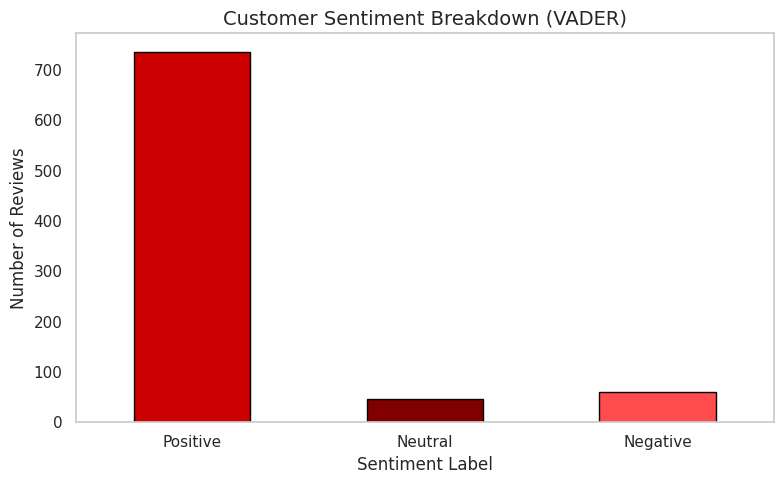

In [52]:
# Reindex to ensure consistent label order
vader_counts = df_reviews['vader_sentiment_label'].value_counts().reindex(['Positive', 'Neutral', 'Negative'])

# Define custom colours
sentiment_colors = ['#cc0000', '#800000', '#ff4d4d']  # Positive, Neutral, Negative


# Plotting
plt.figure(figsize=(8, 5))
vader_counts.plot(kind='bar', color=sentiment_colors, edgecolor='black')

# Aesthetics
plt.title('Customer Sentiment Breakdown (VADER)', fontsize=14)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


# Data Visualisation

## Platform Based Sentiment Analysis

In [53]:
# Count number of reviews per source per sentiment
sentiment_counts = df_reviews.groupby(['source', 'vader_sentiment_label']).size().unstack().fillna(0)

In [54]:
import plotly.graph_objects as go

# Group data
df_platform = df_reviews.groupby(['source', 'vader_sentiment_label']).size().reset_index(name='count')

# Order sentiment
df_platform['vader_sentiment_label'] = pd.Categorical(
    df_platform['vader_sentiment_label'],
    categories=["Positive", "Neutral", "Negative"],
    ordered=True
)

# Color map
color_map = {
    "Positive": "#cc0000",
    "Neutral": "#800000",
    "Negative": "#ff4d4d"
}

# Unique platforms
platforms = df_platform['source'].unique()

# Create figure
fig = go.Figure()

# Add bar traces
for i, platform in enumerate(platforms):
    filtered = df_platform[df_platform['source'] == platform]
    # Ensure all 3 sentiments are present for coloring
    filtered = filtered.set_index('vader_sentiment_label').reindex(["Positive", "Neutral", "Negative"], fill_value=0).reset_index()
    colors = [color_map[s] for s in filtered['vader_sentiment_label']]
    fig.add_trace(go.Bar(
        x=filtered['vader_sentiment_label'],
        y=filtered['count'],
        name=platform,
        marker_color=colors,
        visible=(i == 0)
    ))

# Dropdown buttons
dropdown_buttons = [
    {
        'label': platform,
        'method': 'update',
        'args': [
            {'visible': [platform == p for p in platforms]},
            {'title': f"Sentiment Distribution for {platform}"}
        ]
    }
    for platform in platforms
]

# Update layout with compact dimensions
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.2,
        'yanchor': 'top',
        'showactive': True
    }],
    title="Sentiment Distribution for Yotpo",
    xaxis_title="VADER Sentiment",
    yaxis_title="Number of Reviews",
    template="plotly_white",
    font=dict(family="Arial", size=14),
    showlegend=False,
    bargap=0.25,
    margin=dict(t=60),
    height=400,   # 🔧 Set smaller height
    width=600     # 🔧 Set smaller width
)

fig.show()



In [55]:
import plotly.graph_objects as go

# Group data
df_platform = df_reviews.groupby(['source', 'vader_sentiment_label']).size().reset_index(name='count')

# Order sentiment
df_platform['vader_sentiment_label'] = pd.Categorical(
    df_platform['vader_sentiment_label'],
    categories=["Positive", "Neutral", "Negative"],
    ordered=True
)

# Color map
color_map = {
    "Positive": "#cc0000",   # Light red
    "Neutral": "#800000",    # Medium red
    "Negative": "#ff4d4d"    # Dark red
}

# Unique platforms
platforms = df_platform['source'].unique()

# Create figure
fig = go.Figure()

# Add bar traces for each platform
for i, platform in enumerate(platforms):
    filtered = df_platform[df_platform['source'] == platform]
    colors = [color_map[sent] for sent in filtered['vader_sentiment_label']]
    fig.add_trace(go.Bar(
        x=filtered['vader_sentiment_label'],
        y=filtered['count'],
        name=platform,
        marker_color=colors,
        visible=(i == 0)
    ))

# Dropdown buttons
dropdown_buttons = [
    {
        'label': platform,
        'method': 'update',
        'args': [
            {'visible': [platform == p for p in platforms]},
            {'title': f"Sentiment Distribution for {platform}"}
        ]
    }
    for platform in platforms
]

# Layout update
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.25,
        'yanchor': 'top',
        'showactive': True
    }],
    title="Sentiment Distribution for Yotpo",
    xaxis_title="VADER Sentiment",
    yaxis_title="Number of Reviews",
    template="plotly_white",
    font=dict(family="Arial", size=16),
    showlegend=False,
    bargap=0.2,
    margin=dict(t=80)
)

fig.show()


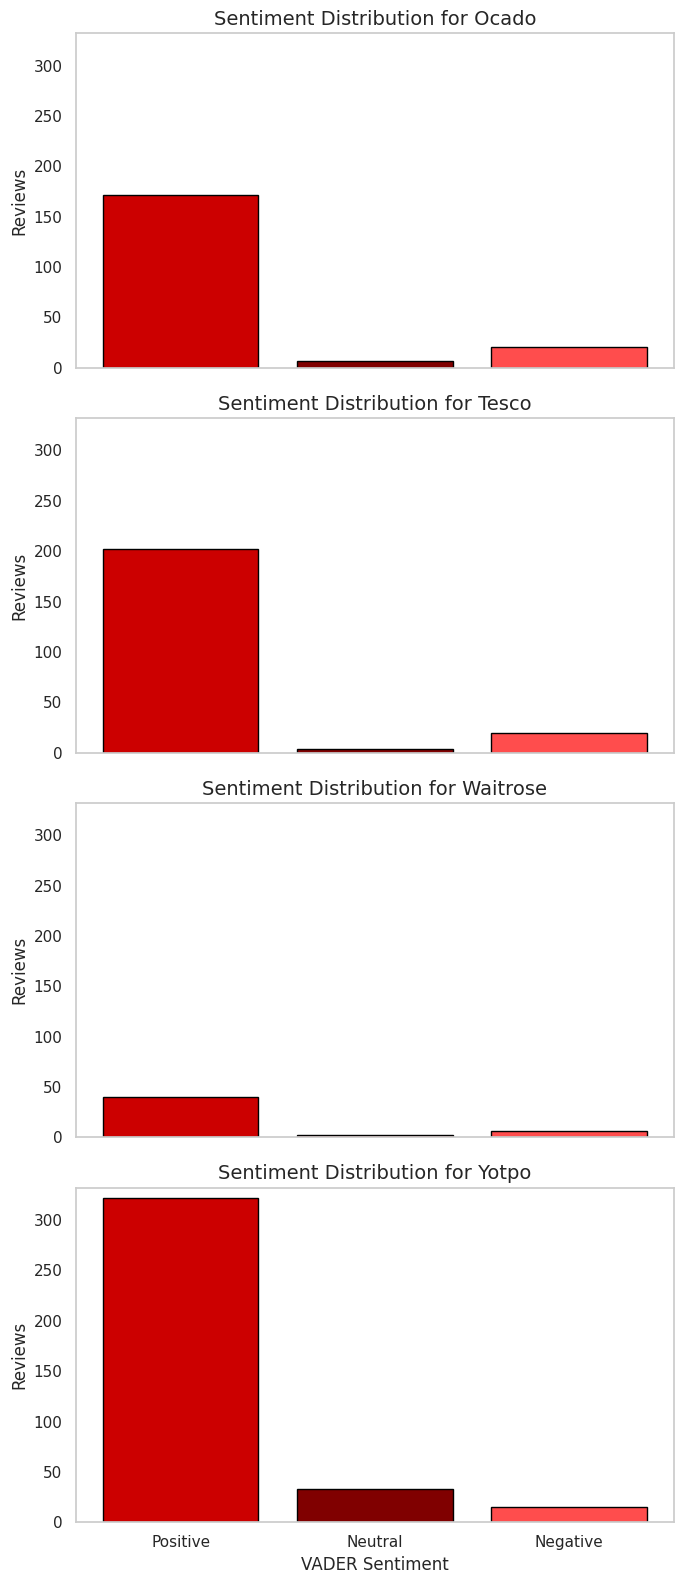

In [56]:
import matplotlib.pyplot as plt

# Prepare data
df_platform = df_reviews.groupby(['source', 'vader_sentiment_label']).size().reset_index(name='count')

# Ensure all sentiment labels exist for each platform
sentiment_order = ["Positive", "Neutral", "Negative"]
platforms = df_platform['source'].unique()

# Create subplot grid
fig, axes = plt.subplots(nrows=len(platforms), figsize=(7, 4 * len(platforms)), sharex=True)

# Red color mapping
color_map = {
    "Positive": "#cc0000",
    "Neutral": "#800000",
    "Negative": "#FF4D4D"
}

# Plot each platform
for i, platform in enumerate(platforms):
    ax = axes[i] if len(platforms) > 1 else axes
    platform_data = df_platform[df_platform['source'] == platform].set_index('vader_sentiment_label')
    platform_data = platform_data.reindex(sentiment_order, fill_value=0).reset_index()

    bars = ax.bar(
        platform_data['vader_sentiment_label'],
        platform_data['count'],
        color=[color_map[s] for s in platform_data['vader_sentiment_label']],
        edgecolor='black'
    )

    ax.set_title(f"Sentiment Distribution for {platform}", fontsize=14)
    ax.set_ylabel("Reviews")
    ax.set_ylim(0, df_platform['count'].max() + 10)
    ax.grid(False)

plt.xlabel("VADER Sentiment")
plt.tight_layout()
plt.show()

## Product Level Sentiment Analysis

In [57]:
df_reviews.groupby('product_group')['vader_sentiment_label'].value_counts() #sentiment by product

product_group       vader_sentiment_label
Avocado Mayo        Positive                  79
                    Negative                  13
                    Neutral                   10
BBQ Sauce           Positive                  73
                    Neutral                    7
                    Negative                   6
Buffalo Hot Sauce   Positive                  17
                    Neutral                    1
Caesar Dressing     Positive                   5
Chipotle Ranch      Negative                   1
                    Positive                   1
Classic Mayo        Positive                  81
                    Negative                   5
                    Neutral                    3
Jalapeño Hot Sauce  Positive                 105
                    Negative                   6
                    Neutral                    3
Sriracha Hot Sauce  Positive                  44
                    Neutral                    5
                    Negative                   1
Sriracha Mayo       Positive                  58
                    Negative                   3
                    Neutral                    3
Tomato Ketchup      Positive                 110
                    Neutral                    8
                    Negative                   6
Vegan Mayo          Positive                  54
                    Negative                   5
                    Neutral                    3
Name: count, dtype: int64

In [58]:
import plotly.express as px

# Group sentiment count per product
df_grouped = df_reviews.groupby(['product_group', 'vader_sentiment_label']).size().reset_index(name='count')

# Set proper sentiment order
df_grouped['vader_sentiment_label'] = pd.Categorical(
    df_grouped['vader_sentiment_label'],
    categories=["Positive", "Neutral", "Negative"],
    ordered=True
)

# Plotly interactive bar chart with custom colours
fig = px.bar(
    df_grouped,
    x="vader_sentiment_label",
    y="count",
    color="vader_sentiment_label",
    animation_frame="product_group",  # Dropdown by product
    title="Product Group - Level VADER Sentiment Distribution",
    labels={
        "vader_sentiment_label": "VADER Sentiment",
        "count": "Number of Reviews"
    },
    category_orders={
        "vader_sentiment_label": ["Positive", "Neutral", "Negative"]
    },
    color_discrete_map={
        "Positive": '#cc0000',
        "Neutral": '#800000',
        "Negative": '#FF4D4D'
    }
)

fig.update_layout(
    template="plotly_white",
    font=dict(family="Arial", size=14),
    showlegend=False
)

fig.show()


In [59]:
import plotly.express as px

# Group sentiment count per product
df_grouped = df_reviews.groupby(['product_group', 'vader_sentiment_label']).size().reset_index(name='count')

# Set proper sentiment order
df_grouped['vader_sentiment_label'] = pd.Categorical(
    df_grouped['vader_sentiment_label'],
    categories=["Positive", "Neutral", "Negative"],
    ordered=True
)

# Plotly interactive bar chart with custom colours
fig = px.bar(
    df_grouped,
    x="vader_sentiment_label",
    y="count",
    color="vader_sentiment_label",
    animation_frame="product_group",  # Dropdown by product
    title="Product Group - Level VADER Sentiment Distribution",
    labels={
        "vader_sentiment_label": "VADER Sentiment",
        "count": "Number of Reviews"
    },
    category_orders={
        "vader_sentiment_label": ["Positive", "Neutral", "Negative"]
    },
    color_discrete_map={
        "Positive": '#cc0000',
        "Neutral": '#800000',
        "Negative": '#FF4D4D'
    }
)

fig.update_layout(
    template="plotly_white",
    font=dict(family="Arial", size=14),
    showlegend=False
)

fig.show()


In [60]:
import plotly.graph_objects as go

# Step 1: Prepare grouped data
df_grouped = df_reviews.groupby(['product_group', 'vader_sentiment_label']).size().reset_index(name='count')

# Step 2: Ensure correct sentiment order
sentiment_order = ["Positive", "Neutral", "Negative"]
df_grouped['vader_sentiment_label'] = pd.Categorical(df_grouped['vader_sentiment_label'], categories=sentiment_order, ordered=True)

# Step 3: Unique product groups
product_groups = df_grouped['product_group'].unique()

# Step 4: Color map
color_map = {
    "Positive": "#ff4d4d",
    "Neutral": "#cc0000",
    "Negative": "#800000"
}

# Step 5: Create figure and add traces
fig = go.Figure()

for i, group in enumerate(product_groups):
    filtered = df_grouped[df_grouped['product_group'] == group].set_index('vader_sentiment_label')
    filtered = filtered.reindex(sentiment_order, fill_value=0).reset_index()
    colors = [color_map[s] for s in filtered['vader_sentiment_label']]

    fig.add_trace(go.Bar(
        x=filtered['vader_sentiment_label'],
        y=filtered['count'],
        name=group,
        marker_color=colors,
        visible=(i == 0)
    ))

# Step 6: Dropdown menu for product_group
dropdown_buttons = [
    {
        'label': group,
        'method': 'update',
        'args': [
            {'visible': [group == g for g in product_groups]},
            {'title': f"Sentiment Distribution for {group}"}
        ]
    }
    for group in product_groups
]

# Step 7: Layout settings for compact chart
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.2,
        'yanchor': 'top',
        'showactive': True
    }],
    title=f"Sentiment Distribution for {product_groups[0]}",
    xaxis_title="VADER Sentiment",
    yaxis_title="Number of Reviews",
    template="plotly_white",
    font=dict(family="Arial", size=14),
    showlegend=False,
    bargap=0.3,
    height=400,
    width=600
)

fig.show()

In [61]:
import plotly.graph_objects as go

# Step 1: Prepare grouped data
df_grouped = df_reviews.groupby(['product_group', 'vader_sentiment_label']).size().reset_index(name='count')

# Step 2: Ensure correct sentiment order
sentiment_order = ["Positive", "Neutral", "Negative"]
df_grouped['vader_sentiment_label'] = pd.Categorical(df_grouped['vader_sentiment_label'], categories=sentiment_order, ordered=True)

# Step 3: Unique product groups
product_groups = df_grouped['product_group'].unique()

# Step 4: Color map
color_map = {
    "Positive": "#ff4d4d",
    "Neutral": "#cc0000",
    "Negative": "#800000"
}

# Step 5: Create figure and add traces
fig = go.Figure()

for i, group in enumerate(product_groups):
    filtered = df_grouped[df_grouped['product_group'] == group].set_index('vader_sentiment_label')
    filtered = filtered.reindex(sentiment_order, fill_value=0).reset_index()
    colors = [color_map[s] for s in filtered['vader_sentiment_label']]

    fig.add_trace(go.Bar(
        x=filtered['vader_sentiment_label'],
        y=filtered['count'],
        name=group,
        marker_color=colors,
        visible=(i == 0)
    ))

# Step 6: Dropdown menu for product_group
dropdown_buttons = [
    {
        'label': group,
        'method': 'update',
        'args': [
            {'visible': [group == g for g in product_groups]},
            {'title': f"Sentiment Distribution for {group}"}
        ]
    }
    for group in product_groups
]

# Step 7: Layout settings
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.2,
        'yanchor': 'top',
        'showactive': True
    }],
    title=f"Sentiment Distribution for {product_groups[0]}",
    xaxis_title="VADER Sentiment",
    yaxis_title="Number of Reviews",
    template="plotly_white",
    font=dict(family="Arial", size=14),
    showlegend=False,
    bargap=0.3,
    height=400,
    width=600
)

fig.show()


In [62]:
!pip install -q ipywidgets
# To enable the interactive backend in Jupyter Lab or Notebook, you might need to explicitly enable it.
# For JupyterLab: !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# For classic Jupyter Notebook: !jupyter nbextension enable --py widgetsnbextension

import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00


In [63]:
# Get unique product names, filtering out non-string values before sorting
# This specifically handles NaN values which are floats, causing the TypeError.
unique_product_groups = df_reviews['product_group'].dropna().astype(str).unique()

product_dropdown = widgets.Dropdown(
    options=sorted(unique_product_groups),
    description='Product:',
    layout=widgets.Layout(width='50%')
)

# Define plot function
def plot_product_sentiment(product_name):
    # Ensure we are filtering by the string product name
    filtered = df_reviews[df_reviews['product_group'].astype(str) == product_name]
    sentiment_counts = filtered['vader_sentiment_label'].value_counts().reindex(
        ['Positive', 'Neutral', 'Negative'], fill_value=0
    )

    # Plot
    plt.figure(figsize=(6, 4))
    sentiment_counts.plot(kind='bar', color='red', edgecolor='black')
    plt.title(f"Sentiment Distribution for {product_name}")
    plt.xlabel('Sentiment')
    plt.ylabel('Reviews')
    plt.ylim(0, 100)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Link dropdown to plot
widgets.interact(plot_product_sentiment, product_name=product_dropdown)



interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_product_sentiment(product_name)>

### Sentiment Analysis by Time

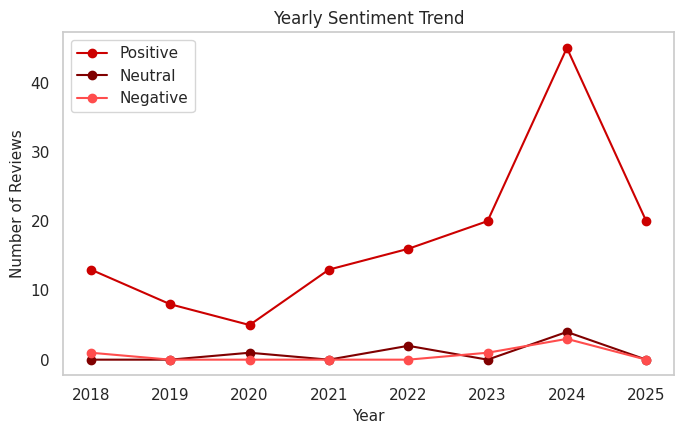

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Data
df_trend = df_reviews.copy()
df_trend['date'] = pd.to_datetime(df_trend['date'], errors='coerce')
df_trend = df_trend[df_trend['date'].notna()]

# Step 2: Extract Year
df_trend['year'] = df_trend['date'].dt.year

# Step 3: Group by year and sentiment
sentiment_trend = df_trend.groupby(['year', 'vader_sentiment_label']).size().reset_index(name='count')

# Step 4: Pivot for plotting
pivot_df = sentiment_trend.pivot(index='year', columns='vader_sentiment_label', values='count').fillna(0)

# Step 5: Plot
plt.figure(figsize=(7, 4.5))
colors = {'Positive': '#cc0000', 'Neutral': '#800000', 'Negative': '#ff4d4d'}

for sentiment in ['Positive', 'Neutral', 'Negative']:
    if sentiment in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[sentiment], label=sentiment, color=colors[sentiment], marker='o')

plt.title("Yearly Sentiment Trend", fontsize=12)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Number of Reviews", fontsize=11)
plt.xticks(pivot_df.index, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()


# TF-IDF & N-Grams

 Frequency–Inverse Document Frequency : Identify important keywords in the reviews that aren’t just frequent, but also distinctive for specific products or sentiments

## TF-IDF by Platform (Postive Reviews)

In [190]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ipywidgets as widgets
from IPython.display import display

# Step 1: Filter reviews (Neutral + Negative)
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Positive'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Step 2: Platform dropdown
platform_dropdown = widgets.Dropdown(
    options=sorted(filtered_df['source'].unique()),
    description='Platform:',
    layout=widgets.Layout(width='50%')
)

# Step 3: TF-IDF plotting function
def plot_tfidf_by_platform(source_name, top_n=10):
    group_data = filtered_df[filtered_df['source'] == source_name]

    if group_data.empty:
        print(f"No data available for {source_name}")
        return

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])

    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'term': tfidf_terms, 'score': tfidf_scores})
    top_terms = tfidf_df.sort_values(by='score', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.barh(top_terms['term'][::-1], top_terms['score'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top TF-IDF Terms for {source_name} (Positive Reviews)")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Step 4: Create the interactive dropdown
widgets.interact(plot_tfidf_by_platform, source_name=platform_dropdown)

interactive(children=(Dropdown(description='Platform:', layout=Layout(width='50%'), options=('Ocado', 'Tesco',…

<function __main__.plot_tfidf_by_platform(source_name, top_n=10)>

## TF-IDF by Platform (Negative Reviews & Neutral Reviews)

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ipywidgets as widgets
from IPython.display import display

# Step 1: Filter reviews (Neutral + Negative)
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Step 2: Platform dropdown
platform_dropdown = widgets.Dropdown(
    options=sorted(filtered_df['source'].unique()),
    description='Platform:',
    layout=widgets.Layout(width='50%')
)

# Step 3: TF-IDF plotting function
def plot_tfidf_by_platform(source_name, top_n=10):
    group_data = filtered_df[filtered_df['source'] == source_name]

    if group_data.empty:
        print(f"No data available for {source_name}")
        return

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])

    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'term': tfidf_terms, 'score': tfidf_scores})
    top_terms = tfidf_df.sort_values(by='score', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.barh(top_terms['term'][::-1], top_terms['score'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top TF-IDF Terms for {source_name} (Neg/Neutral Reviews)")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Step 4: Create the interactive dropdown
widgets.interact(plot_tfidf_by_platform, source_name=platform_dropdown)


interactive(children=(Dropdown(description='Platform:', layout=Layout(width='50%'), options=('Ocado', 'Tesco',…

<function __main__.plot_tfidf_by_platform(source_name, top_n=10)>

## TF-IDF by Product

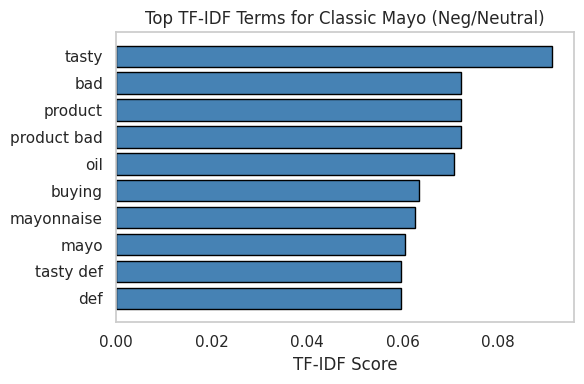

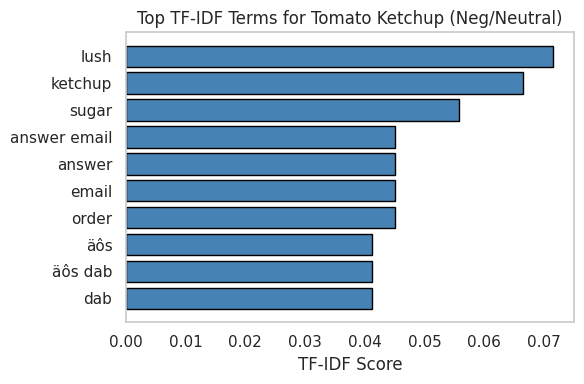

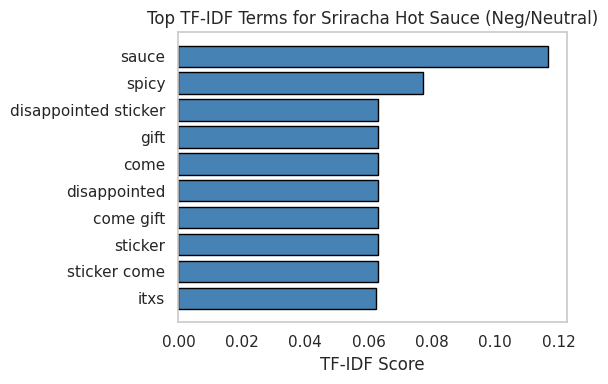

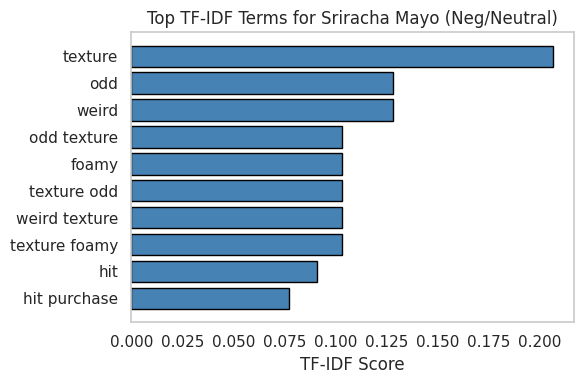

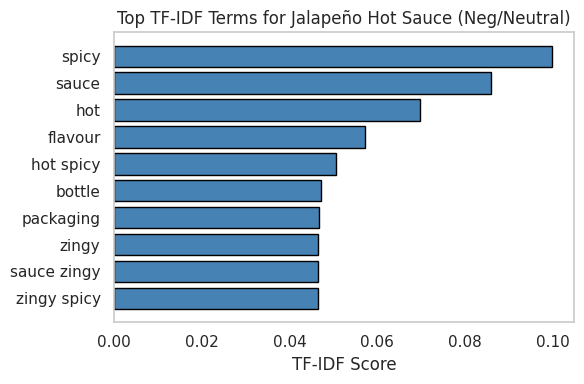

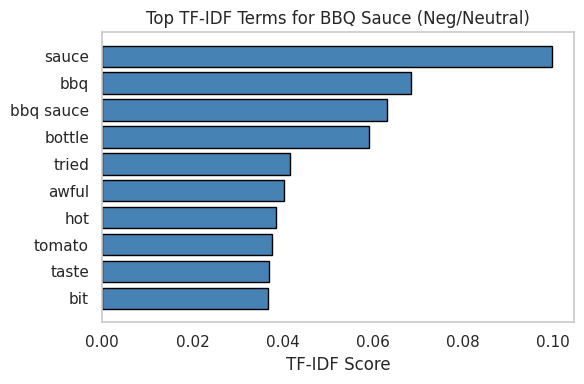

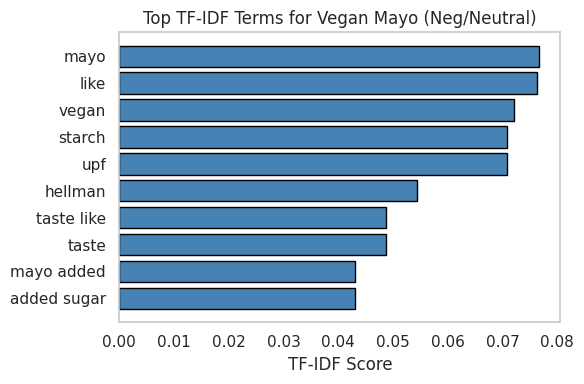

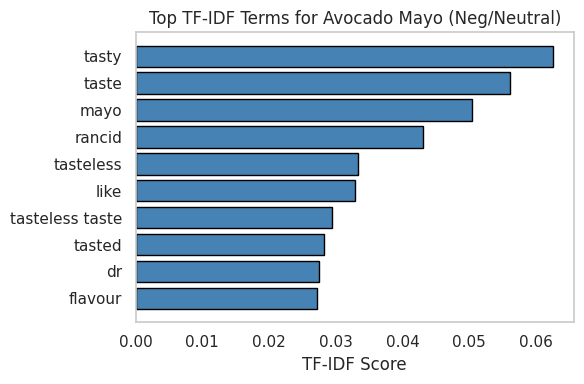

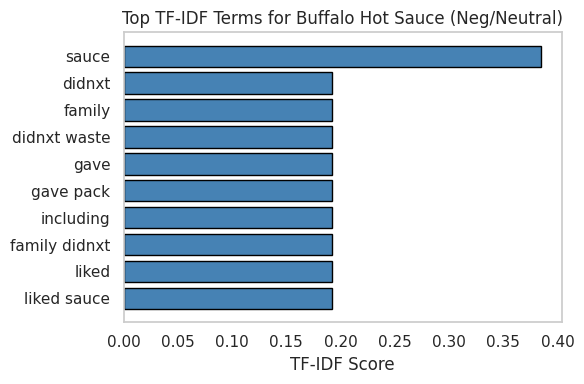

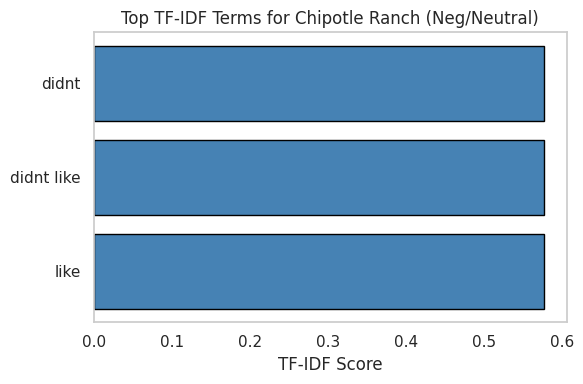

In [192]:
product_groups = filtered_df['product_group'].dropna().unique()

for group in product_groups:
    group_data = filtered_df[filtered_df['product_group'] == group]
    if group_data.empty:
        continue

    tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=1000)
    tfidf_matrix = tfidf.fit_transform(group_data['clean_comment'])

    tfidf_scores = tfidf_matrix.mean(axis=0).A1
    tfidf_terms = tfidf.get_feature_names_out()

    tfidf_df = pd.DataFrame({'term': tfidf_terms, 'score': tfidf_scores})
    top_terms = tfidf_df.sort_values(by='score', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.barh(top_terms['term'][::-1], top_terms['score'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top TF-IDF Terms for {group} (Neg/Neutral)")
    plt.xlabel("TF-IDF Score")
    plt.tight_layout()
    plt.grid(False)
    plt.show()


## N-Grams of Postive, Negative and Neutral Comments


## Postive Bigram

In [193]:
from sklearn.feature_extraction.text import CountVectorizer

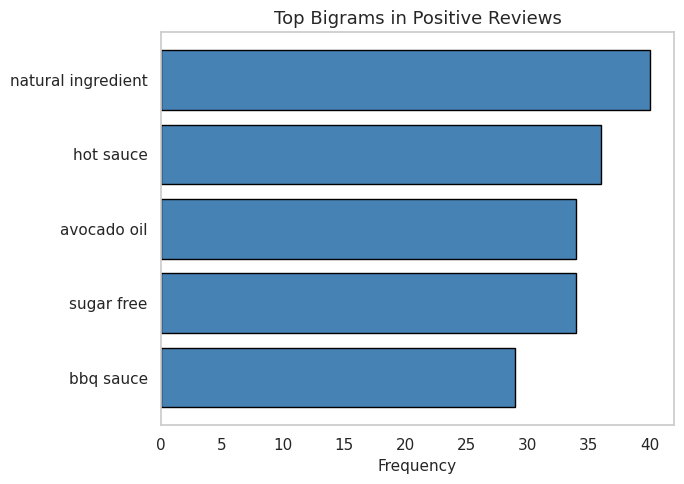

In [194]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Positive']
positive_df = positive_df[positive_df['clean_comment'].notna()]

# Bigram extraction
vectorizer_pos = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X_pos = vectorizer_pos.fit_transform(positive_df['clean_comment'])

# Sum frequencies
bigram_counts_pos = X_pos.sum(axis=0).A1
bigram_terms_pos = vectorizer_pos.get_feature_names_out()

bigram_freq_df_pos = pd.DataFrame({'bigram': bigram_terms_pos, 'count': bigram_counts_pos})
top_bigrams_pos = bigram_freq_df_pos.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams_pos['bigram'][::-1], top_bigrams_pos['count'][::-1], color='steelblue', edgecolor='black')
plt.title("Top Bigrams in Positive Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.show()

## Top 5 Postive Bigram by Time

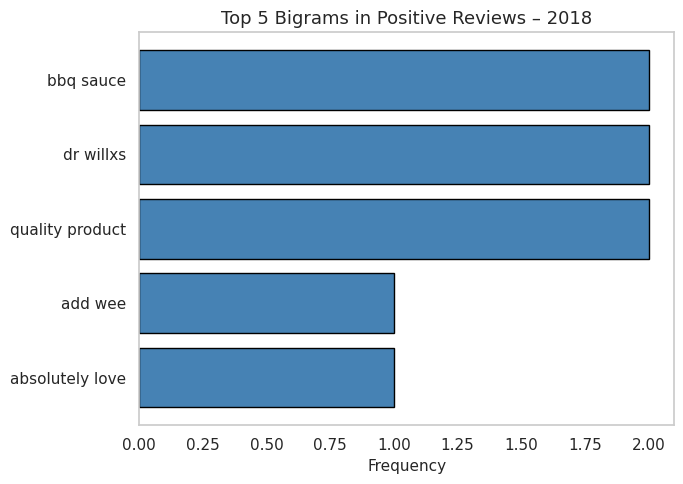

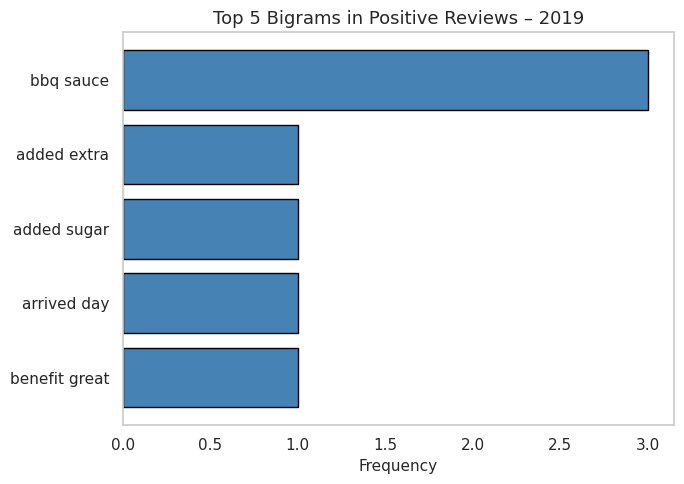

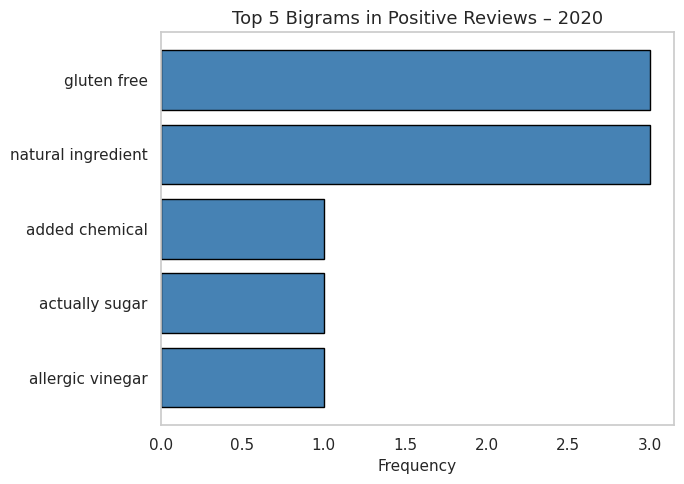

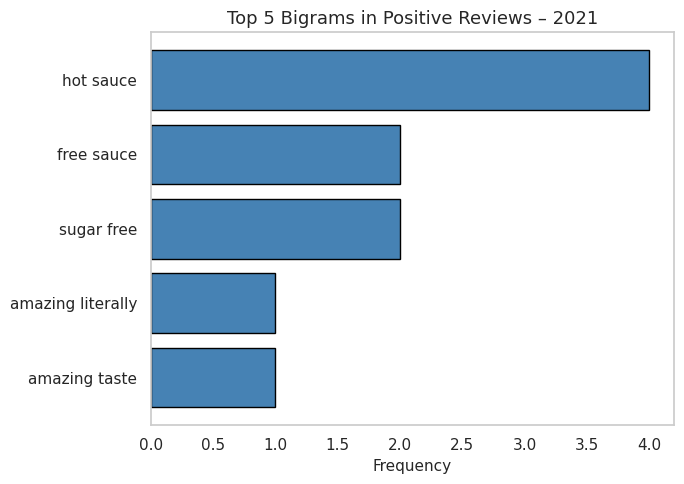

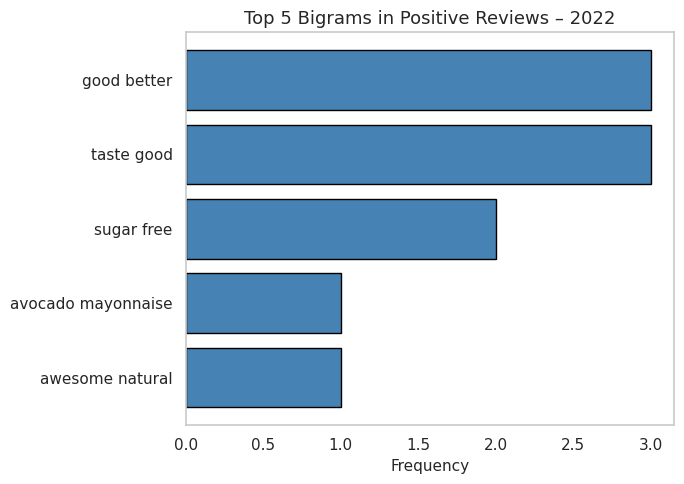

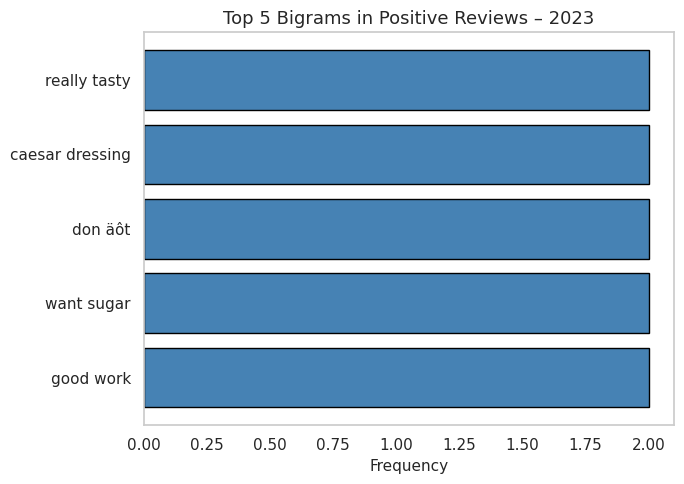

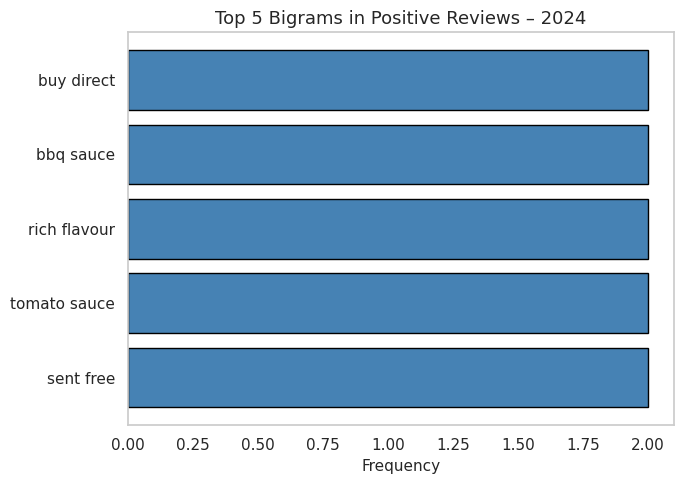

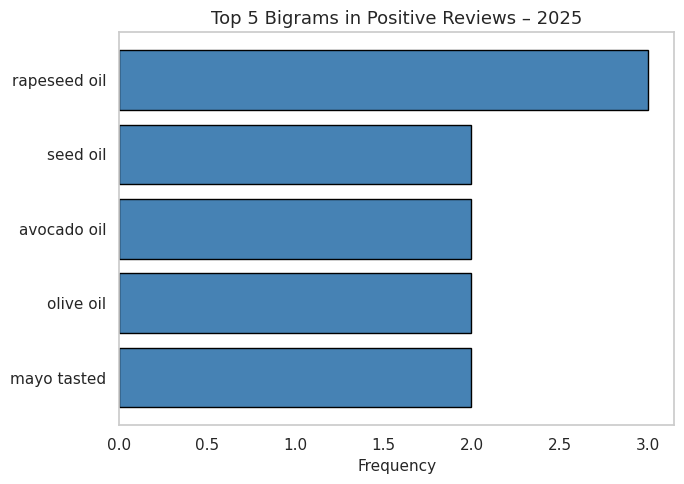

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Ensure 'date' is in datetime format
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Step 2: Create 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

# Step 3: Filter only positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Positive') &
    (df_reviews['clean_comment'].notna())
].copy()

# Step 4: Loop over each year in the data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
years = positive_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = positive_df[positive_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract bigrams
    X = vectorizer.fit_transform(comments)
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top 5 Bigrams in Positive Reviews – {int(year)}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Negative Bigram

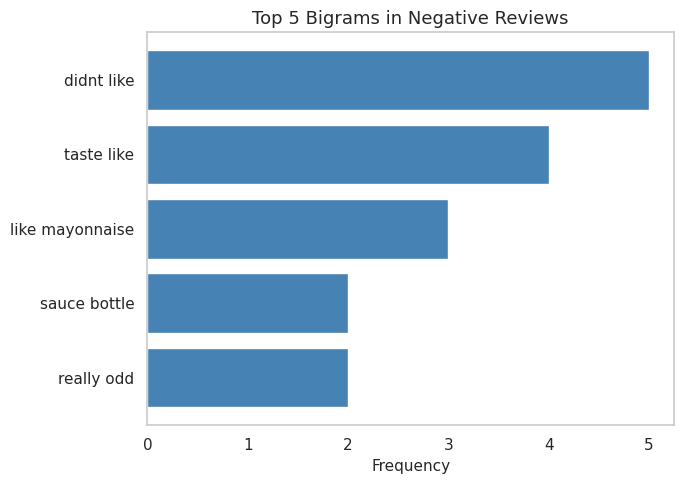

In [196]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Negative']
positive_df = positive_df[positive_df['clean_comment'].notna()]

# Bigram extraction
vectorizer_pos = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X_pos = vectorizer_pos.fit_transform(positive_df['clean_comment'])

# Sum frequencies
bigram_counts_pos = X_pos.sum(axis=0).A1
bigram_terms_pos = vectorizer_pos.get_feature_names_out()

bigram_freq_df_pos = pd.DataFrame({'bigram': bigram_terms_pos, 'count': bigram_counts_pos})
top_bigrams_pos = bigram_freq_df_pos.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams_pos['bigram'][::-1], top_bigrams_pos['count'][::-1], color='steelblue')
plt.title("Top 5 Bigrams in Negative Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.show()

## Neutral Bigram

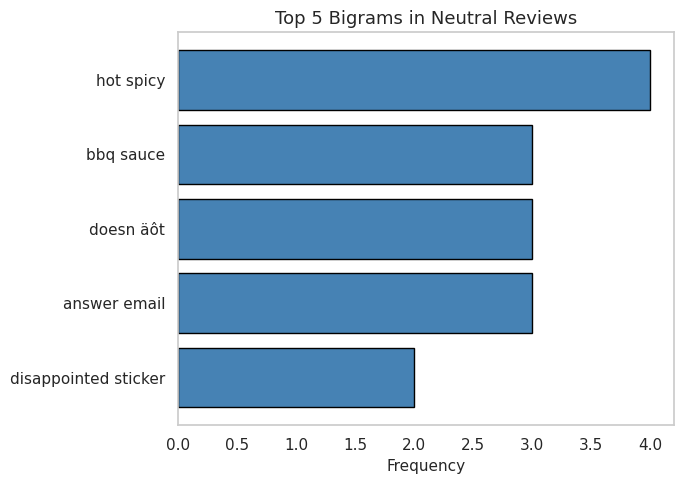

In [197]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[df_reviews['vader_sentiment_label'] == 'Neutral']
positive_df = positive_df[positive_df['clean_comment'].notna()]

# Bigram extraction
vectorizer_pos = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X_pos = vectorizer_pos.fit_transform(positive_df['clean_comment'])

# Sum frequencies
bigram_counts_pos = X_pos.sum(axis=0).A1
bigram_terms_pos = vectorizer_pos.get_feature_names_out()

bigram_freq_df_pos = pd.DataFrame({'bigram': bigram_terms_pos, 'count': bigram_counts_pos})
top_bigrams_pos = bigram_freq_df_pos.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams_pos['bigram'][::-1], top_bigrams_pos['count'][::-1], color='steelblue', edgecolor='black')
plt.title("Top 5 Bigrams in Neutral Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.show()

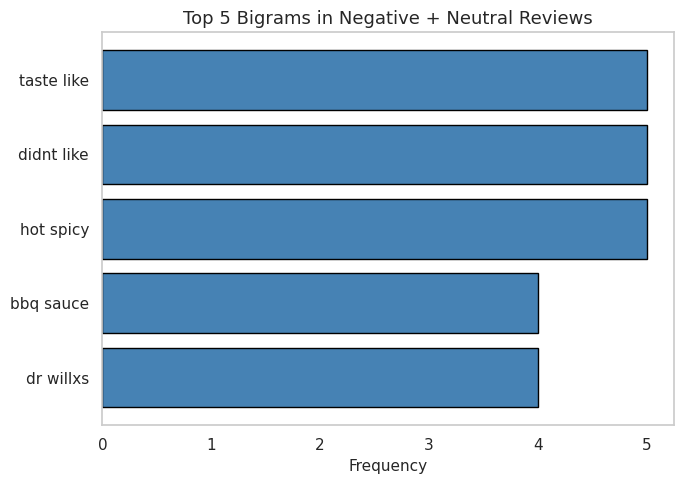

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Filter Negative + Neutral reviews with clean comments
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Postive','Negative', 'Neutral'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Bigram extraction
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
X = vectorizer.fit_transform(filtered_df['clean_comment'])

# Sum frequencies
bigram_counts = X.sum(axis=0).A1
bigram_terms = vectorizer.get_feature_names_out()

bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot
plt.figure(figsize=(7, 5))
plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='steelblue', edgecolor='black')
plt.title("Top 5 Bigrams in Negative + Neutral Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.show()


## Top 5 Negative & Neutral Comments by Time

Skipping 2018.0 – not enough comments.
Skipping 2020.0 – not enough comments.
Skipping 2022.0 – not enough comments.
Skipping 2023.0 – not enough comments.


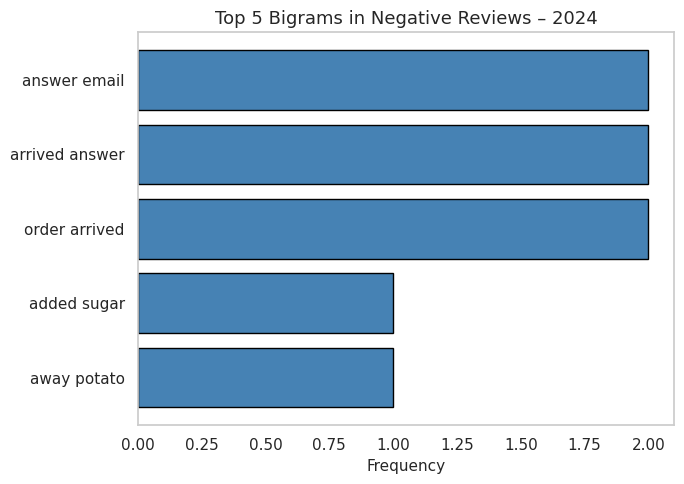

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Convert 'date' column to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Step 2: Create a 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

# Step 3: Filter for Negative + Neutral reviews with clean comments
filtered_df = df_reviews[
    (df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])) &
    (df_reviews['clean_comment'].notna())
].copy()

# Step 4: Loop over each year in the filtered data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
years = filtered_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = filtered_df[filtered_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract bigrams
    X = vectorizer.fit_transform(comments)
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top 5 Bigrams in Negative Reviews – {int(year)}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


## N-grams by Product Group

## Postive Comments

In [200]:
# Postive Bigram by Product Group
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display, clear_output

# Function to plot bigrams for positive reviews of a selected product
def plot_positive_bigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Positive') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No positive reviews for {product_name}")
        return

    # Bigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Positive Bigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_positive_bigrams, product_name=product_dropdown)

interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_positive_bigrams(product_name)>

In [201]:
# Postive Bigram by Product Group
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display, clear_output

# Function to plot bigrams for positive reviews of a selected product
def plot_positive_bigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Positive') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No positive reviews for {product_name}")
        return

    # Bigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Positive Bigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_positive_bigrams, product_name=product_dropdown)



interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_positive_bigrams(product_name)>

## Negative Comments

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_negative_bigrams(product_name):
    clear_output(wait=True)

    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Negative') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No negative reviews for {product_name}")
        return

    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(10)

    plt.figure(figsize=(7, 4))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Negative Bigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Dropdown widget
neg_product_dropdown = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product (Negative):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

widgets.interact(plot_negative_bigrams, product_name=neg_product_dropdown)


interactive(children=(Dropdown(description='Product (Negative):', layout=Layout(width='50%'), options=('Avocad…

<function __main__.plot_negative_bigrams(product_name)>

## Neutral Comments

In [203]:
def plot_neutral_bigrams(product_name):
    clear_output(wait=True)

    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Neutral') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No neutral reviews for {product_name}")
        return

    vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    bigram_counts = X.sum(axis=0).A1
    bigram_terms = vectorizer.get_feature_names_out()

    bigram_freq_df = pd.DataFrame({'bigram': bigram_terms, 'count': bigram_counts})
    top_bigrams = bigram_freq_df.sort_values(by='count', ascending=False).head(10)

    plt.figure(figsize=(7, 4))
    plt.barh(top_bigrams['bigram'][::-1], top_bigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Neutral Bigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Dropdown widget
neutral_product_dropdown = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product (Neutral):',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

widgets.interact(plot_neutral_bigrams, product_name=neutral_product_dropdown)

interactive(children=(Dropdown(description='Product (Neutral):', layout=Layout(width='50%'), options=('Avocado…

<function __main__.plot_neutral_bigrams(product_name)>

# Trigrams of Postive, Negative and Neutral Reviews

## Postive Trigram

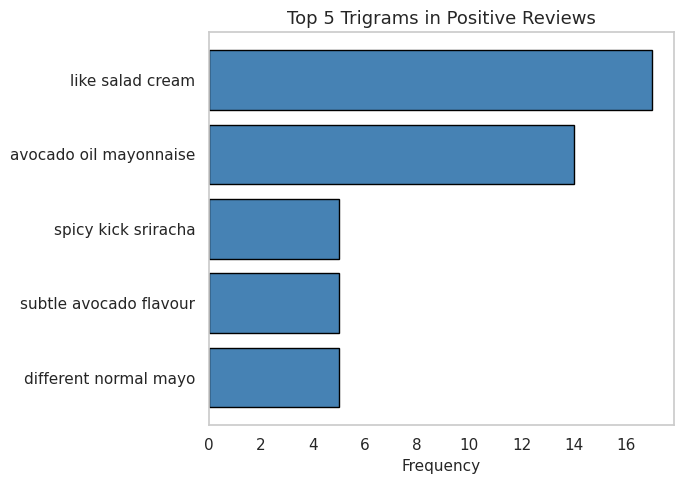

In [204]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Positive') &
    (df_reviews['clean_comment'].notna())
]

# Trigram extraction
vectorizer_tri = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
X_tri = vectorizer_tri.fit_transform(positive_df['clean_comment'])

# Sum frequencies
trigram_counts = X_tri.sum(axis=0).A1
trigram_terms = vectorizer_tri.get_feature_names_out()

trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
plt.title("Top 5 Trigrams in Positive Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()


## Negative Trigrams

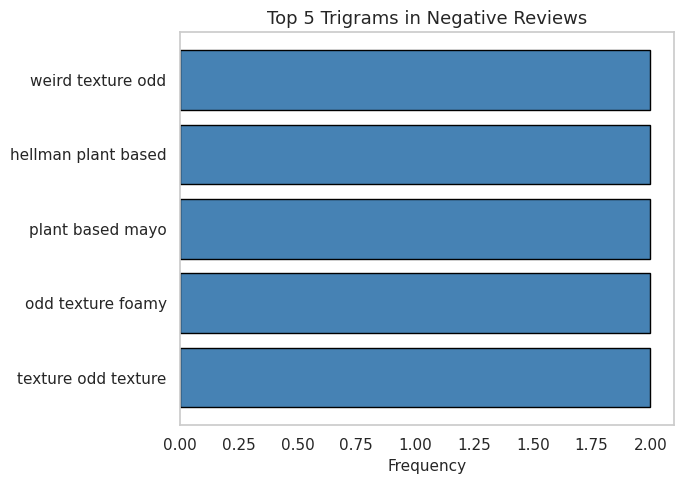

In [205]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Negative') &
    (df_reviews['clean_comment'].notna())
]

# Trigram extraction
vectorizer_tri = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
X_tri = vectorizer_tri.fit_transform(positive_df['clean_comment'])

# Sum frequencies
trigram_counts = X_tri.sum(axis=0).A1
trigram_terms = vectorizer_tri.get_feature_names_out()

trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
plt.title("Top 5 Trigrams in Negative Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()


## Neutral Trigrams

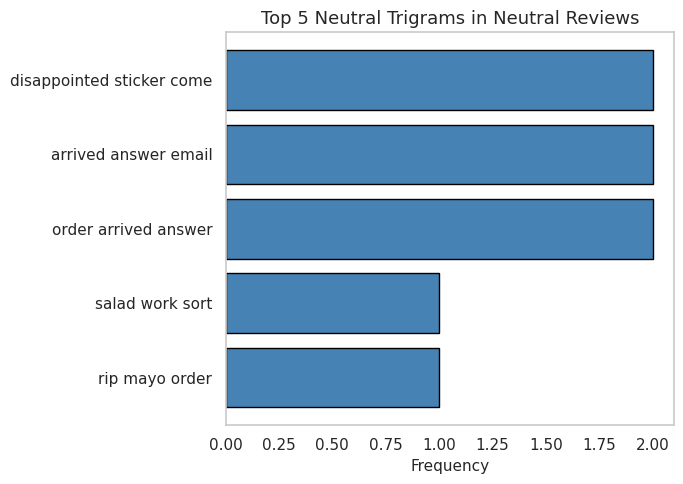

In [206]:
# Filter only Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Neutral') &
    (df_reviews['clean_comment'].notna())
]

# Trigram extraction
vectorizer_tri = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
X_tri = vectorizer_tri.fit_transform(positive_df['clean_comment'])

# Sum frequencies
trigram_counts = X_tri.sum(axis=0).A1
trigram_terms = vectorizer_tri.get_feature_names_out()

trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Plot for Positive Reviews
plt.figure(figsize=(7, 5))
plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
plt.title("Top 5 Neutral Trigrams in Neutral Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()

## Negative & Neutral Trigram

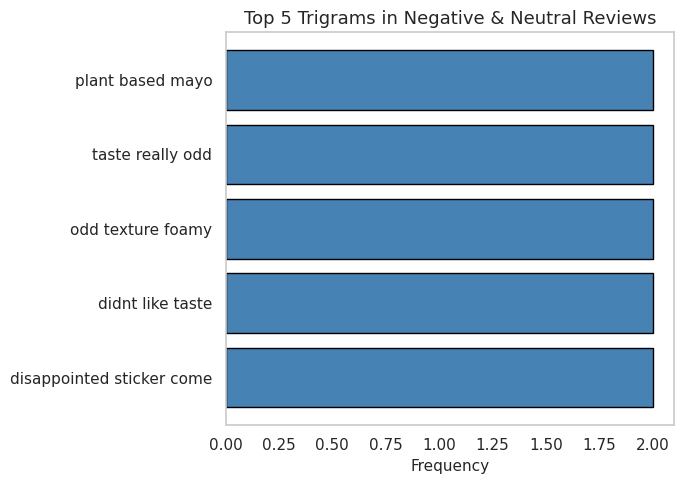

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Filter for Negative + Neutral with clean comments
filtered_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])]
filtered_df = filtered_df[filtered_df['clean_comment'].notna()]

# Step 2: Trigram extraction
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
X = vectorizer.fit_transform(filtered_df['clean_comment'])

# Step 3: Frequency counts
trigram_counts = X.sum(axis=0).A1
trigram_terms = vectorizer.get_feature_names_out()

trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

# Step 4: Plot
plt.figure(figsize=(7, 5))
plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
plt.title("Top 5 Trigrams in Negative & Neutral Reviews", fontsize=13)
plt.xlabel("Frequency", fontsize=11)
plt.tight_layout()
plt.grid(False)
plt.show()


## Postive Trigrams by Time

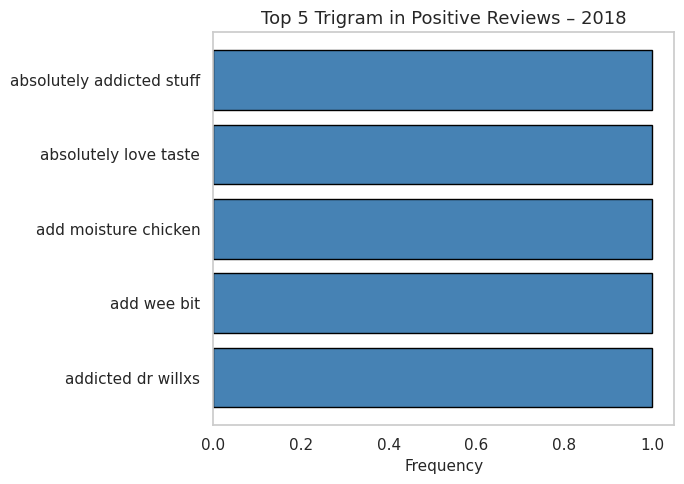

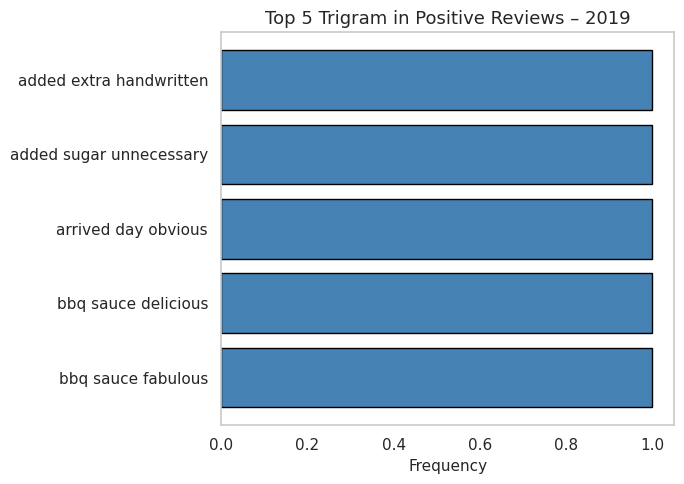

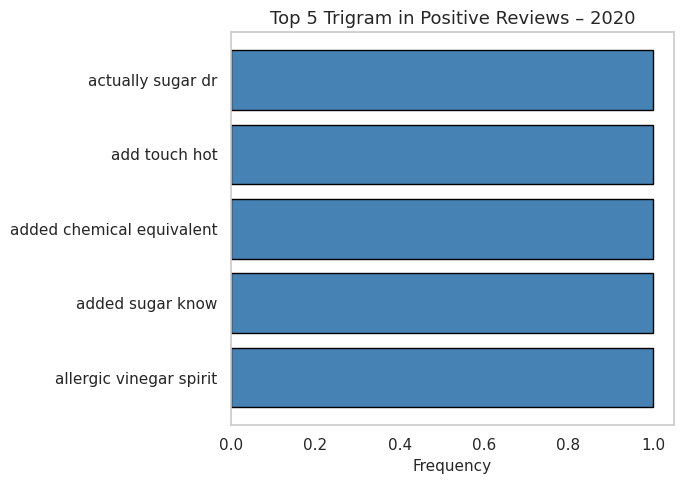

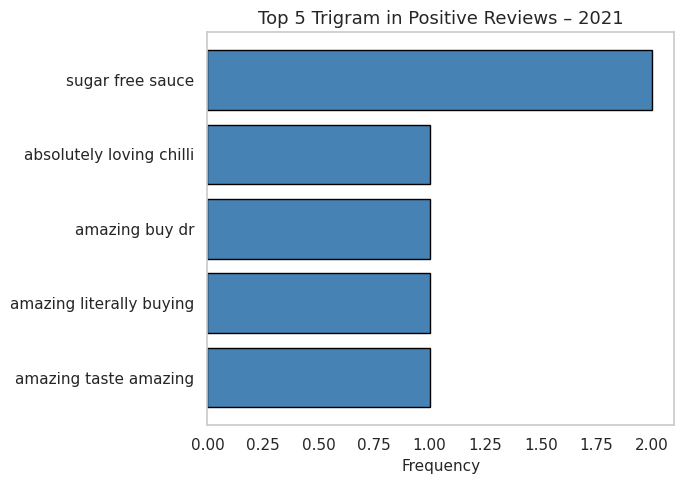

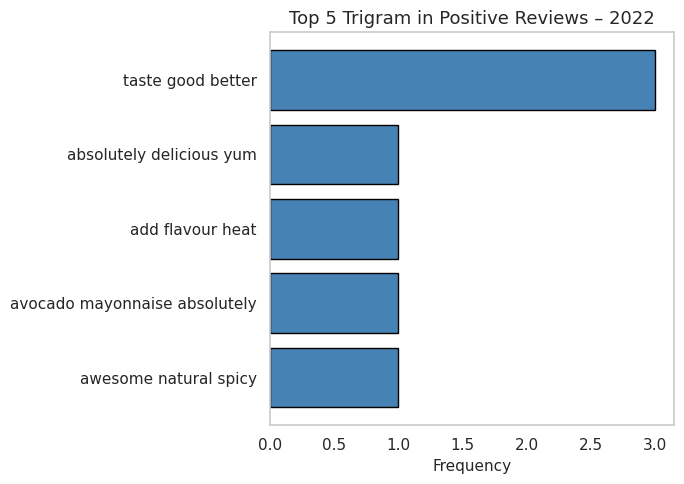

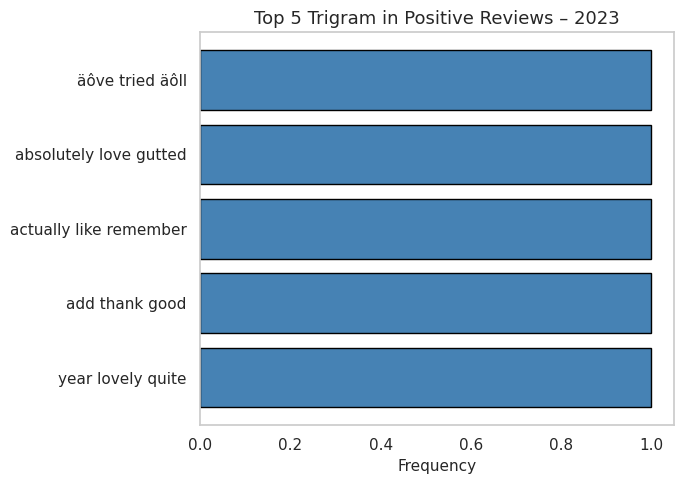

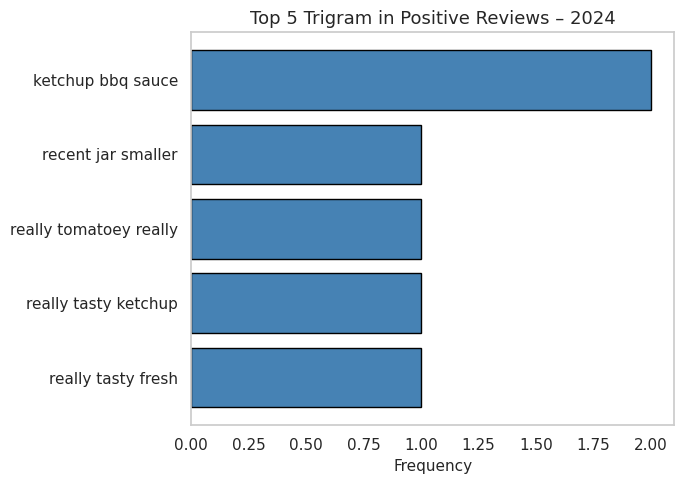

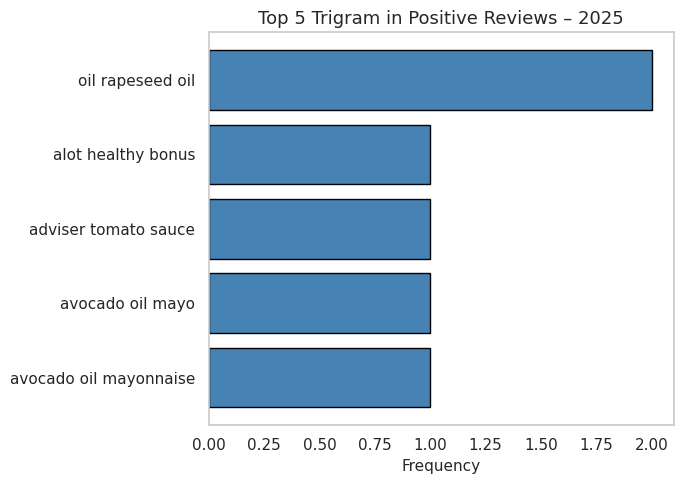

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Ensure 'date' is in datetime format
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Step 2: Create a 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

# Step 3: Filter for Positive reviews with clean comments
positive_df = df_reviews[
    (df_reviews['vader_sentiment_label'] == 'Positive') &
    (df_reviews['clean_comment'].notna())
].copy()

# Step 4: Loop over each year in the data
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
years = positive_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = positive_df[positive_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract trigrams
    X = vectorizer.fit_transform(comments)
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top 5 Trigram in Positive Reviews – {int(year)}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


## Negative + Neutral Trigrams by Time


Skipping 2018.0 – not enough comments.
Skipping 2020.0 – not enough comments.
Skipping 2022.0 – not enough comments.
Skipping 2023.0 – not enough comments.


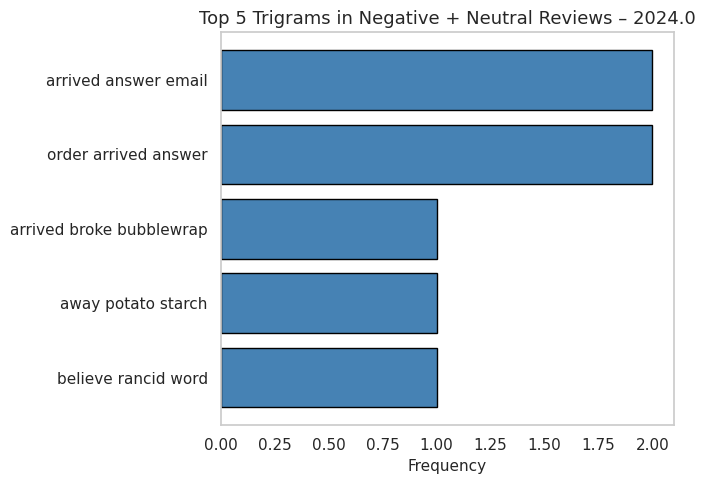

In [209]:
# Step 1: Convert 'date' to datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Step 2: Create 'year' column
df_reviews['year'] = df_reviews['date'].dt.year

# Step 3: Filter for Negative + Neutral reviews with clean comments
filtered_df = df_reviews[
    (df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])) &
    (df_reviews['clean_comment'].notna())
].copy()

# Step 4: Loop over each year
vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
years = filtered_df['year'].dropna().unique()
years = sorted(years)

for year in years:
    yearly_df = filtered_df[filtered_df['year'] == year]
    comments = yearly_df['clean_comment'].dropna().tolist()

    if len(comments) < 5:
        print(f"Skipping {year} – not enough comments.")
        continue

    # Extract trigrams
    X = vectorizer.fit_transform(comments)
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(5)

    # Plot
    plt.figure(figsize=(7, 5))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top 5 Trigrams in Negative + Neutral Reviews – {year}", fontsize=13)
    plt.xlabel("Frequency", fontsize=11)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


# N-gram by Product Group

## Postive Trigram by Product

In [210]:
# Positive Trigram by Product Group
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot trigrams for positive reviews of a selected product
def plot_positive_trigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Positive') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No positive reviews for {product_name}")
        return

    # Trigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Positive Trigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown_trigram = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_positive_trigrams, product_name=product_dropdown_trigram)


interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_positive_trigrams(product_name)>

## Negative Trigram by Product

In [211]:
# Function to plot trigrams for negative reviews of a selected product
def plot_negative_trigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Negative') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No negative reviews for {product_name}")
        return

    # Trigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Negative Trigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown_neg_trigram = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_negative_trigrams, product_name=product_dropdown_neg_trigram)


interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_negative_trigrams(product_name)>

## Neutral Trigram by Product

In [212]:
# Function to plot trigrams for neutral reviews of a selected product
def plot_neutral_trigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Neutral') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No neutral reviews for {product_name}")
        return

    # Trigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Neutral Trigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown_neutral_trigram = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_neutral_trigrams, product_name=product_dropdown_neutral_trigram)


interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_neutral_trigrams(product_name)>

In [313]:
# Function to plot trigrams for neutral reviews of a selected product
def plot_neutral_trigrams(product_name):
    clear_output(wait=True)

    # Filter data
    product_df = df_reviews[
        (df_reviews['product_group'] == product_name) &
        (df_reviews['vader_sentiment_label'] == 'Neutral') &
        (df_reviews['clean_comment'].notna())
    ]

    if product_df.empty:
        print(f"No neutral reviews for {product_name}")
        return

    # Trigram extraction
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), max_features=1000)
    X = vectorizer.fit_transform(product_df['clean_comment'])
    trigram_counts = X.sum(axis=0).A1
    trigram_terms = vectorizer.get_feature_names_out()

    trigram_freq_df = pd.DataFrame({'trigram': trigram_terms, 'count': trigram_counts})
    top_trigrams = trigram_freq_df.sort_values(by='count', ascending=False).head(10)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(top_trigrams['trigram'][::-1], top_trigrams['count'][::-1], color='steelblue', edgecolor='black')
    plt.title(f"Top Neutral Trigrams – {product_name}", fontsize=12)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.grid(False)
    plt.show()

# Create dropdown
product_dropdown_neutral_trigram = widgets.Dropdown(
    options=sorted(df_reviews['product_group'].dropna().unique()),
    description='Product:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Connect dropdown to plot
widgets.interact(plot_neutral_trigrams, product_name=product_dropdown_neutral_trigram)

interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=('Avocado Mayo', 'B…

<function __main__.plot_neutral_trigrams(product_name)>

In [214]:
# Total reviews
total_reviews = len(df_reviews)

# Filter Negative + Neutral
neg_neu_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])]
problem_reviews = len(neg_neu_df)

# Calculate %
problem_pct = round((problem_reviews / total_reviews) * 100, 1)

# Print summary
print(f"📊 Total Reviews: {total_reviews}")
print(f"❗ Negative + Neutral Reviews: {problem_reviews}")
print(f"⚠️ These represent {problem_pct}% of all reviews.")


📊 Total Reviews: 843
❗ Negative + Neutral Reviews: 107
⚠️ These represent 12.7% of all reviews.


## Theme Analysis

In [215]:
# Define your themes exactly as provided
themes = {
    'positive_feedback': [
        'amazing', 'awesome', 'love', 'delicious', 'bundle', 'dream', 'yummy', 'congrats', 'wicked', 'killing',
        'try', 'well done', 'delish', 'omg', 'lush', 'woweee', 'great', 'good', 'brilliant', 'yum', 'exciting',
        'wow', 'lovely', 'favourite', 'xxx', 'congratulations', 'rushing', 'huge', 'creation', 'fantastic',
        'unbelievable', 'hello'
    ],
    'price_value': [
        'price', 'expensive', 'ordered', 'box', 'value', 'waitrose', 'srp', 'cost', 'money', 'cheap', 'deal', '£'
    ],
    'packaging_issue': [
        'squeeze', 'bottle', 'nozzle', 'kit', 'shrunk', 'jar', 'lid', 'top', 'packaging', 'cap', 'broken', 'seal', 'manufacture'
    ],
    'taste_issue': [
        'taste', 'tastes', 'crap', 'bland', 'hot', 'sundried', 'pasta', 'chicken', 'bad', 'flavour', 'awful',
        'aftertaste', 'sour', 'weird', 'disgusting'
    ],
    'product_mismatch': [
        'sriracha', 'ketchup', 'wills', 'dr', 'heinz', 'mayo', 'sauce', 'different', 'wrong', 'fake', 'misleading', 'label'
    ],
    'ingredient_concern': [
         'oil', 'tbsp', 'pan', 'add', 'new', 'vegan', 'tortilla', 'egg', 'sugar',
        'preservative', 'salt', 'ingredient', 'stevia'
    ]
}

# Filter only negative + neutral reviews
problem_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])].copy()
problem_df = problem_df[problem_df['clean_comment'].notna()]

# Assign themes based on keyword matching
def tag_themes(text):
    text = text.lower()
    matches = [theme for theme, keywords in themes.items() if any(kw in text for kw in keywords)]
    return matches if matches else ['other']

problem_df['themes'] = problem_df['clean_comment'].apply(tag_themes)

# Explode theme column for counting
theme_exploded = problem_df.explode('themes')

# Count frequency
theme_counts = theme_exploded['themes'].value_counts().reset_index()
theme_counts.columns = ['theme', 'count']

theme_counts


theme  count
0    product_mismatch     67
1         taste_issue     58
2  ingredient_concern     32
3   positive_feedback     25
4     packaging_issue     19
5         price_value     13
6               other     13

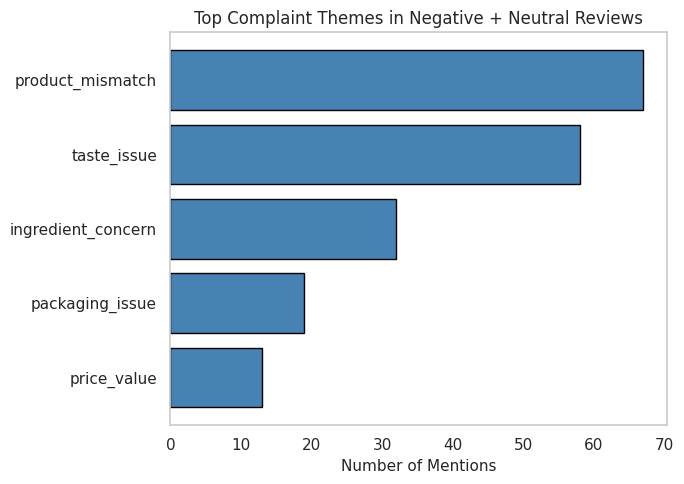

In [216]:
import matplotlib.pyplot as plt

# Only include themes that aren't 'positive_feedback' or 'other' for cleaner view
plot_df = theme_counts[~theme_counts['theme'].isin(['positive_feedback', 'other'])].copy()

# Sort for better visuals
plot_df = plot_df.sort_values(by='count', ascending=True)

# Plot
plt.figure(figsize=(7, 5))
plt.barh(plot_df['theme'], plot_df['count'], color='steelblue', edgecolor='black')

# Labels and layout
plt.title("Top Complaint Themes in Negative + Neutral Reviews", fontsize=12)
plt.xlabel("Number of Mentions", fontsize=11)
plt.ylabel("")
plt.grid(False)
plt.tight_layout()
plt.show()

In [217]:
 themes = {
    'positive_feedback': [
        'amazing', 'awesome', 'love', 'delicious', 'bundle', 'dream', 'yummy', 'congrats', 'wicked', 'killing',
        'try', 'well done', 'delish', 'omg', 'lush', 'woweee', 'great', 'good', 'brilliant', 'yum', 'exciting',
        'wow', 'lovely', 'favourite', 'xxx', 'congratulations', 'rushing', 'huge', 'creation', 'fantastic',
        'unbelievable', 'hello'
    ],
    'price_value': [
        'price', 'expensive', 'ordered', 'box', 'value', 'waitrose', 'srp', 'cost', 'money', 'cheap', 'deal', '£'
    ],
    'packaging_issue': [
        'squeeze', 'bottle', 'nozzle', 'kit', 'shrunk', 'jar', 'lid', 'top', 'packaging', 'cap', 'broken', 'seal', 'manufacture'
    ],
    'taste_issue': [
        'taste', 'tastes', 'crap', 'bland', 'hot', 'sundried', 'pasta', 'chicken', 'bad', 'flavour', 'awful',
        'aftertaste', 'sour', 'weird', 'disgusting'
    ],
    'product_mismatch': [
        'sriracha', 'ketchup', 'wills', 'dr', 'heinz', 'mayo', 'sauce', 'different', 'wrong', 'fake', 'misleading', 'label'
    ],
    'ingredient_concern': [
         'oil', 'tbsp', 'pan', 'add', 'new', 'vegan', 'tortilla', 'egg', 'sugar',
        'preservative', 'salt', 'ingredient', 'stevia'
    ]
}

In [218]:
def tag_themes_flexible(text):
    text = text.lower()
    matched_themes = []
    for theme, keywords in themes.items():
        for keyword in keywords:
            if keyword in text:
                matched_themes.append(theme)
                break  # only one match per theme
    return matched_themes if matched_themes else ['other']

In [219]:
problem_df = df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])].copy()
problem_df = problem_df[problem_df['clean_comment'].notna()]

problem_df['themes'] = problem_df['clean_comment'].apply(tag_themes_flexible)

In [220]:
theme_exploded = problem_df.explode('themes')
theme_counts = theme_exploded['themes'].value_counts().reset_index()
theme_counts.columns = ['theme', 'count']
theme_counts

theme  count
0    product_mismatch     67
1         taste_issue     58
2  ingredient_concern     32
3   positive_feedback     25
4     packaging_issue     19
5         price_value     13
6               other     13

In [221]:
# List of themes to report (excluding 'other')
themes_to_summarize = [t for t in problem_df.explode('themes')['themes'].unique() if t not in ['other', 'positive_feedback']]

# Dictionary to hold summaries
summary_output = {}

for theme in themes_to_summarize:
    # Filter reviews tagged with this theme
    comments = problem_df[problem_df['themes'].apply(lambda x: theme in x)]

    count = len(comments)
    examples = comments['clean_comment'].dropna().unique()[:3]

    summary_output[theme] = {
        'count': count,
        'examples': list(examples)
    }

# Print the summaries
for theme, info in summary_output.items():
    print(f"\n {theme.replace('_', ' ').title()} — {info['count']} mention(s):")
    for comment in info['examples']:
        print(f"- {comment.strip()}")


 Packaging Issue — 19 mention(s):
- thing stopping star rapeseed oil used instead olive oil
- didn‚äôt realise mayo high concentration highly poisonous rapeseed oil order jar going straight bin
- reason doesnxt get star chilli seed get stuck cap block otherwise itxs fantastic sauce

 Ingredient Concern — 32 mention(s):
- thing stopping star rapeseed oil used instead olive oil
- didn‚äôt realise mayo high concentration highly poisonous rapeseed oil order jar going straight bin
- loved quality mayo already stated jar small make expensive buy sorry donxt think buying look cheaper alternative still canxt head around buy cheap crap lot additive low price yet crap removed price go x

 Price Value — 13 mention(s):
- always looking healthier tastier option come food choice dr willxs tick box going back
- loved quality mayo already stated jar small make expensive buy sorry donxt think buying look cheaper alternative still canxt head around buy cheap crap lot additive low price yet crap removed

# Net Promoter Score & Star Ratings

## NPS = % Promoters - % Detractors


In [222]:
# Map VADER sentiment to NPS category
def map_to_nps_label(sentiment):
    if sentiment == 'Positive':
        return 'Promoter'
    elif sentiment == 'Neutral':
        return 'Passive'
    else:
        return 'Detractor'

df_reviews['nps_category'] = df_reviews['vader_sentiment_label'].apply(map_to_nps_label)

# Count totals
nps_counts = df_reviews['nps_category'].value_counts(normalize=True) * 100

# Calculate NPS
nps_score = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

# Display
print("NPS Breakdown (%):")
print(nps_counts.round(2))
print(f"\nNet Promoter Score (NPS): {nps_score:.2f}")

NPS Breakdown (%):
nps_category
Promoter     87.31
Detractor     7.24
Passive       5.46
Name: proportion, dtype: float64

Net Promoter Score (NPS): 80.07


In [223]:
import plotly.graph_objects as go

nps_score = nps_counts.get('Promoter', 0) - nps_counts.get('Detractor', 0)

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=nps_score,
    title={'text': "Net Promoter Score"},
    gauge={
        'axis': {'range': [-100, 100]},
        'bar': {'color': "crimson"},
        'steps': [
            {'range': [-100, 0], 'color': '#800000'},
            {'range': [0, 50], 'color': '#cc0000'},
            {'range': [50, 100], 'color': '#ff4d4d'}
        ]
    }
))
fig.update_layout(height=300, width=500)
fig.show()

### Break Down NPS by Product or Platform
* Which product group is dragging down your overall NPS?
* Which platform (Yotpo, Ocado, etc.) shows stronger loyalty?


## NPS by Product Group

In [224]:
# Map sentiment to NPS category
df_reviews['nps_category'] = df_reviews['vader_sentiment_label'].map({
    'Positive': 'Promoter',
    'Neutral': 'Passive',
    'Negative': 'Detractor'
})

# Group by product_group and NPS category
product_group_counts = df_reviews.groupby(['product_group', 'nps_category']).size().unstack(fill_value=0)

# Calculate % per category
product_group_percent = product_group_counts.div(product_group_counts.sum(axis=1), axis=0) * 100

# Calculate NPS = % Promoter - % Detractor
product_group_percent['NPS'] = product_group_percent.get('Promoter', 0) - product_group_percent.get('Detractor', 0)

# View result
product_nps = product_group_percent[['Promoter', 'Passive', 'Detractor', 'NPS']].round(1)
product_nps = product_nps.sort_values(by='NPS', ascending=False)

product_nps

nps_category        Promoter  Passive  Detractor    NPS
product_group                                          
Caesar Dressing        100.0      0.0        0.0  100.0
Buffalo Hot Sauce       94.4      5.6        0.0   94.4
Jalapeño Hot Sauce      92.1      2.6        5.3   86.8
Sriracha Hot Sauce      88.0     10.0        2.0   86.0
Sriracha Mayo           90.6      4.7        4.7   85.9
Classic Mayo            91.0      3.4        5.6   85.4
Tomato Ketchup          88.7      6.5        4.8   83.9
Vegan Mayo              87.1      4.8        8.1   79.0
BBQ Sauce               84.9      8.1        7.0   77.9
Avocado Mayo            77.5      9.8       12.7   64.7
Chipotle Ranch          50.0      0.0       50.0    0.0

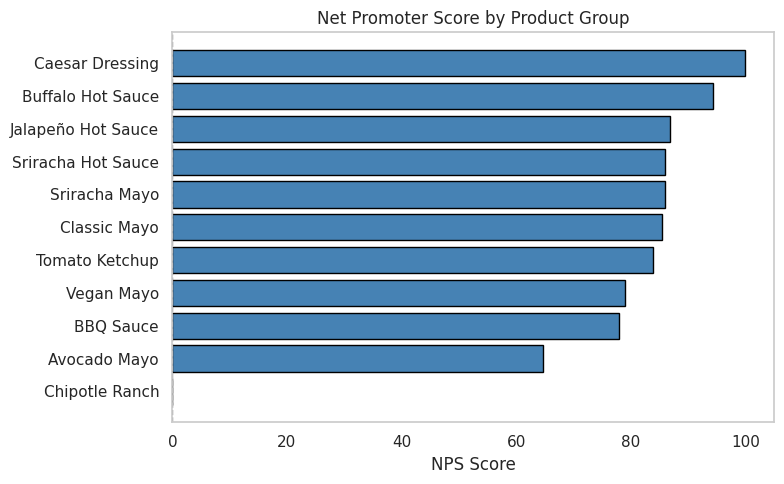

In [225]:
import matplotlib.pyplot as plt

# Plot NPS by product_group
plt.figure(figsize=(8, 5))
product_nps_sorted = product_nps.sort_values(by='NPS', ascending=True)

plt.barh(product_nps_sorted.index, product_nps_sorted['NPS'], color='steelblue', edgecolor='black')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("NPS Score")
plt.title("Net Promoter Score by Product Group")
plt.grid(False)
plt.tight_layout()
plt.show()

##  NPS by Platform

In [226]:
# Step 1: Group by source and NPS category
source_counts = df_reviews.groupby(['source', 'nps_category']).size().unstack(fill_value=0)

# Step 2: Calculate % per category
source_percent = source_counts.div(source_counts.sum(axis=1), axis=0) * 100

# Step 3: Calculate NPS
source_percent['NPS'] = source_percent.get('Promoter', 0) - source_percent.get('Detractor', 0)

# Step 4: View result
source_nps = source_percent[['Promoter', 'Passive', 'Detractor', 'NPS']].round(1)
source_nps = source_nps.sort_values(by='NPS', ascending=False)

source_nps

nps_category  Promoter  Passive  Detractor   NPS
source                                          
Yotpo             87.0      8.9        4.1  83.0
Tesco             89.8      1.8        8.4  81.3
Ocado             86.0      3.5       10.5  75.5
Waitrose          83.3      4.2       12.5  70.8

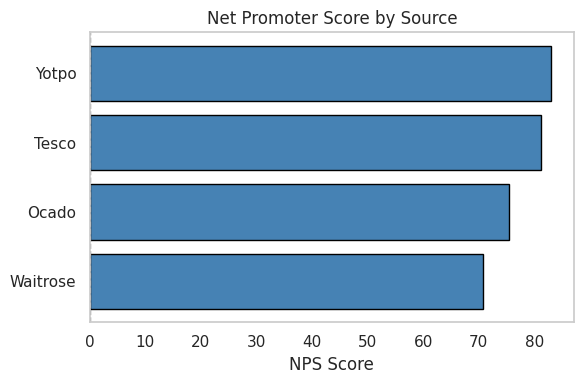

In [227]:
# Plot NPS by source (platform)
plt.figure(figsize=(6, 4))
source_nps_sorted = source_nps.sort_values(by='NPS', ascending=True)

plt.barh(source_nps_sorted.index, source_nps_sorted['NPS'], color='steelblue', edgecolor='black')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("NPS Score")
plt.title("Net Promoter Score by Source")
plt.grid(False)
plt.tight_layout()
plt.show()

## STAR Rating

In [228]:
# Count how many reviews for each star rating
df_reviews['rating'].value_counts().sort_index()

rating
1     77
2     25
3     52
4     90
5    599
Name: count, dtype: int64

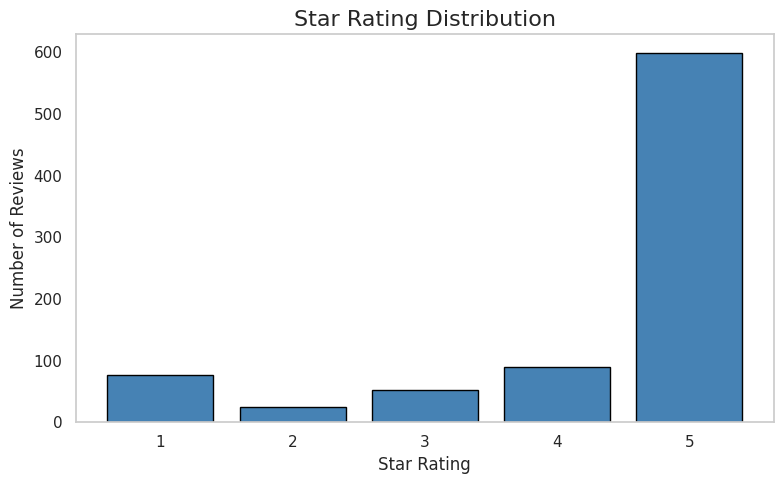

In [229]:
# Count and sort star ratings
rating_counts = df_reviews['rating'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
plt.title('Star Rating Distribution', fontsize=16)
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rating_counts.index)
plt.grid(False)
plt.tight_layout()
plt.show()

In [230]:
print("Yotpo:", df_yotpo.shape[0])
print("External:", df_external.shape[0])

Yotpo: 370
External: 473


## Time Analysis

In [231]:
# Convert the 'date' column to datetime objects, coercing errors to NaT
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

years = df_reviews['date'].dt.year.dropna().astype(int).unique()

print("Years in your data:", sorted(years))

Years in your data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


In [232]:
df_reviews.shape

(843, 15)

### Dr. Will’s Reviews per Month : The number of reviews submitted each month


This “Reviews per Month” chart tells you a few key things at a glance:

Overall volume is rising over time
- In 2018–2020 most months saw 0–2 reviews, with occasional spikes (e.g.mid-2018).
- From 2021 onward you start seeing more consistent activity—and by 2023–2024 you’re regularly in the 2–5 review range, with peaks up to 8–9.

Periodic spikes

- Notice sharp jumps around summer 2018, mid-2021, and early-2022—these could correspond to promotions, product launches, or marketing campaigns.

Seasonal or data gaps

- There are still months with zero reviews even in 2024–2025, which could be off-season lulls or simply missing data for those periods.

- The long flat stretch in 2020 likely reflects either a drop in feedback collection or a real slowdown (e.g., pandemic impact).

Data-quality check

- Seeing completely empty months is a prompt to ask: “Are those true zero-review months, or do I need to backfill / merge additional sources?”

## Number of reviews per month



In [233]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])  # Convert to datetime
df_reviews.set_index('date', inplace=True)  # Set as index

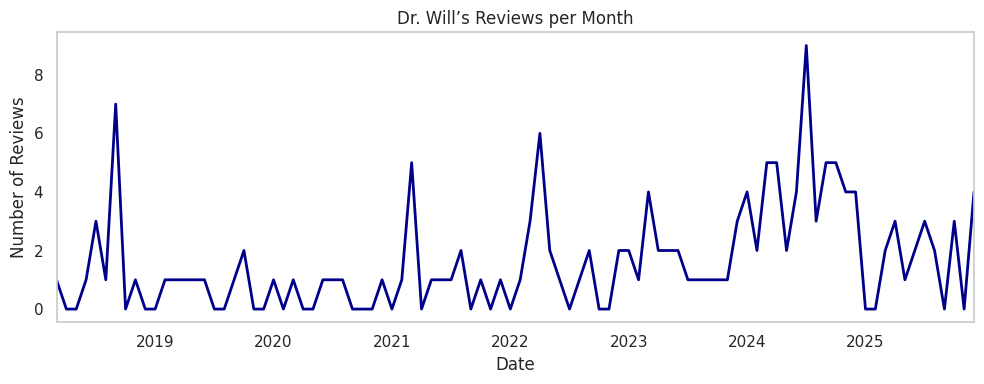

In [234]:
# Resample to month‐end buckets and count
monthly_counts = df_reviews.resample('ME').size().rename('review_count')

# Plot
plt.figure(figsize=(10, 4))
monthly_counts.plot(color='darkblue', linewidth=2)
plt.title("Dr. Will’s Reviews per Month")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.grid(False)
plt.show()

### Monthly/Weekly Sentiment Trend
The time series chart illustrates the monthly average sentiment of customer reviews for Dr. Will’s products between 2018 and 2025, based on VADER sentiment analysis. Overall, sentiment remains strongly positive throughout the period, with most months averaging above 0.5 and many approaching 0.9, reflecting consistent customer satisfaction. However, notable dips in sentiment—particularly in late 2023 and early 2024—may indicate isolated product issues, delivery delays, or seasonal effects. These fluctuations highlight key opportunities for the Dr. Will’s team to investigate underlying causes and align product or marketing strategies accordingly. The graph serves as an early indicator of brand health and could be used in a dashboard to support real-time decision-making across product lines.


## Monthly average sentiment over time

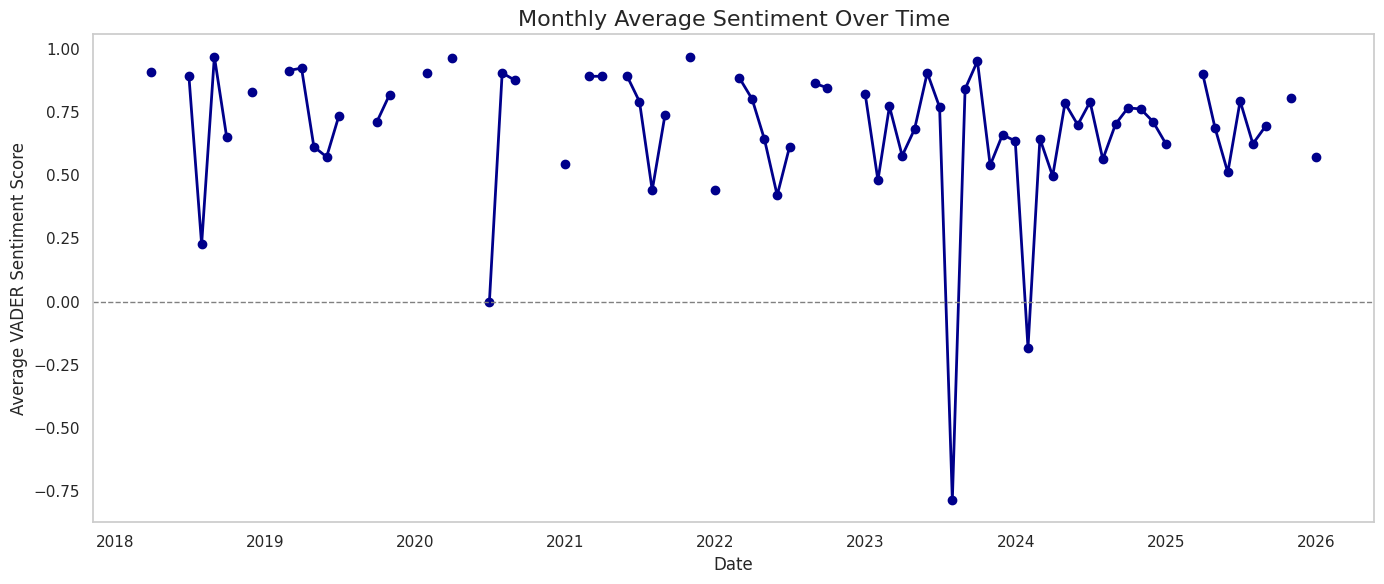

In [235]:
# Resample using 'ME' (Month-End) to avoid deprecation warning
monthly_sentiment = df_reviews.resample('ME')['vader_score'].mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment, color='darkblue', linewidth=2, marker='o')

plt.title("Monthly Average Sentiment Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average VADER Sentiment Score", fontsize=12)
plt.grid(False)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

In [236]:
print(df_reviews['vader_score'].describe()) # to check the above graph

count    843.000000
mean       0.646073
std        0.407227
min       -0.944200
25%        0.585900
50%        0.812600
75%        0.911750
max        0.989200
Name: vader_score, dtype: float64


## Rolling Average
Objective: Smooth out fluctuations to see clearer long-term trends.
The chart shows monthly customer sentiment for Dr. Will’s products, with a 3-month rolling average to smooth out short-term fluctuations. Overall sentiment remains consistently positive, with most months averaging above 0.7. However, the rolling trend highlights a clear dip in late 2023 and early 2024, suggesting a period of lower customer satisfaction that may warrant further investigation. The upward trend in 2025 indicates a recovery, pointing to improved customer perception or successful corrective actions

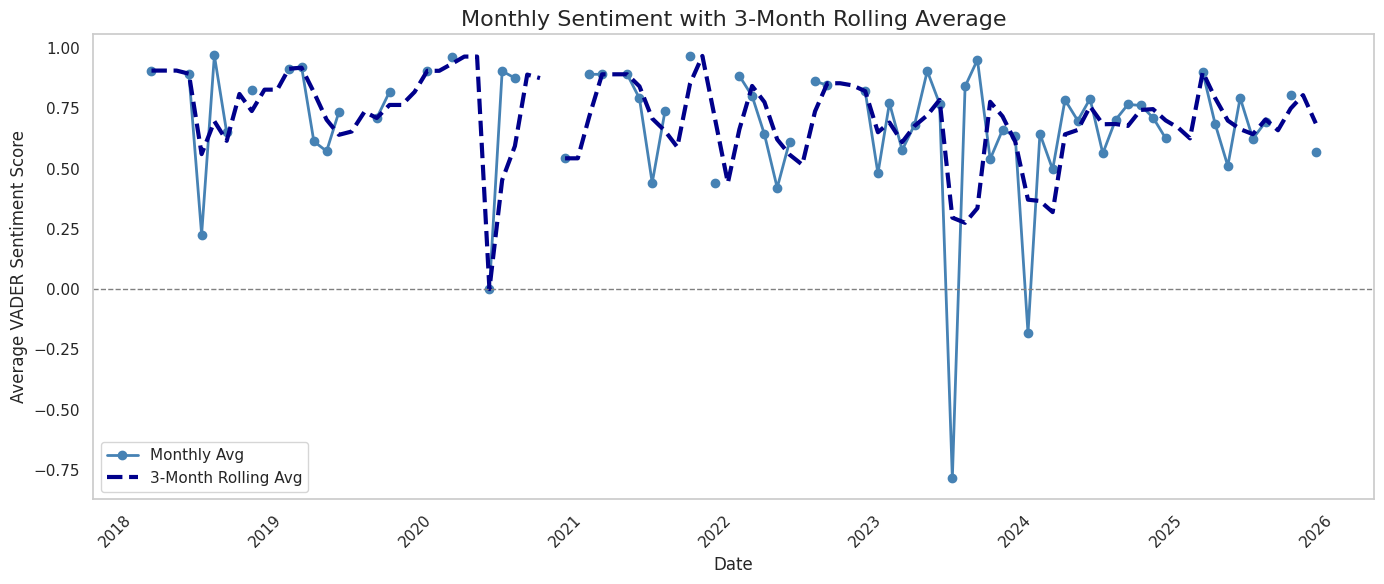

In [237]:
# Calculate 3-month rolling average
rolling_avg = monthly_sentiment.rolling(window=3, min_periods=1).mean()

# Plot both original and rolling average
plt.figure(figsize=(14, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment, color='steelblue', linewidth=2, marker='o', label='Monthly Avg')
plt.plot(rolling_avg.index, rolling_avg, color='darkblue', linewidth=3, linestyle='--', label='3-Month Rolling Avg')

# Plotting
plt.title("Monthly Sentiment with 3-Month Rolling Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average VADER Sentiment Score", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(False)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [238]:
!pip install ipywidgets


## Sentiment Trend by Product over time

In [239]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Reset index in case 'date' is already the index
df_reviews = df_reviews.reset_index()

# Convert 'date' column to datetime safely
df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Drop any missing values
df_clean = df_reviews.dropna(subset=['vader_score', 'product', 'date'])

# Set 'date' as index for time resampling
df_clean = df_clean.set_index('date')

# Group by product and resample sentiment monthly
monthly_sentiment_by_product = (
    df_clean
    .groupby('product')
    .resample('ME')['vader_score']
    .mean()
    .reset_index()
)

# Build dropdown options
product_options = sorted(monthly_sentiment_by_product['product'].unique())

# Define the plotting function
def plot_product_sentiment(selected_product):
    df_filtered = monthly_sentiment_by_product[
        monthly_sentiment_by_product['product'] == selected_product
    ]
    plt.figure(figsize=(12, 5))
    plt.plot(df_filtered['date'], df_filtered['vader_score'], marker='o', linewidth=2, color='steelblue')
    plt.title(f"Monthly Sentiment Trend for '{selected_product}'", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Average Sentiment Score")
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Launch the interactive dropdown
widgets.interact(
    plot_product_sentiment,
    selected_product=widgets.Dropdown(
        options=product_options,
        description='Product:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )
)



interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=("Dr. Will's Avocad…

<function __main__.plot_product_sentiment(selected_product)>

In [240]:
# to recheck previous graph
monthly_sentiment_by_product[
    monthly_sentiment_by_product['product'] == "Dr. Will's Sriracha"
]

product       date  vader_score
305  Dr. Will's Sriracha 2021-02-28      0.89080
306  Dr. Will's Sriracha 2021-03-31      0.95060
307  Dr. Will's Sriracha 2021-04-30          NaN
308  Dr. Will's Sriracha 2021-05-31          NaN
309  Dr. Will's Sriracha 2021-06-30          NaN
310  Dr. Will's Sriracha 2021-07-31          NaN
311  Dr. Will's Sriracha 2021-08-31      0.73725
312  Dr. Will's Sriracha 2021-09-30          NaN
313  Dr. Will's Sriracha 2021-10-31          NaN
314  Dr. Will's Sriracha 2021-11-30          NaN
315  Dr. Will's Sriracha 2021-12-31          NaN
316  Dr. Will's Sriracha 2022-01-31          NaN
317  Dr. Will's Sriracha 2022-02-28      0.88430
318  Dr. Will's Sriracha 2022-03-31          NaN
319  Dr. Will's Sriracha 2022-04-30      0.70030
320  Dr. Will's Sriracha 2022-05-31          NaN
321  Dr. Will's Sriracha 2022-06-30          NaN
322  Dr. Will's Sriracha 2022-07-31          NaN
323  Dr. Will's Sriracha 2022-08-31          NaN
324  Dr. Will's Sriracha 2022-09-30          NaN
325  Dr. Will's Sriracha 2022-10-31          NaN
326  Dr. Will's Sriracha 2022-11-30          NaN
327  Dr. Will's Sriracha 2022-12-31      0.68020

In [241]:
df_reviews.head()

date  index  rating                             product  \
0 2025-10-05 22:56:00      0       3  Dr. Will's Chipotle Ranch Dressing   
1 2025-10-05 12:15:00      1       5   Dr. Will's Avocado Oil Mayonnaise   
2 2025-10-05 06:57:00      2       5   Dr. Will's Avocado Oil Mayonnaise   
3 2025-07-05 11:37:00      3       5             Dr. Will's Classic Mayo   
4                 NaT      4       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  vader_score vader_sentiment_label sentiment_flag    year  \
0  Chipotle Ranch       0.7178              Positive           None  2025.0   
1    Avocado Mayo       0.8442              Positive           None  2025.0   
2    Avocado Mayo       0.8514              Positive           None  2025.0   
3    Classic Mayo       0.7193              Positive           None  2025.0   
4    Classic Mayo       0.8934              Positive           None     NaN   

  nps_category  is_problem_review problem_themes  
0     Promoter              False             []  
1     Promoter              False             []  
2     Promoter              False             []  
3     Promoter              False             []  
4     Promoter              False             []

# Sentiment + NPS Trend by Product

### This chart is an overlaid monthly time-series of two key customer‐feedback metrics for a single product.

This chart is an overlaid monthly time-series of two key customer‐feedback metrics for a single product

1. **Average VADER Sentiment Score (teal line & ● markers)**

   * **Left y-axis** runs from 0 to 1 (VADER’s compound score normalized to \[0,1]).
   * The dashed gray horizontal line sits at 0 (the neutral threshold) so you can immediately see whether your monthly average leans positive (>0) or negative (<0).
   * Here you can track how the “feel” of the text reviews drifts over time: dips, upticks, seasonality, etc.

2. **Average NPS Score (dark-orange line & × markers)**

   * **Right y-axis** runs roughly from 0 to 10 (we’ve mapped “Promoter”→10, “Passive”→7, “Detractor”→0).
   * This plots the month-by-month mean of those numeric NPS values, so you can see whether net promoter sentiment is rising or falling in lockstep (or not) with your text‐based sentiment.

3. **X-axis (Date)**

   * Monthly bins from \~2019 through early 2026, so you can spot long-term trends and anomalies.

---

### What the chart helps us understand

* **Correlate text sentiment with NPS** — do months with higher average sentiment also show higher NPS?
* **Spot outliers** — a sudden sentiment drop (e.g. around 2022) and see whether NPS moved in the same direction.
* **Compare multiple products** via the interactive dropdown (code not shown in this static view), so you can rapidly switch from one SKU to another without rewriting plotting logic.

In short, it’s a quick “health‐check” dashboard for each product’s customer feedback, combining what people **say** (sentiment) with how likely they are to **recommend** (NPS). Let me know if you want to tweak the windowing, smooth the lines, or add confidence bands!


In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Handle index safely and prepare date column
if 'date' not in df_reviews.columns:
    df_reviews = df_reviews.reset_index()

df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Drop missing rows in key columns
df_clean = df_reviews.dropna(subset=['vader_score', 'product', 'nps_category', 'date'])

# Set date as index for resampling
df_clean = df_clean.set_index('date')

# Map NPS categories to numeric scores
nps_mapping = {
    'Promoter': 10,
    'Passive': 7,
    'Detractor': 0
}
df_clean['nps_score'] = df_clean['nps_category'].map(nps_mapping)

# Monthly average sentiment + NPS by product
monthly_stats = (
    df_clean
    .groupby('product')
    .resample('ME')[['vader_score', 'nps_score']]
    .mean()
    .reset_index()
)

# Dropdown options for products
product_options = sorted(monthly_stats['product'].dropna().unique())

# Define plot function
def plot_sentiment_nps(product):
    df_filtered = monthly_stats[monthly_stats['product'] == product]

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Sentiment Line (steelblue)
    ax1.plot(df_filtered['date'], df_filtered['vader_score'],
             color='steelblue', marker='o', linewidth=2, label='Sentiment')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Average Sentiment Score", color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax1.grid(False)

    # NPS Line (darkblue)
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['date'], df_filtered['nps_score'],
             color='darkblue', marker='x', linestyle='--', linewidth=2, label='NPS')
    ax2.set_ylabel("Average NPS Score", color='darkblue')
    ax2.tick_params(axis='y', labelcolor='darkblue')

    plt.title(f"Monthly Sentiment and NPS Trend for '{product}'", fontsize=14)
    fig.tight_layout()
    plt.show()

# Show interactive dropdown
widgets.interact(
    plot_sentiment_nps,
    product=widgets.Dropdown(
        options=product_options,
        description='Product:',
        layout=widgets.Layout(width='50%')
    )
)


interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=("Dr. Will's Avocad…

<function __main__.plot_sentiment_nps(product)>

In [243]:
# Handle index safely and prepare date column
if 'date' not in df_reviews.columns:
    df_reviews = df_reviews.reset_index()

df_reviews['date'] = pd.to_datetime(df_reviews['date'], errors='coerce')

# Drop missing rows in key columns
df_clean = df_reviews.dropna(subset=['vader_score', 'product', 'nps_category', 'date'])

# Set date as index for resampling
df_clean = df_clean.set_index('date')

# Map NPS categories to numeric scores
nps_mapping = {
    'Promoter': 10,
    'Passive': 7,
    'Detractor': 0
}
df_clean['nps_score'] = df_clean['nps_category'].map(nps_mapping)

# Monthly average sentiment + NPS by product
monthly_stats = (
    df_clean
    .groupby('product')
    .resample('ME')[['vader_score', 'nps_score']]
    .mean()
    .reset_index()
)

# Dropdown options for products
product_options = sorted(monthly_stats['product'].dropna().unique())

# Define plot function
def plot_sentiment_nps(product):
    df_filtered = monthly_stats[monthly_stats['product'] == product]

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Sentiment line
    ax1.plot(df_filtered['date'], df_filtered['vader_score'],
             color='teal', marker='o', linewidth=2, label='Sentiment')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Average Sentiment Score", color='steelblue')
    ax1.tick_params(axis='y', labelcolor='steelblue')
    ax1.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax1.grid(False)

    # NPS line (second Y-axis)
    ax2 = ax1.twinx()
    ax2.plot(df_filtered['date'], df_filtered['nps_score'],
             color='darkorange', marker='x', linestyle='--', linewidth=2, label='NPS')
    ax2.set_ylabel("Average NPS Score", color='darkblue')
    ax2.tick_params(axis='y', labelcolor='darkblue')

    plt.title(f"Monthly Sentiment and NPS Trend for '{product}'", fontsize=14)
    fig.tight_layout()
    plt.show()

# Show interactive dropdown
widgets.interact(
    plot_sentiment_nps,
    product=widgets.Dropdown(
        options=product_options,
        description='Product:',
        layout=widgets.Layout(width='50%')
    )
)

interactive(children=(Dropdown(description='Product:', layout=Layout(width='50%'), options=("Dr. Will's Avocad…

<function __main__.plot_sentiment_nps(product)>

Very low volume most months (flat at zero), indicating that few customers left reviews for this SKU.

Occasional spikes (e.g. early 2019, mid-2022, spring 2024, early 2025), where you got 1–3 reviews in a given month. Those spikes likely align with small batch releases or marketing pushes for this product.

A slight uptick in review frequency toward 2024–2026 compared to earlier years—suggesting growing awareness (or perhaps better review prompts) for the avocado mayo.



## Seasonal Decomposition

### This chart is the classic “seasonal decomposition” of your **monthly review-count** time series into three additive parts plus the raw data:

1. **Observed (Top panel)**
   The actual number of reviews you received each month.

2. **Trend (2nd panel)**
   A smooth line showing the underlying long-term movement—i.e. is your review volume generally rising, falling, or flat once you strip out seasonal ups-and-downs?

3. **Seasonal (3rd panel)**
   The repeating, within-year pattern. Because you set `period=12`, this captures any consistent “month-to-month” effect (for example, always peaking in June or dipping in December).

4. **Residual (Bottom panel)**
   What’s left over once you remove both trend and seasonality—the irregular “noise” or anomalies (e.g. one-off spikes or troughs not explained by either trend or seasonality).

---

### Why do this?

* **Separate the long-term signal (Trend)** from the regular calendar effects (Seasonality).
* **Spot seasonal peaks** — months where you always get more (or fewer) reviews, so you can plan marketing or capacity accordingly.
* **Identify unusual events** — big positive or negative residuals where something out of the ordinary happened.
* **Feed into forecasting** — a decomposed series can improve your future-volume predictions by modeling trend and seasonality separately.

In short, we’re breaking your review-count history into “what moves slowly (trend), what repeats each year (seasonal), and what’s just random (residual),” so that you can better understand patterns and plan around them.


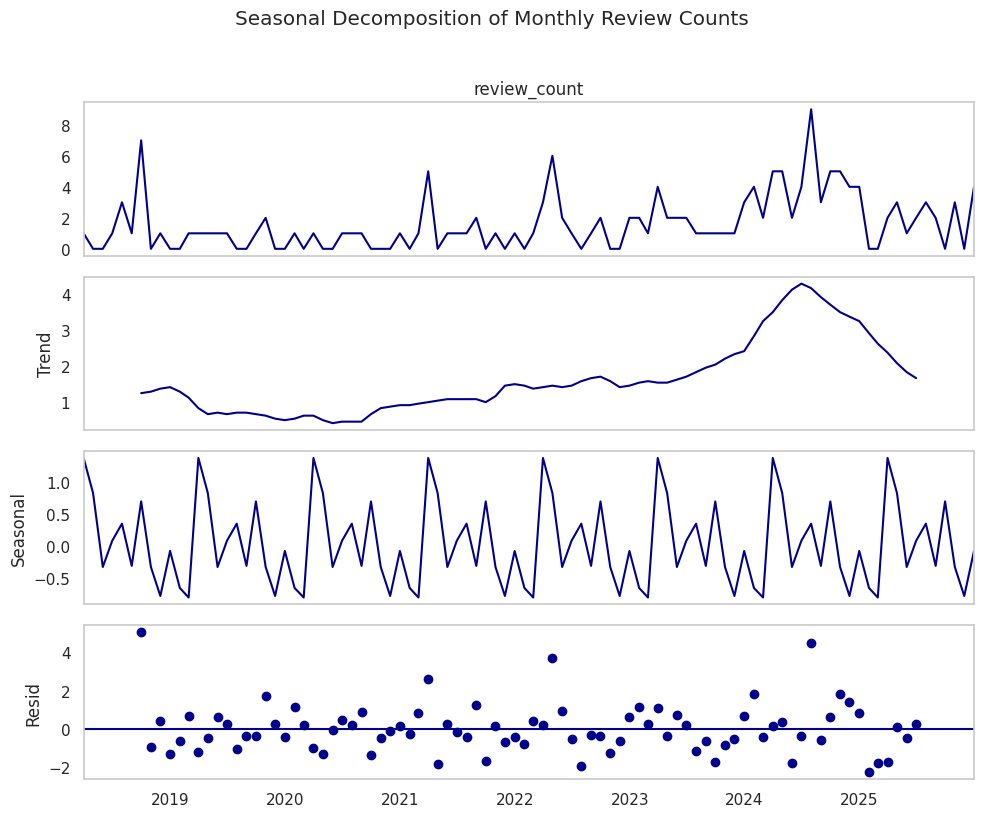

In [244]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Run decomposition
decomp = seasonal_decompose(monthly_counts, model='additive', period=12)

# Plot the components
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.suptitle("Seasonal Decomposition of Monthly Review Counts", y=1.02)

# Make all lines steelblue and remove grid
for ax in fig.axes:
    ax.grid(False)  # Remove grid
    for line in ax.get_lines():
        line.set_color('darkblue')

plt.tight_layout()
plt.show()


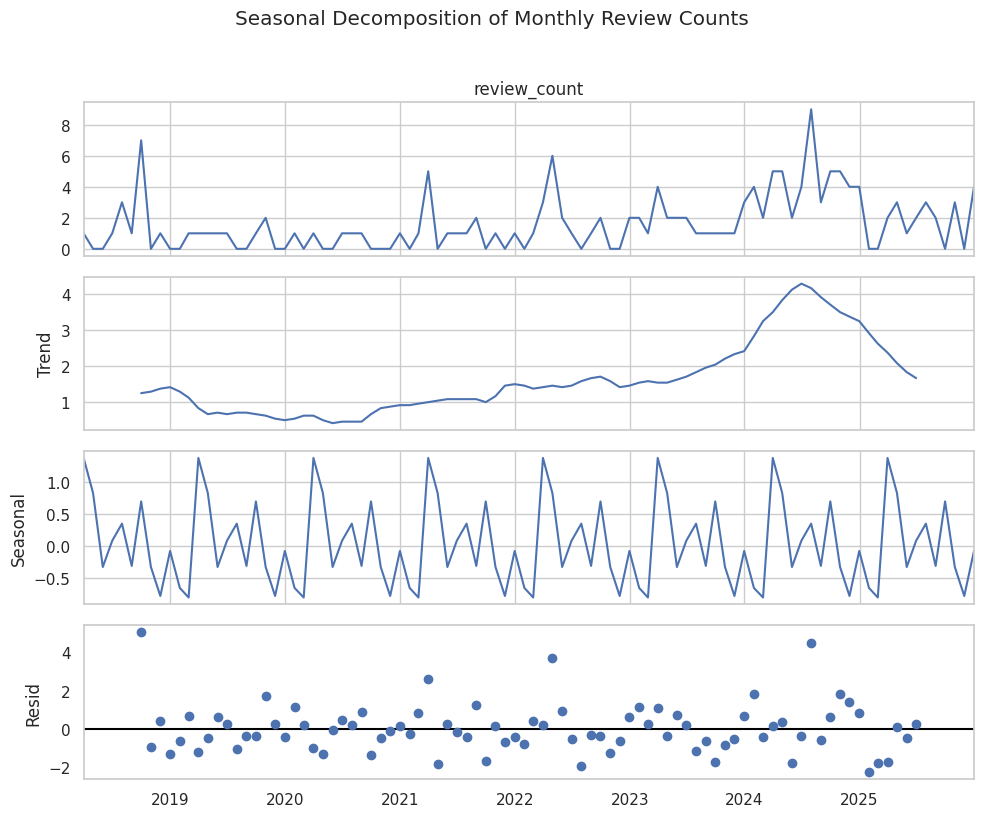

In [245]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Run the decomposition (period=12 for annual seasonality on monthly data)
decomp = seasonal_decompose(monthly_counts, model='additive', period=12)

# Plot the components
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.suptitle("Seasonal Decomposition of Monthly Review Counts", y=1.02)
plt.tight_layout()
plt.grid(False)
plt.show()

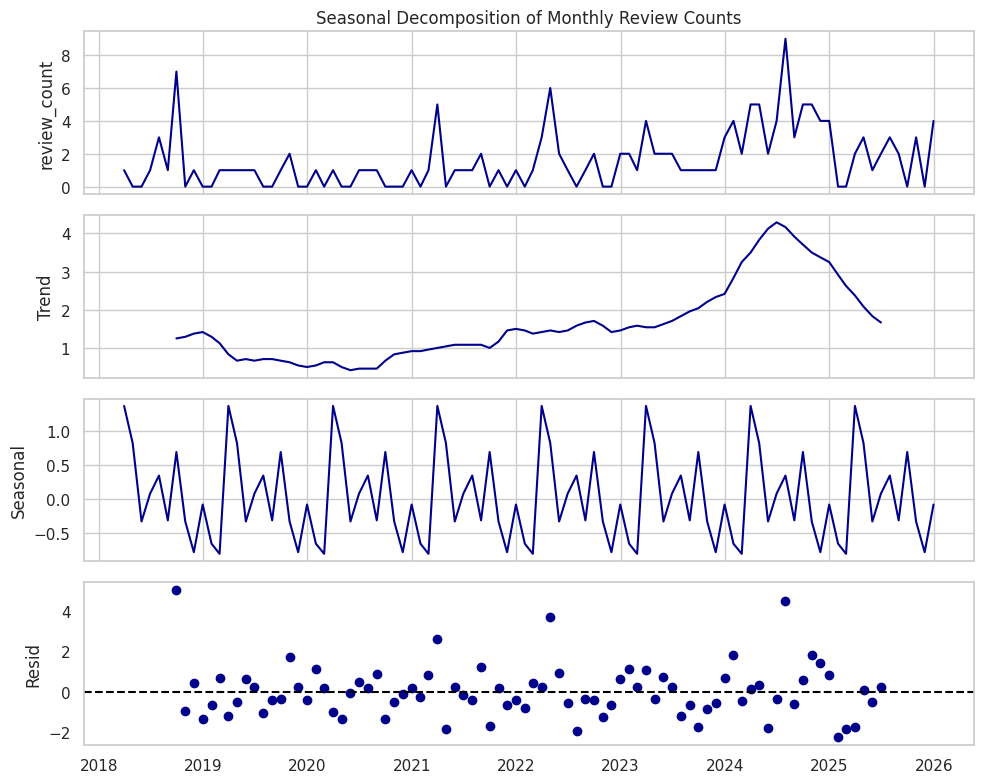

In [246]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Run the decomposition
decomp = seasonal_decompose(monthly_counts, model='additive', period=12)

# Plot each component manually with dark blue color
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Define dark blue color
color = '#00008B'

axes[0].plot(decomp.observed, color=color)
axes[0].set_title('Seasonal Decomposition of Monthly Review Counts')
axes[0].set_ylabel('review_count')

axes[1].plot(decomp.trend, color=color)
axes[1].set_ylabel('Trend')

axes[2].plot(decomp.seasonal, color=color)
axes[2].set_ylabel('Seasonal')

axes[3].scatter(decomp.resid.index, decomp.resid, color=color)
axes[3].axhline(0, linestyle='--', color='black')
axes[3].set_ylabel('Resid')

plt.tight_layout()
plt.grid(False)
plt.show()


# In-Depth Theme Analysis


In this snippet you’re building a single “problem review” flag (`is_problem_review`) by combining several signals that any given review might be showing an issue. Concretely, you:

1. **Gather all “problem” keywords**
   You pull together every word from your themed dictionary (delivery, taste, packaging, etc.) except the `positive_feedback` ones into one flat list `problem_keywords`.

2. **Define individual “issue” signals**

   * `low_vader_flag`: True if the VADER compound sentiment score is below 0.1 (very low sentiment)
   * `neg_label_flag`: True if VADER labeled the review “Negative”
   * `detractor_flag`: True if the reviewer fell into the NPS “Detractor” bucket
   * `explicit_flag`: Any earlier “explicit” problem flags you may have set (e.g. based on star ratings or manual tags)
   * `keyword_flag`: True if the cleaned review text contains **any** of your problem-related keywords

3. **Combine them into one master flag**

   ```python
   df_reviews['is_problem_review'] = (
       low_vader_flag |
       neg_label_flag |
       detractor_flag |
       explicit_flag |
       keyword_flag
   )
   ```

   So if **any** of those conditions is True, `is_problem_review` becomes True.

4. **Quick sanity check**

   * You print the value counts (`True` vs. `False`) to see how many reviews flagged as “problems.”
   * You `.sample(5)` to look at a few examples and confirm that positive-feeling, promotery reviews didn’t accidentally get marked—and that clearly negative or keyword-laden ones did.

---

### Why we do this

By fusing **sentiment**, **NPS category**, and **keyword** cues into one Boolean, you now have a unified filter to:

* **Isolate all “problematic” feedback** in one go
* **Drill into trends** (volume of problem reviews over time)
* **Assign themes** only to the reviews that truly matter for your root-cause analysis

From here you can move on to counts by theme, time-trends of “problem review” volume, or deeper text mining on exactly what went wrong.


** False = Good Reviews





In [247]:
# Recreate the keyword themes
themes = {
    'positive_feedback': [...],  # as before
    'price_value': [...],
    'packaging_issue': [...],
    'taste_issue': [...],
    'product_mismatch': [...],
    'ingredient_concern': [...]
}

# Flatten problem-related keywords
problem_keywords = []
for theme, words in themes.items():
    if theme != 'positive_feedback':
        problem_keywords.extend(words)

# Flags
low_vader_flag = df_reviews['vader_score'] < 0.1
neg_label_flag = df_reviews['vader_sentiment_label'] == 'Negative'
detractor_flag = df_reviews['nps_category'] == 'Detractor'
explicit_flag = df_reviews.get('is_problem', False)

# Keyword match in clean_comment
keyword_flag = pd.Series(False, index=df_reviews.index)
for word in set(problem_keywords):
    keyword_flag |= df_reviews['clean_comment'].str.contains(rf'\b{word}\b', case=False, na=False)

# Final problem flag
df_reviews['is_problem_review'] = (
    low_vader_flag |
    neg_label_flag |
    detractor_flag |
    explicit_flag |
    keyword_flag
)

# Preview counts
print(df_reviews['is_problem_review'].value_counts())
df_reviews[['clean_comment', 'vader_score', 'nps_category', 'vader_sentiment_label', 'is_problem_review']].head(5)

is_problem_review
False    736
True     107
Name: count, dtype: int64


clean_comment  vader_score  \
0  made seed oil rapeseed oil market really need ...       0.7178   
1  swapped normal big brand mayo japanese mayo ta...       0.8442   
2  really like mayonnaise although would like bit...       0.8514   
3  major tangy ixve never fan mayo hand best woul...       0.7193   
4          top stuff ideal special diet taste lovely       0.8934   

  nps_category vader_sentiment_label  is_problem_review  
0     Promoter              Positive              False  
1     Promoter              Positive              False  
2     Promoter              Positive              False  
3     Promoter              Positive              False  
4     Promoter              Positive              False

In [248]:
df_reviews.shape

(843, 15)

In [249]:
import pandas as pd
import re

# STEP 1: Define problem-related themes (excluding positive_feedback)
themes = {
    'price_value': ['price', 'expensive', 'ordered', 'box', 'value', 'waitrose', 'srp', 'cost', 'money', 'cheap', 'deal', '£'],
    'packaging_issue': ['squeeze', 'bottle', 'nozzle', 'kit', 'shrunk', 'jar', 'lid', 'top', 'packaging', 'cap', 'broken', 'seal', 'manufacture'],
    'taste_issue': ['taste', 'tastes', 'crap', 'bland', 'hot', 'sundried', 'pasta', 'chicken', 'bad', 'flavour', 'awful', 'aftertaste', 'sour', 'weird', 'disgusting'],
    'product_mismatch': ['sriracha', 'ketchup', 'wills', 'dr', 'heinz', 'mayo', 'sauce', 'different', 'wrong', 'fake', 'misleading', 'label'],
    'ingredient_concern': ['oil', 'tbsp', 'pan', 'add', 'new', 'vegan', 'tortilla', 'egg', 'sugar', 'preservative', 'salt', 'ingredient', 'stevia'],
    'positive_feedback': []  # Not used in theme detection
}

# STEP 2: Define theme-detection function
def detect_themes(comment):
    matched = []
    if pd.isna(comment):
        return matched
    for theme, words in themes.items():
        for word in words:
            if re.search(rf'\b{re.escape(word)}\b', str(comment), flags=re.IGNORECASE):
                matched.append(theme)
                break  # Stop at first match for a theme
    return matched

# STEP 3: Apply theme detection only to NEUTRAL or NEGATIVE sentiment rows
df_reviews['problem_themes'] = df_reviews.apply(
    lambda row: detect_themes(row['clean_comment'])
    if row['vader_sentiment_label'] in ['Neutral', 'Negative'] else [],
    axis=1
)

# STEP 4: Preview result
df_reviews[['clean_comment', 'vader_score', 'vader_sentiment_label', 'problem_themes','product_group']].head(5)

clean_comment  vader_score  \
0  made seed oil rapeseed oil market really need ...       0.7178   
1  swapped normal big brand mayo japanese mayo ta...       0.8442   
2  really like mayonnaise although would like bit...       0.8514   
3  major tangy ixve never fan mayo hand best woul...       0.7193   
4          top stuff ideal special diet taste lovely       0.8934   

  vader_sentiment_label problem_themes   product_group  
0              Positive             []  Chipotle Ranch  
1              Positive             []    Avocado Mayo  
2              Positive             []    Avocado Mayo  
3              Positive             []    Classic Mayo  
4              Positive             []    Classic Mayo

In [250]:
df_reviews[df_reviews['vader_sentiment_label'].isin(['Negative', 'Neutral'])][['clean_comment', 'vader_sentiment_label','product_group','is_problem_review','problem_themes']].head(5)

clean_comment vader_sentiment_label  \
6   thing stopping star rapeseed oil used instead ...              Negative   
9   always looking healthier tastier option come f...               Neutral   
10  didn‚äôt realise mayo high concentration highl...              Negative   
17  reason doesnxt get star chilli seed get stuck ...               Neutral   
29                     disappointed sticker come gift               Neutral   

         product_group  is_problem_review  \
6         Classic Mayo               True   
9       Tomato Ketchup               True   
10        Classic Mayo               True   
17  Sriracha Hot Sauce               True   
29  Sriracha Hot Sauce               True   

                                       problem_themes  
6                                [ingredient_concern]  
9                     [price_value, product_mismatch]  
10  [packaging_issue, product_mismatch, ingredient...  
17                [packaging_issue, product_mismatch]  
29                                                 []

In [251]:
df_reviews.head()

date  index  rating                             product  \
0 2025-10-05 22:56:00      0       3  Dr. Will's Chipotle Ranch Dressing   
1 2025-10-05 12:15:00      1       5   Dr. Will's Avocado Oil Mayonnaise   
2 2025-10-05 06:57:00      2       5   Dr. Will's Avocado Oil Mayonnaise   
3 2025-07-05 11:37:00      3       5             Dr. Will's Classic Mayo   
4                 NaT      4       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  vader_score vader_sentiment_label sentiment_flag    year  \
0  Chipotle Ranch       0.7178              Positive           None  2025.0   
1    Avocado Mayo       0.8442              Positive           None  2025.0   
2    Avocado Mayo       0.8514              Positive           None  2025.0   
3    Classic Mayo       0.7193              Positive           None  2025.0   
4    Classic Mayo       0.8934              Positive           None     NaN   

  nps_category  is_problem_review problem_themes  
0     Promoter              False             []  
1     Promoter              False             []  
2     Promoter              False             []  
3     Promoter              False             []  
4     Promoter              False             []

## Time Trend of Problem Reviews

Visualize whether the number of problem reviews has increased or decreased over time.
This plot shows how the volume of flagged reviews (those with low VADER score, negative sentiment, detractor NPS, explicit flag, or keyword issues) has changed month by month

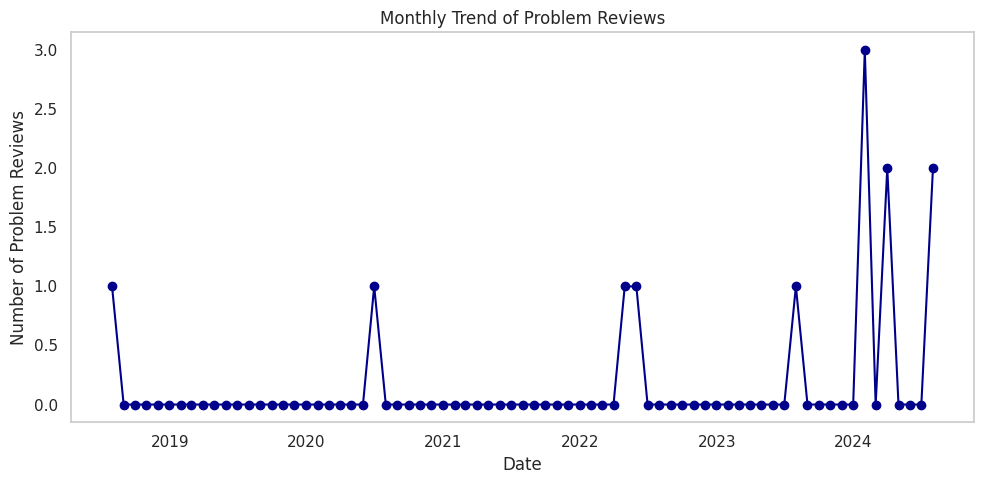

In [252]:


# Create a copy so the original df_reviews is untouched
df_time = df_reviews.copy()

# Parse 'date' into datetime format safely
df_time['date'] = pd.to_datetime(df_time['date'], errors='coerce')

#  Drop rows where date couldn't be parsed (only for plotting)
df_time = df_time[df_time['date'].notna()]

# Set date as index
df_time.set_index('date', inplace=True)

# Filter for problem reviews
df_problems = df_time[df_time['is_problem_review'] == True]

# Resample by month and count
monthly_problem_counts = df_problems.resample('ME').size()

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_problem_counts.index, monthly_problem_counts.values,
         marker='o', linestyle='-', color='darkblue')

plt.title('Monthly Trend of Problem Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Problem Reviews')
plt.grid(False)
plt.tight_layout()
plt.show()



### Trend of Problem Reviews by Theme

This chart — **"Monthly Problem Reviews for Theme: 'ingredient\_concern'"** — is helping you understand the **time-based pattern of complaints** related to a specific issue (in this case, ingredient concerns) in customer reviews.

### What this shows:

* The **x-axis** represents time (monthly, from 2022 to 2024).
* The **y-axis** shows the **number of problem reviews** that mentioned the `'ingredient_concern'` theme.
* Each **dot** is a count of how many reviews in that month were flagged as problems **and** matched one of the ingredient concern keywords (like `"sugar"`, `"oil"`, `"preservative"`, etc.).

---

### 💡 What you can infer from this:

1. **Spikes or Clusters**
   If there’s a spike (e.g. early 2022 or 2024), it suggests that multiple customers in that time period raised concerns about ingredients. This may correlate with:

   * A **recipe change**
   * A **product launch**
   * Media coverage or influencer criticism

2. **Lulls or Gaps**
   Periods with zero reviews may indicate:

   * The issue wasn't present in those months
   * The product wasn’t being reviewed or sold heavily
   * Improvements may have resolved the concern temporarily

3. **Recurring Trends**
   If certain months see regular returns of the theme (e.g. every January), it may hint at **seasonal sensitivity** or stock quality variation.



In [253]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Ensure 'date' is a column in df_reviews (not an index)
if 'date' not in df_reviews.columns:
    df_reviews = df_reviews.reset_index()

# Explode problem themes so each theme is a separate row
exploded = df_reviews[df_reviews['is_problem_review'] == True].explode('problem_themes')

# Prepare dropdown list of unique themes
theme_options = sorted(exploded['problem_themes'].dropna().unique())
theme_dropdown = widgets.Dropdown(
    options=theme_options,
    description='Theme:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Define plotting function
def plot_theme_trend(selected_theme):
    # Filter for selected theme
    theme_df = exploded[exploded['problem_themes'] == selected_theme].copy()

    # Ensure 'date' column is in datetime format
    theme_df['date'] = pd.to_datetime(theme_df['date'], errors='coerce')
    theme_df = theme_df[theme_df['date'].notna()]  # Drop rows with invalid dates
    theme_df = theme_df.set_index('date')          # Set date as index

    # Resample by month
    monthly_counts = theme_df.resample('M').size()

    # Plot the trend
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_counts.index, monthly_counts.values,
             marker='o', linestyle='-', color='darkblue')

    plt.title(f"Monthly Problem Reviews for Theme: '{selected_theme}'", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Count of Problem Reviews")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Display the interactive plot
widgets.interact(plot_theme_trend, selected_theme=theme_dropdown)


interactive(children=(Dropdown(description='Theme:', layout=Layout(width='50%'), options=('ingredient_concern'…

<function __main__.plot_theme_trend(selected_theme)>

In [254]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Explode the list of themes so each theme is on a separate row
exploded = df_reviews[df_reviews['is_problem_review'] == True].explode('problem_themes')

# Get sorted unique theme list for dropdown
theme_options = sorted(exploded['problem_themes'].dropna().unique())
theme_dropdown = widgets.Dropdown(
    options=theme_options,
    description='Theme:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Plotting function
def plot_theme_trend(selected_theme):
    theme_df = exploded[exploded['problem_themes'] == selected_theme].copy()

    # Ensure datetime index
    theme_df['date'] = pd.to_datetime(theme_df['date'], errors='coerce')
    theme_df = theme_df.set_index('date')

    # Resample by month
    monthly_counts = theme_df.resample('M').size()

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='darkblue')
    plt.title(f"Monthly Problem Reviews for Theme: '{selected_theme}'", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Count of Problem Reviews")
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Display interactive plot
widgets.interact(plot_theme_trend, selected_theme=theme_dropdown)

interactive(children=(Dropdown(description='Theme:', layout=Layout(width='50%'), options=('ingredient_concern'…

<function __main__.plot_theme_trend(selected_theme)>

## Top Product Groups with Most Problem Reviews


In [255]:
# Total review count per product group
total_reviews = df_reviews.groupby('product_group').size()

# Problem review count per group
problem_reviews = df_reviews[df_reviews['is_problem_review'] == True] \
                    .groupby('product_group').size()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Total Reviews': total_reviews,
    'Problem Reviews': problem_reviews
})

#  Fill NaN (if any group had 0 problem reviews)
summary['Problem Reviews'] = summary['Problem Reviews'].fillna(0).astype(int)

#  Add non-problem and percentage
summary['Non-Problem Reviews'] = summary['Total Reviews'] - summary['Problem Reviews']
summary['% Problem'] = (summary['Problem Reviews'] / summary['Total Reviews'] * 100).round(1)

# Sort by problem review count
summary = summary.sort_values(by='Problem Reviews', ascending=False)

# Show
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
summary


Total Reviews  Problem Reviews  Non-Problem Reviews  \
product_group                                                             
Avocado Mayo                  102               23                   79   
Tomato Ketchup                124               14                  110   
BBQ Sauce                      86               13                   73   
Jalapeño Hot Sauce            114                9                  105   
Vegan Mayo                     62                8                   54   
Classic Mayo                   89                8                   81   
Sriracha Mayo                  64                6                   58   
Sriracha Hot Sauce             50                6                   44   
Buffalo Hot Sauce              18                1                   17   
Chipotle Ranch                  2                1                    1   
Caesar Dressing                 5                0                    5   

                    % Problem  
product_group                  
Avocado Mayo             22.5  
Tomato Ketchup           11.3  
BBQ Sauce                15.1  
Jalapeño Hot Sauce        7.9  
Vegan Mayo               12.9  
Classic Mayo              9.0  
Sriracha Mayo             9.4  
Sriracha Hot Sauce       12.0  
Buffalo Hot Sauce         5.6  
Chipotle Ranch           50.0  
Caesar Dressing           0.0

/tmp/ipython-input-256-2858321858.py:14: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



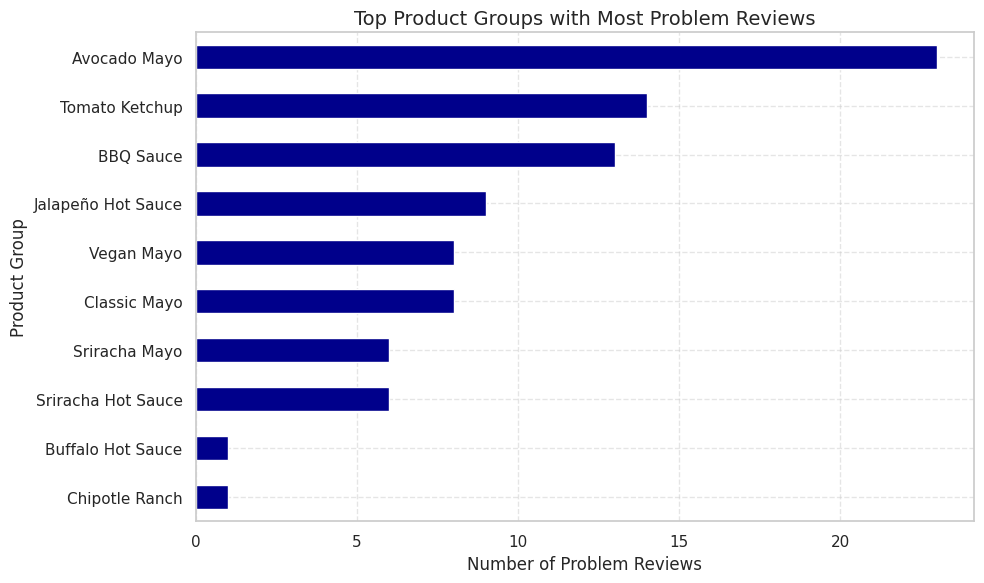

In [256]:
import matplotlib.pyplot as plt

# Group by product_group and count problem reviews
top_problem_groups = df_reviews[df_reviews['is_problem_review'] == True] \
    .groupby('product_group').size().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
top_problem_groups.plot(kind='barh', color='darkblue')
plt.title('Top Product Groups with Most Problem Reviews', fontsize=14)
plt.xlabel('Number of Problem Reviews', fontsize=12)
plt.ylabel('Product Group', fontsize=12)
plt.gca().invert_yaxis()  # highest bar at the top
plt.grid(False, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


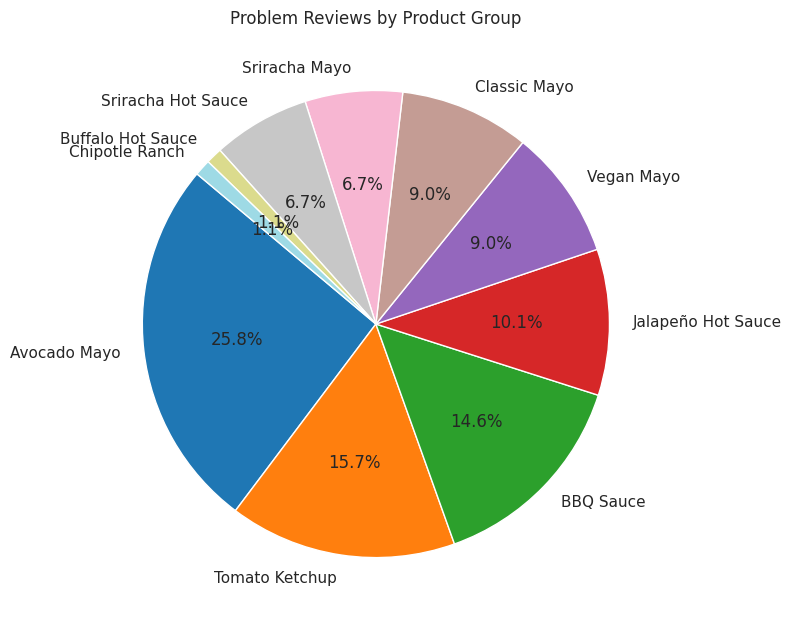

In [257]:
import matplotlib.pyplot as plt

# Group and count problem reviews by product_group
top_problem_groups = df_reviews[df_reviews['is_problem_review'] == True] \
    .groupby('product_group').size().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(8, 8))
top_problem_groups.plot(kind='pie',
                        autopct='%1.1f%%',
                        startangle=140,
                        cmap='tab20',
                        ylabel='',
                        title='Problem Reviews by Product Group')

plt.tight_layout()
plt.show()


In [258]:
df_reviews.shape

(843, 15)

In [259]:
df_reviews.head()

date  index  rating                             product  \
0 2025-10-05 22:56:00      0       3  Dr. Will's Chipotle Ranch Dressing   
1 2025-10-05 12:15:00      1       5   Dr. Will's Avocado Oil Mayonnaise   
2 2025-10-05 06:57:00      2       5   Dr. Will's Avocado Oil Mayonnaise   
3 2025-07-05 11:37:00      3       5             Dr. Will's Classic Mayo   
4                 NaT      4       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  vader_score vader_sentiment_label sentiment_flag    year  \
0  Chipotle Ranch       0.7178              Positive           None  2025.0   
1    Avocado Mayo       0.8442              Positive           None  2025.0   
2    Avocado Mayo       0.8514              Positive           None  2025.0   
3    Classic Mayo       0.7193              Positive           None  2025.0   
4    Classic Mayo       0.8934              Positive           None     NaN   

  nps_category  is_problem_review problem_themes  
0     Promoter              False             []  
1     Promoter              False             []  
2     Promoter              False             []  
3     Promoter              False             []  
4     Promoter              False             []

In [260]:
df_problems.head()

index  rating                              product  \
date                                                                      
2024-07-12 09:05:00     61       5              Dr. Will's Classic Mayo   
2024-03-12 14:57:00     63       1  Dr. Will‚Äôs Squeezy Tomato Ketchup   
2024-03-12 14:57:00     64       1  Dr. Will‚Äôs Squeezy Barbecue Sauce   
2024-07-11 18:33:00     77       1          Dr. Will's Vegan Mayonnaise   
2024-01-07 13:13:00    134       1          Dr. Will's Vegan Mayonnaise   

                                                         clean_comment  \
date                                                                     
2024-07-12 09:05:00                           thick tasty def buying x   
2024-03-12 14:57:00               order never arrived one answer email   
2024-03-12 14:57:00               order never arrived one answer email   
2024-07-11 18:33:00  really disappointing selling point used vegan ...   
2024-01-07 13:13:00  jar arrived broke bubblewrap dr willxs ignores...   

                     yotpo_sentiment source   product_group  vader_score  \
date                                                                       
2024-07-12 09:05:00         0.981378  Yotpo    Classic Mayo       0.0000   
2024-03-12 14:57:00         0.030809  Yotpo  Tomato Ketchup       0.0000   
2024-03-12 14:57:00         0.029295  Yotpo       BBQ Sauce       0.0000   
2024-07-11 18:33:00         0.042299  Yotpo      Vegan Mayo      -0.3384   
2024-01-07 13:13:00         0.002171  Yotpo      Vegan Mayo      -0.8316   

                    vader_sentiment_label sentiment_flag    year nps_category  \
date                                                                            
2024-07-12 09:05:00               Neutral           None  2024.0      Passive   
2024-03-12 14:57:00               Neutral           None  2024.0      Passive   
2024-03-12 14:57:00               Neutral           None  2024.0      Passive   
2024-07-11 18:33:00              Negative           None  2024.0    Detractor   
2024-01-07 13:13:00              Negative           None  2024.0    Detractor   

                     is_problem_review                          problem_themes  
date                                                                            
2024-07-12 09:05:00               True                                      []  
2024-03-12 14:57:00               True                                      []  
2024-03-12 14:57:00               True                                      []  
2024-07-11 18:33:00               True  [product_mismatch, ingredient_concern]  
2024-01-07 13:13:00               True     [packaging_issue, product_mismatch]

### Problem Theme Distribution as Pie Chart


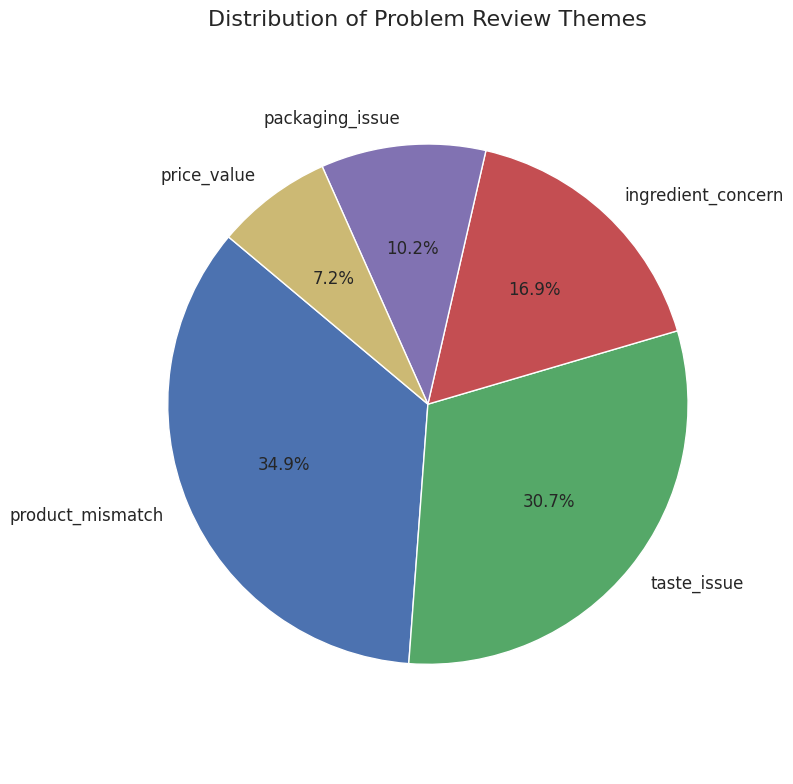

In [261]:
# Prepare data
all_themes = df_reviews[df_reviews['is_problem_review']]['problem_themes'].explode().dropna()
theme_counts = all_themes.value_counts()

# Define a custom color palette (you can adjust to match brand palette if needed)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(theme_counts,
        labels=theme_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12})

plt.title("Distribution of Problem Review Themes", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [262]:
df_reviews.head()

date  index  rating                             product  \
0 2025-10-05 22:56:00      0       3  Dr. Will's Chipotle Ranch Dressing   
1 2025-10-05 12:15:00      1       5   Dr. Will's Avocado Oil Mayonnaise   
2 2025-10-05 06:57:00      2       5   Dr. Will's Avocado Oil Mayonnaise   
3 2025-07-05 11:37:00      3       5             Dr. Will's Classic Mayo   
4                 NaT      4       5             Dr. Will's Classic Mayo   

                                       clean_comment  yotpo_sentiment source  \
0  made seed oil rapeseed oil market really need ...         0.952684  Yotpo   
1  swapped normal big brand mayo japanese mayo ta...         0.710523  Yotpo   
2  really like mayonnaise although would like bit...         0.461072  Yotpo   
3  major tangy ixve never fan mayo hand best woul...         0.428422  Yotpo   
4          top stuff ideal special diet taste lovely         0.985937  Yotpo   

    product_group  vader_score vader_sentiment_label sentiment_flag    year  \
0  Chipotle Ranch       0.7178              Positive           None  2025.0   
1    Avocado Mayo       0.8442              Positive           None  2025.0   
2    Avocado Mayo       0.8514              Positive           None  2025.0   
3    Classic Mayo       0.7193              Positive           None  2025.0   
4    Classic Mayo       0.8934              Positive           None     NaN   

  nps_category  is_problem_review problem_themes  
0     Promoter              False             []  
1     Promoter              False             []  
2     Promoter              False             []  
3     Promoter              False             []  
4     Promoter              False             []

### Monthly Trend of Problem Theme (3 months rolling avergae)

In [263]:
df_reviews = df_reviews.reset_index()

/tmp/ipython-input-264-3702790059.py:26: UserWarning:

First parameter to grid() is false, but line properties are supplied. The grid will be enabled.



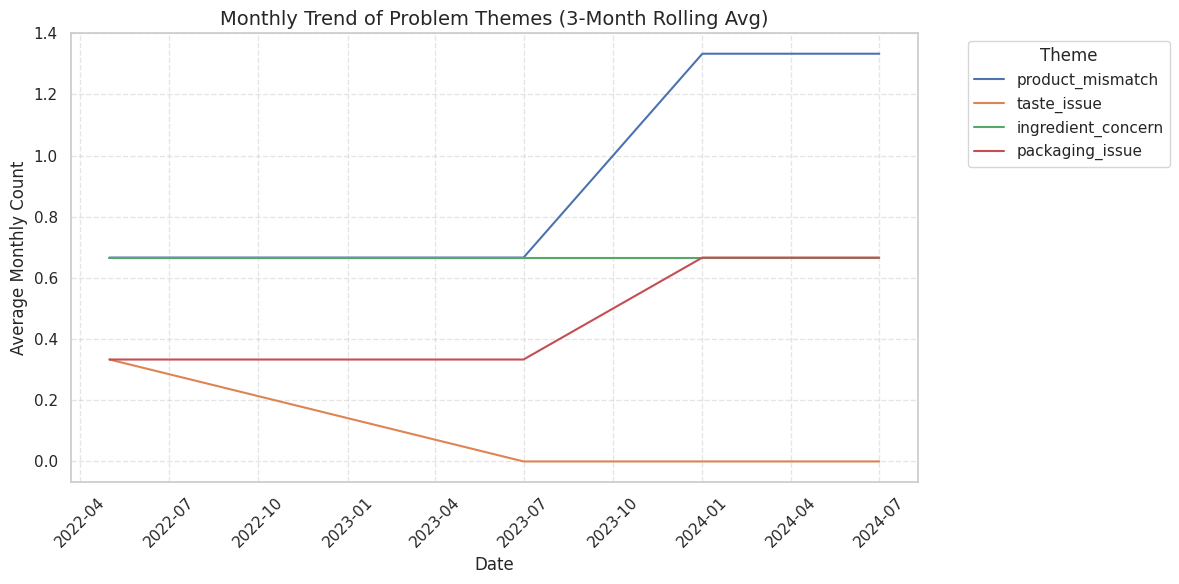

In [264]:
import matplotlib.pyplot as plt

# Explode themes for multi-theme rows
exploded = df_reviews[df_reviews['is_problem_review'] == True].explode('problem_themes')
exploded = exploded.dropna(subset=['problem_themes'])

# Convert 'date' to monthly period for grouping
exploded['month'] = exploded['date'].dt.to_period('M').dt.to_timestamp()

# Count theme occurrences per month
monthly_theme_counts = exploded.groupby(['month', 'problem_themes']).size().unstack(fill_value=0)

# Optional - Apply 3-month rolling average
rolling_theme_counts = monthly_theme_counts.rolling(window=3).mean()

# Plot
plt.figure(figsize=(12, 6))
for theme in rolling_theme_counts.columns:
    plt.plot(rolling_theme_counts.index, rolling_theme_counts[theme], label=theme)

plt.title("Monthly Trend of Problem Themes (3-Month Rolling Avg)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Monthly Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [265]:
df_reviews.head()
df_reviews.shape

(843, 16)

In [266]:
df_reviews[df_reviews['is_problem_review']].groupby('product_group').size()


product_group
Avocado Mayo          23
BBQ Sauce             13
Buffalo Hot Sauce      1
Chipotle Ranch         1
Classic Mayo           8
Jalapeño Hot Sauce     9
Sriracha Hot Sauce     6
Sriracha Mayo          6
Tomato Ketchup        14
Vegan Mayo             8
dtype: int64

In [267]:
# See how many problem reviews exist for Avocado Oil Mayo now
df_reviews[
    (df_reviews['product'] == "Dr. Will's Avocado Oil Mayonnaise") &
    (df_reviews['is_problem_review'] == True)
][['clean_comment', 'is_problem_review', 'problem_themes']]


clean_comment  is_problem_review  \
88                                      tasty luv mayo               True   
89            favourite mayo won‚äôt buy anything else               True   
110                                              tasty               True   
246  absolute gem jar many us favourite though putt...               True   
263  packaging sunflower oil listed listed website ...               True   
320  never fan mayonnaise tried dr willxs plan meal...               True   
779  hunter gather dr will always toss two given sh...               True   
797  healthier alternative healthier alternative re...               True   
799                           gross smell taste rancid               True   
801  disgusting bought alternative usual sale lid d...               True   
803  worst purchase ever dr stick day job mayonnais...               True   
804  disgusting nothing like mayo watery somehow ma...               True   
805  horrible taste far strong useless anything wou...               True   
806  vile waste money worst thing ever tasted even ...               True   
807                    rancid like idea gone well date               True   
808  curdled opening opened bbe separated curdled c...               True   
809  bin neither mayo loving year old could eat tas...               True   
810  disappointment really excited try im big mayo ...               True   
813                            tasteless taste nothing               True   
822  didn’t taste good oil used unpleasant taste ta...               True   
823  good expected hunter gsther mayo decided try d...               True   
824  found mayo completely inedible sure bad batch ...               True   
839  bland thin watery subtle creamy taste generall...               True   

                                        problem_themes  
88                                  [product_mismatch]  
89                                  [product_mismatch]  
110                                                 []  
246                                  [packaging_issue]  
263              [packaging_issue, ingredient_concern]  
320                                 [product_mismatch]  
779             [product_mismatch, ingredient_concern]  
797                    [taste_issue, product_mismatch]  
799                                      [taste_issue]  
801  [packaging_issue, taste_issue, product_mismatc...  
803                    [taste_issue, product_mismatch]  
804                    [taste_issue, product_mismatch]  
805                                      [taste_issue]  
806                                      [price_value]  
807                                                 []  
808                    [price_value, product_mismatch]  
809                                 [product_mismatch]  
810                    [price_value, product_mismatch]  
813                                      [taste_issue]  
822                  [taste_issue, ingredient_concern]  
823                    [taste_issue, product_mismatch]  
824                    [taste_issue, product_mismatch]  
839                                      [taste_issue]

In [268]:
df_reviews[df_reviews['product'] == "Dr. Will's Avocado Oil Mayonnaise"].shape[0]


102

In [269]:
df_reviews[
    (df_reviews['product'] == "Dr. Will's Avocado Oil Mayonnaise")
]['is_problem_review'].value_counts()


is_problem_review
False    79
True     23
Name: count, dtype: int64

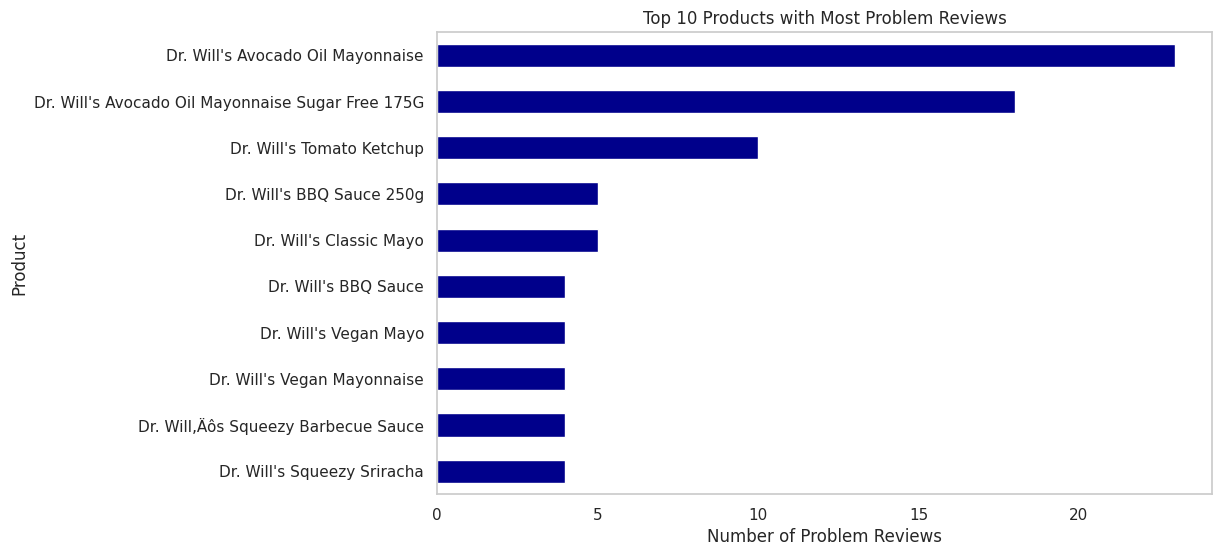

In [270]:
top_problems = df_reviews[df_reviews['is_problem_review']].groupby('product').size().sort_values(ascending=False).head(10)

top_problems.plot(kind='barh', figsize=(10, 6), color='darkblue')
plt.title('Top 10 Products with Most Problem Reviews')
plt.xlabel('Number of Problem Reviews')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()

In [271]:
df_reviews.groupby('product')['vader_score'].mean().sort_values().head(10)

product
Dr. Will's Chipotle Ranch Dressing 250g   -0.275500
Dr. Will's Avocado Oil Mayonnaise          0.517402
Dr. Will's Sriracha Hot Sauce 275g         0.531486
Dr. Will's Sriracha Mayonnaise             0.548205
Dr. Will's Jalape√±o Hot Sauce             0.556225
Dr. Will's Jalapeno Hot Sauce              0.563145
Dr. Will‚Äôs Squeezy Barbecue Sauce        0.570824
Dr. Will's Squeezy Sriracha                0.591530
Dr. Will's BBQ Sauce 250g                  0.600888
Dr. Will's Tomato Ketchup                  0.619994
Name: vader_score, dtype: float64

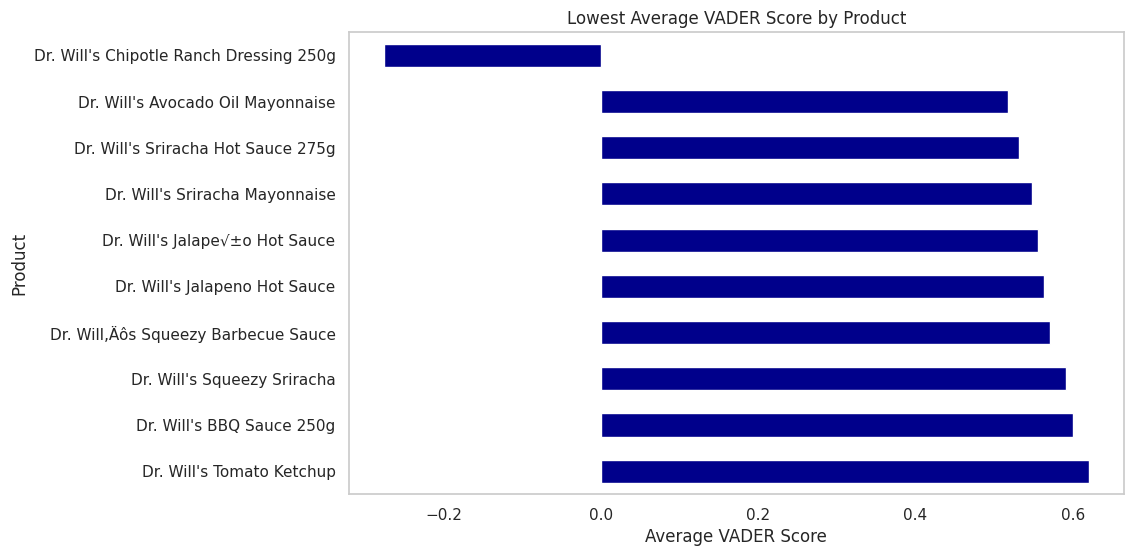

In [272]:
vader_avg = df_reviews.groupby('product')['vader_score'].mean().sort_values().head(10)

vader_avg.plot(kind='barh', figsize=(10, 6), color='darkblue')
plt.title('Lowest Average VADER Score by Product')
plt.xlabel('Average VADER Score')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.grid(False)
plt.show()


In [273]:
theme_product_df = df_reviews[df_reviews['is_problem_review']].explode('problem_themes')
theme_counts = theme_product_df.groupby(['product', 'problem_themes']).size().unstack(fill_value=0)
theme_counts = theme_counts.loc[theme_counts.sum(axis=1).sort_values(ascending=False).index]  # sort by total issues
theme_counts.head(10)

problem_themes                                     ingredient_concern  \
product                                                                 
Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G                  10   
Dr. Will's Avocado Oil Mayonnaise                                   4   
Dr. Will's Tomato Ketchup                                           3   
Dr. Will's BBQ Sauce 250g                                           0   
Dr. Will's Vegan Mayo                                               3   
Dr. Will's Classic Mayo                                             2   
Dr. Will's Vegan Mayonnaise                                         3   
Dr. Will's BBQ Sauce                                                1   
Dr. Will's Jalapeno Hot Sauce 270g                                  1   
Dr. Will's Jalape√±o Hot Sauce                                      0   

problem_themes                                     packaging_issue  \
product                                                              
Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G                1   
Dr. Will's Avocado Oil Mayonnaise                                3   
Dr. Will's Tomato Ketchup                                        0   
Dr. Will's BBQ Sauce 250g                                        1   
Dr. Will's Vegan Mayo                                            2   
Dr. Will's Classic Mayo                                          2   
Dr. Will's Vegan Mayonnaise                                      1   
Dr. Will's BBQ Sauce                                             1   
Dr. Will's Jalapeno Hot Sauce 270g                               1   
Dr. Will's Jalape√±o Hot Sauce                                   0   

problem_themes                                     price_value  \
product                                                          
Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G            4   
Dr. Will's Avocado Oil Mayonnaise                            3   
Dr. Will's Tomato Ketchup                                    2   
Dr. Will's BBQ Sauce 250g                                    1   
Dr. Will's Vegan Mayo                                        1   
Dr. Will's Classic Mayo                                      1   
Dr. Will's Vegan Mayonnaise                                  0   
Dr. Will's BBQ Sauce                                         0   
Dr. Will's Jalapeno Hot Sauce 270g                           0   
Dr. Will's Jalape√±o Hot Sauce                               0   

problem_themes                                     product_mismatch  \
product                                                               
Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G                 7   
Dr. Will's Avocado Oil Mayonnaise                                13   
Dr. Will's Tomato Ketchup                                         8   
Dr. Will's BBQ Sauce 250g                                         4   
Dr. Will's Vegan Mayo                                             1   
Dr. Will's Classic Mayo                                           3   
Dr. Will's Vegan Mayonnaise                                       4   
Dr. Will's BBQ Sauce                                              3   
Dr. Will's Jalapeno Hot Sauce 270g                                2   
Dr. Will's Jalape√±o Hot Sauce                                    3   

problem_themes                                     taste_issue  
product                                                         
Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G           14  
Dr. Will's Avocado Oil Mayonnaise                           11  
Dr. Will's Tomato Ketchup                                    3  
Dr. Will's BBQ Sauce 250g                                    5  
Dr. Will's Vegan Mayo                                        3  
Dr. Will's Classic Mayo                                      1  
Dr. Will's Vegan Mayonnaise                                  0  
Dr. Will's BBQ Sauce                               

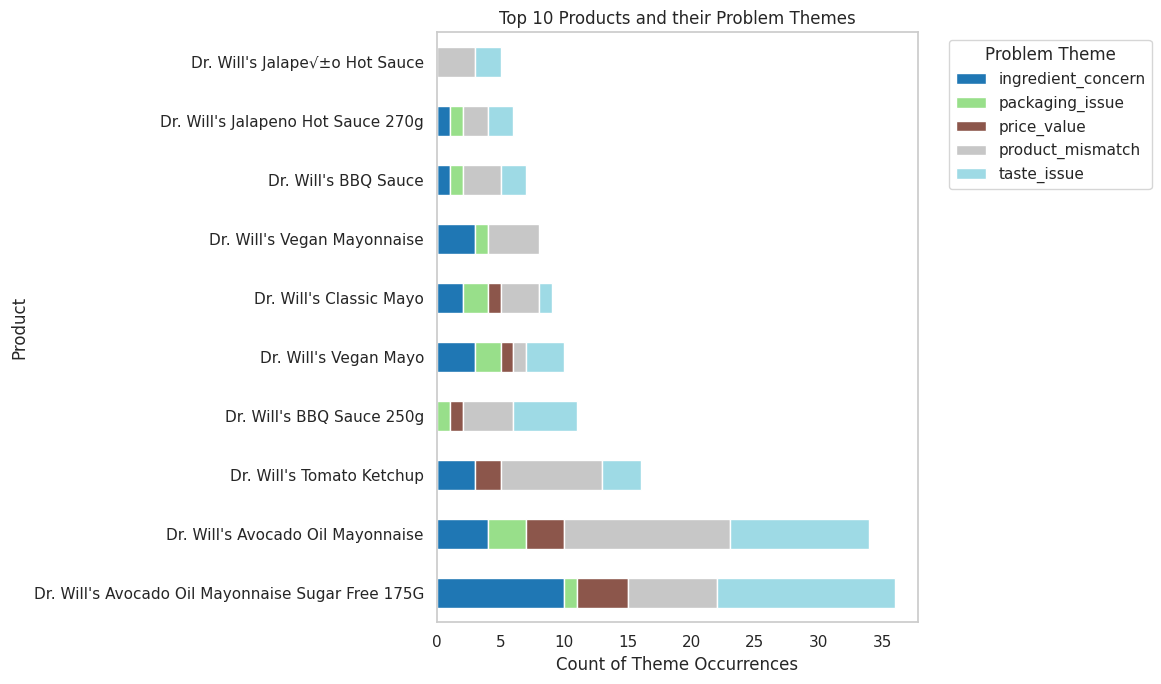

In [274]:
theme_counts.head(10).plot(
    kind='barh',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20'
)
plt.title('Top 10 Products and their Problem Themes')
plt.xlabel('Count of Theme Occurrences')
plt.ylabel('Product')
plt.legend(title='Problem Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(False)
plt.show()

In [275]:
theme_product_df.groupby('problem_themes')['vader_score'].mean().sort_values().head(10)

problem_themes
price_value          -0.585275
taste_issue          -0.364243
packaging_issue      -0.340218
ingredient_concern   -0.329100
product_mismatch     -0.286197
Name: vader_score, dtype: float64

In [276]:
df_reviews[df_reviews['is_problem_review']].groupby('product').size().sort_values(ascending=False).head(10)

product
Dr. Will's Avocado Oil Mayonnaise                    23
Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G    18
Dr. Will's Tomato Ketchup                            10
Dr. Will's BBQ Sauce 250g                             5
Dr. Will's Classic Mayo                               5
Dr. Will's BBQ Sauce                                  4
Dr. Will's Vegan Mayo                                 4
Dr. Will's Vegan Mayonnaise                           4
Dr. Will‚Äôs Squeezy Barbecue Sauce                   4
Dr. Will's Squeezy Sriracha                           4
dtype: int64

In [277]:
df_reviews.groupby('product')['vader_score'].mean().sort_values().head(10)

product
Dr. Will's Chipotle Ranch Dressing 250g   -0.275500
Dr. Will's Avocado Oil Mayonnaise          0.517402
Dr. Will's Sriracha Hot Sauce 275g         0.531486
Dr. Will's Sriracha Mayonnaise             0.548205
Dr. Will's Jalape√±o Hot Sauce             0.556225
Dr. Will's Jalapeno Hot Sauce              0.563145
Dr. Will‚Äôs Squeezy Barbecue Sauce        0.570824
Dr. Will's Squeezy Sriracha                0.591530
Dr. Will's BBQ Sauce 250g                  0.600888
Dr. Will's Tomato Ketchup                  0.619994
Name: vader_score, dtype: float64

### Identify Most Problematic Products

In [278]:
product_issues = df_reviews[df_reviews['is_problem_review']].groupby('product').agg(
    num_problem_reviews=('is_problem_review', 'size'),
    avg_vader_score=('vader_score', 'mean')
).sort_values(by='num_problem_reviews', ascending=False).reset_index()

product_issues.head(10)

product  num_problem_reviews  \
0                  Dr. Will's Avocado Oil Mayonnaise                   23   
1  Dr. Will's Avocado Oil Mayonnaise Sugar Free 175G                   18   
2                          Dr. Will's Tomato Ketchup                   10   
3                          Dr. Will's BBQ Sauce 250g                    5   
4                            Dr. Will's Classic Mayo                    5   
5                               Dr. Will's BBQ Sauce                    4   
6                              Dr. Will's Vegan Mayo                    4   
7                        Dr. Will's Vegan Mayonnaise                    4   
8                Dr. Will‚Äôs Squeezy Barbecue Sauce                    4   
9                        Dr. Will's Squeezy Sriracha                    4   

   avg_vader_score  
0        -0.360378  
1        -0.412044  
2        -0.273810  
3        -0.285840  
4        -0.206080  
5        -0.094025  
6        -0.146075  
7        -0.285650  
8        -0.292800  
9        -0.032200

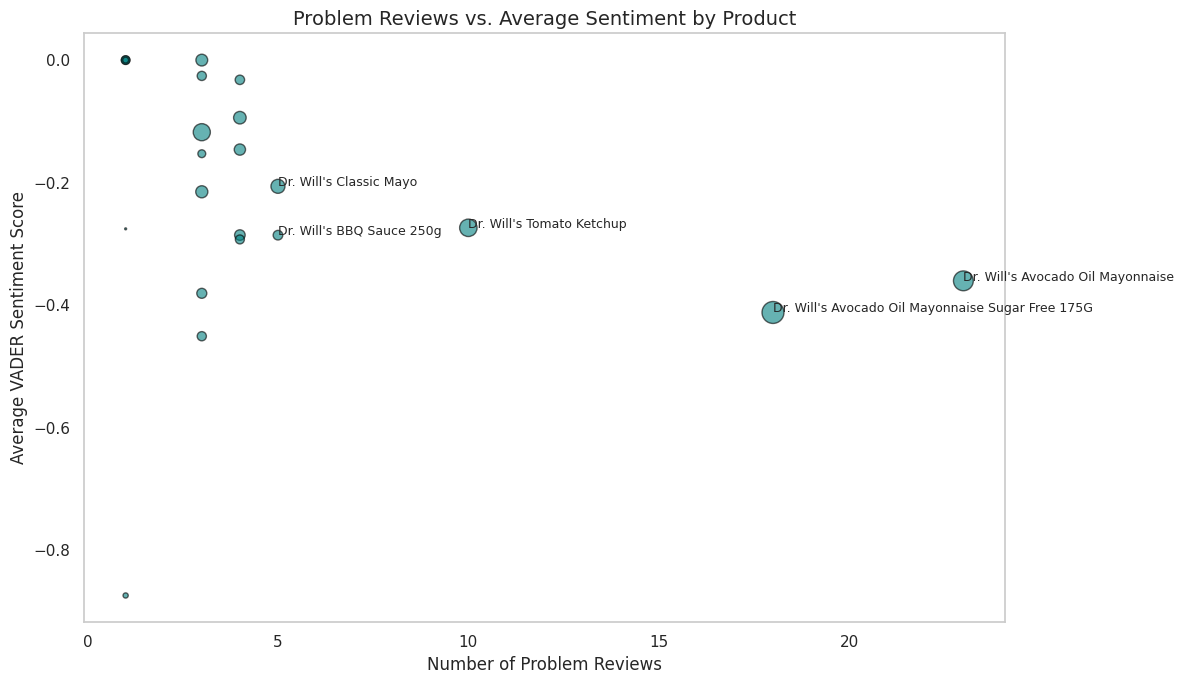

In [279]:
import matplotlib.pyplot as plt

# Create product-level summary
product_issues = df_reviews[df_reviews['is_problem_review']].groupby('product').agg(
    num_problem_reviews=('is_problem_review', 'size'),
    avg_vader_score=('vader_score', 'mean')
)

# Total review counts per product
total_reviews = df_reviews.groupby('product').size().rename('total_reviews')

# Merge for size encoding
product_issues = product_issues.merge(total_reviews, left_index=True, right_index=True).reset_index()

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(
    product_issues['num_problem_reviews'],
    product_issues['avg_vader_score'],
    s=product_issues['total_reviews'] * 2,
    alpha=0.6,
    color='teal',
    edgecolors='black'
)

plt.title("Problem Reviews vs. Average Sentiment by Product", fontsize=14)
plt.xlabel("Number of Problem Reviews", fontsize=12)
plt.ylabel("Average VADER Sentiment Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate top 5 products
for _, row in product_issues.sort_values('num_problem_reviews', ascending=False).head(5).iterrows():
    plt.annotate(row['product'], (row['num_problem_reviews'], row['avg_vader_score']), fontsize=9)

plt.tight_layout()
plt.grid(False)
plt.show()

### Map Common Themes to Specific Products

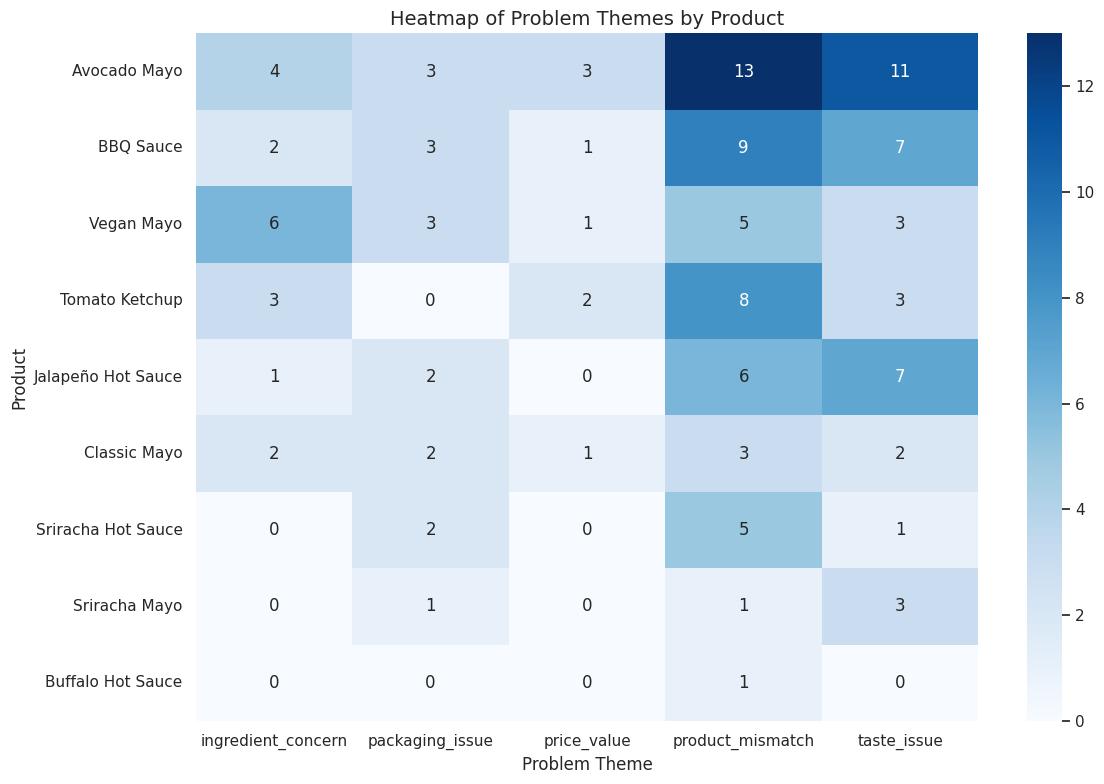

In [280]:
# Explode themes so each row has a single theme
theme_product_df = df_reviews[df_reviews['is_problem_review']].explode('problem_themes')

# Group by product and theme to count occurrences
theme_counts = theme_product_df.groupby(['product_group', 'problem_themes']).size().unstack(fill_value=0)

# Sort rows by total issues (optional)
theme_counts = theme_counts.loc[theme_counts.sum(axis=1).sort_values(ascending=False).index]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(theme_counts, annot=True, fmt='d', cmap='Blues')

plt.title("Heatmap of Problem Themes by Product", fontsize=14)
plt.xlabel("Problem Theme")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [281]:
from ipywidgets import interact, widgets

# Google Trends

To identify what sauces and health-related food terms consumers in the UK have been actively searching for (Jan 2021 – July 2025) to guide Dr. Will’s product development, brand direction, and marketing strategy.



In [282]:
!pip install pytrends

In [283]:
from pytrends.request import TrendReq
import pandas as pd

# Set up pytrends
pytrends = TrendReq(hl='en-UK', tz=360)

# Define all keywords
all_keywords = [
    "vegan mayo", "ketchup", "BBQ sauce", "healthy sauce",
    "natural condiments", "sugar free ketchup", "low calorie sauce", "healthy ketchup",
    "vegan sauce", "organic condiments", "sriracha", "hot sauce",
    "mayo alternatives", "plant based sauce", "no added sugar sauces"
]

# Function to split list into chunks of 4 (max allowed = 5 incl. date)
def chunk_keywords(lst, chunk_size=4):
    for i in range(0, len(lst), chunk_size):
        yield lst[i:i + chunk_size]

# Create a combined dataframe to store all results
combined_df = pd.DataFrame()

# Loop through chunks
for chunk in chunk_keywords(all_keywords):
    pytrends.build_payload(chunk, cat=0, timeframe='2021-01-01 2025-07-01', geo='GB')
    df_chunk = pytrends.interest_over_time()
    if 'isPartial' in df_chunk.columns:
        df_chunk = df_chunk.drop(columns=['isPartial'])

    # Merge with combined_df
    if combined_df.empty:
        combined_df = df_chunk
    else:
        combined_df = combined_df.merge(df_chunk, left_index=True, right_index=True, how='outer')

# Reset index
combined_df.reset_index(inplace=True)
combined_df.head()


date  vegan mayo  ketchup  BBQ sauce  healthy sauce  \
0 2020-12-27           6       22         17              6   
1 2021-01-03           8       25         19             11   
2 2021-01-10          10       25         21              9   
3 2021-01-17           5       25         20              9   
4 2021-01-24           3       26         21              8   

   natural condiments  sugar free ketchup  low calorie sauce  healthy ketchup  \
0                   0                   0                 39                0   
1                   0                   0                100                0   
2                   0                   0                 91               18   
3                   0                   0                 89                0   
4                   0                   0                100                0   

   vegan sauce  organic condiments  sriracha  hot sauce  mayo alternatives  \
0           29                   0        29         43                  0   
1           35                   0        35         44                  0   
2           31                   0        41         48                  0   
3           34                   0        38         56                  0   
4           33                   0        38         57                  0   

   plant based sauce  no added sugar sauces  
0                  0                      0  
1                  0                      0  
2                  0                      0  
3                  0                      0  
4                  0                      0

In [284]:
print("Start date:", combined_df['date'].min())
print("End date:", combined_df['date'].max())


Start date: 2020-12-27 00:00:00
End date: 2025-06-29 00:00:00


## What are people searching in health condiments?

1. Rising Spikes (e.g., late 2021, late 2024)
These could indicate seasonal interest or emerging consumer trends.

Example: The spike in early 2022 might correlate with New Year health resolutions.

2. Recent Uptick (2024–2025)
You see a visible rise in interest in early 2025.

Dr. Will’s should take note of this to amplify health-related product messaging now (e.g., low-calorie mayo, sugar-free ketchup).

3. Overall Fluctuation but Gradual Stability
While volatile, the baseline interest seems to have stabilised around 5–10 points post-2023.

This suggests consistent baseline demand for health-forward products, even if peaks are seasonal.

In [285]:
combined_df['interest_HealthCondiments'] = combined_df[[
    'healthy sauce',
    'low calorie sauce',
    'no added sugar sauces',
    'natural condiments',
    'organic condiments',
    'plant based sauce',
    'vegan sauce',
    'sugar free ketchup',
    'vegan mayo'
]].mean(axis=1)

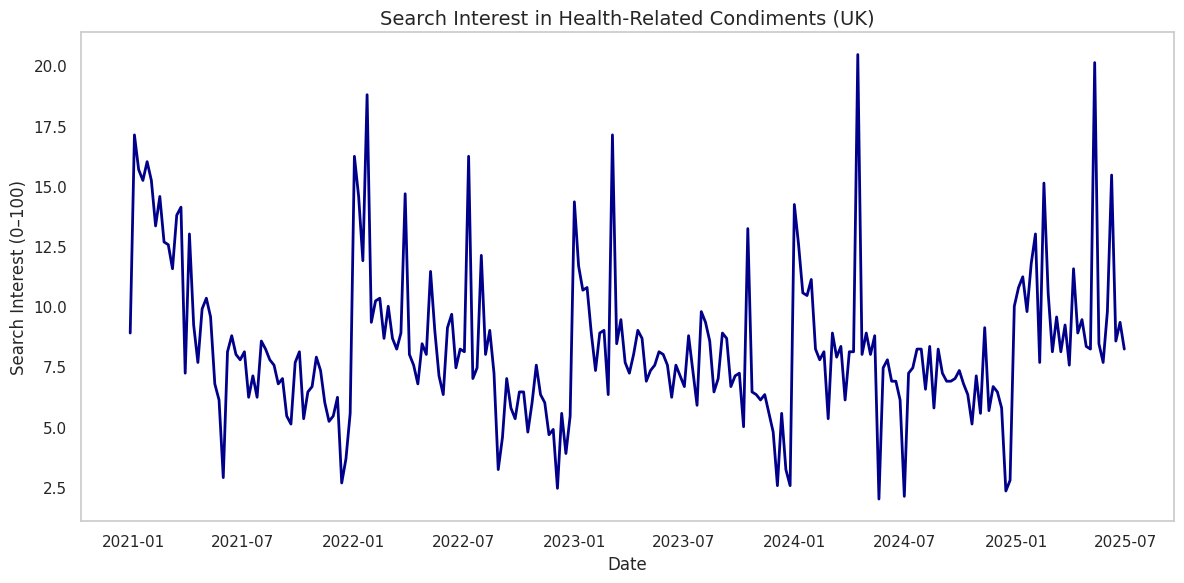

In [286]:
import matplotlib.pyplot as plt

# Plot the health-related condiment search interest over time
plt.figure(figsize=(12,6))
plt.plot(combined_df['date'], combined_df['interest_HealthCondiments'], color='darkblue', linewidth=2)

# Labels and title
plt.title('Search Interest in Health-Related Condiments (UK)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Interest (0–100)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


| Area           | Actionable Recommendation                                                                    |
| -------------- | -------------------------------------------------------------------------------------------- |
| **Product**    | Launch limited editions during peaks (e.g., early-year or summer BBQ season).                |
| **Marketing**  | Push SEO/blogs/social content around "healthy sauces" during rising trend periods.           |
| **Brand**      | Position as a **functional health-forward condiment brand**, not just “flavour-first.”       |
| **Innovation** | Explore unmet needs in “plant-based” or “organic condiments” — rising but not oversaturated. |


In [287]:
health_terms = [
    'healthy sauce', 'low calorie sauce', 'no added sugar sauces',
    'natural condiments', 'organic condiments', 'plant based sauce',
    'vegan sauce', 'sugar free ketchup', 'vegan mayo'
]

combined_df[health_terms].mean().sort_values(ascending=False)


low calorie sauce        47.165254
vegan sauce              18.182203
healthy sauce             4.686441
vegan mayo                2.241525
no added sugar sauces     1.432203
plant based sauce         1.161017
sugar free ketchup        0.245763
organic condiments        0.000000
natural condiments        0.000000
dtype: float64

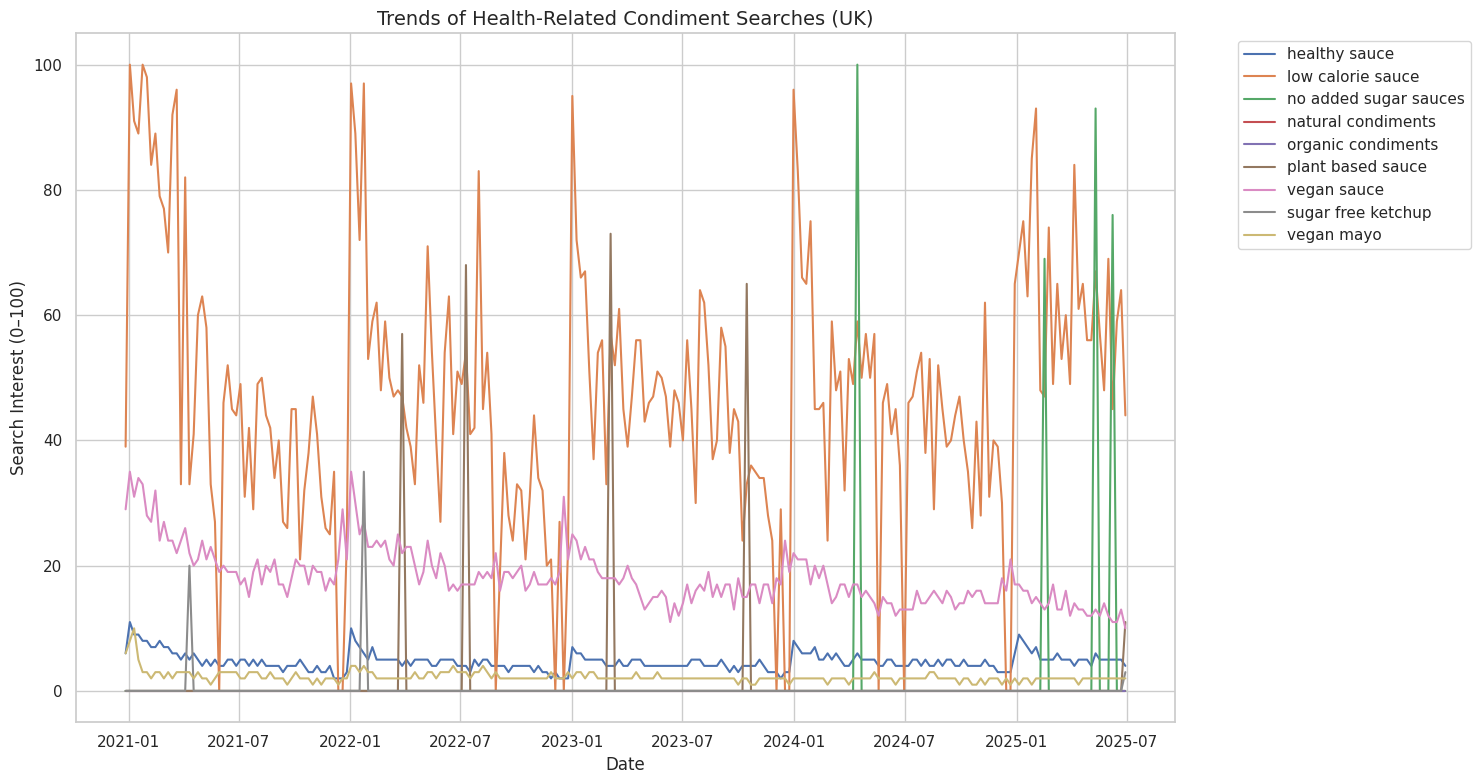

In [288]:
plt.figure(figsize=(15,8))

for term in health_terms:
    plt.plot(combined_df['date'], combined_df[term], label=term)

plt.title('Trends of Health-Related Condiment Searches (UK)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Search Interest (0–100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Low Calorie Sauce (orange): Steady, frequent peaks, and consistent visibility — clear consumer interest.

Vegan and Healthy Sauce: Mild but steady; some occasional spikes.

Organic, Plant-Based, Sugar-Free, No-Added-Sugar: Low base interest but emerging patterns in 2024–25.



We compared how much UK consumers searched for health-focused condiments over the past four years. Low calorie sauces consistently dominate, showing strong market potential. Meanwhile, terms like vegan mayo and organic condiments attract less search interest, which may indicate lower awareness or a need for better positioning

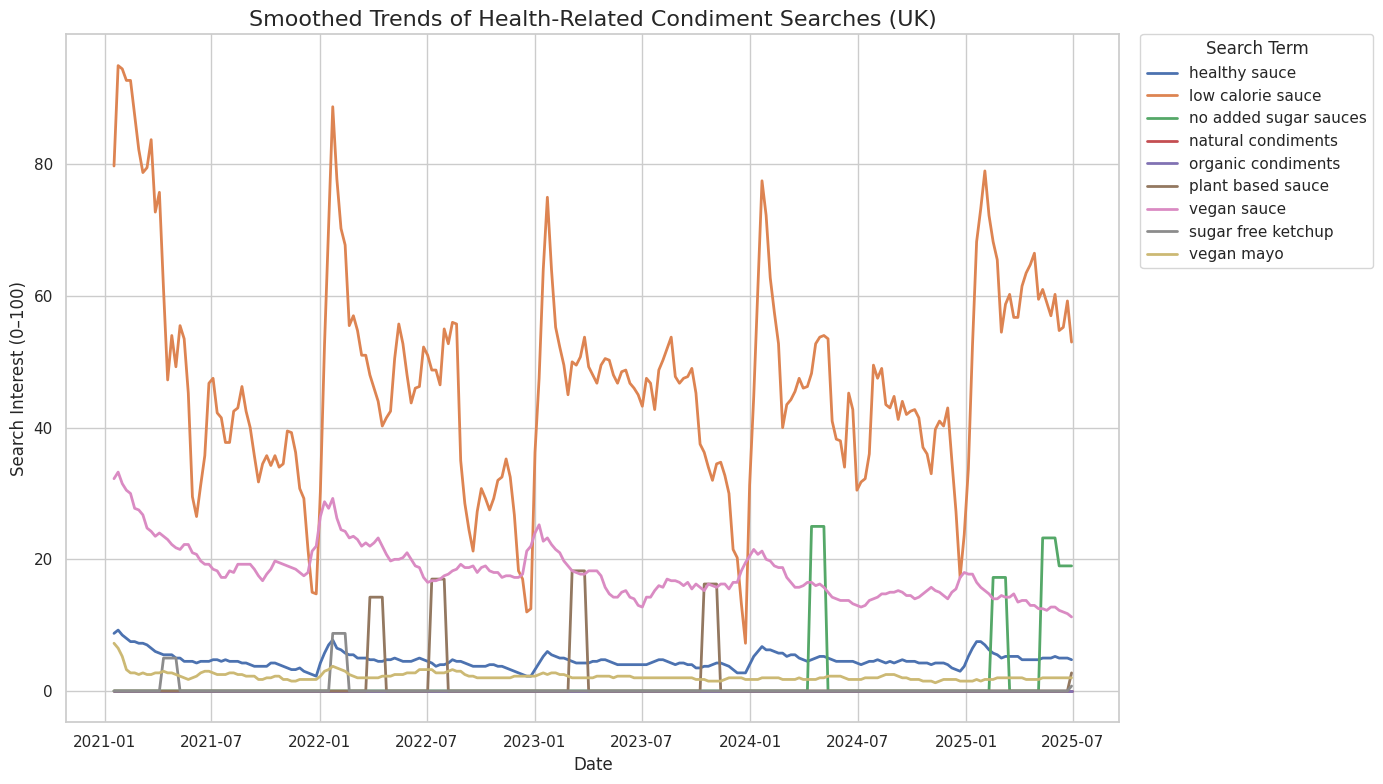

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: smooth data with 4-week rolling average
df_smooth = combined_df.copy()
df_smooth[health_terms] = df_smooth[health_terms].rolling(4).mean()

# Set style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(14,8))
for term in health_terms:
    plt.plot(df_smooth['date'], df_smooth[term], label=term, linewidth=2)

plt.title('Smoothed Trends of Health-Related Condiment Searches (UK)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Interest (0–100)', fontsize=12)
plt.legend(title='Search Term', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


In [290]:
# Make a copy and smooth with a 4-week rolling average
df_smooth = combined_df.copy()
df_smooth[health_terms] = df_smooth[health_terms].rolling(window=4).mean()


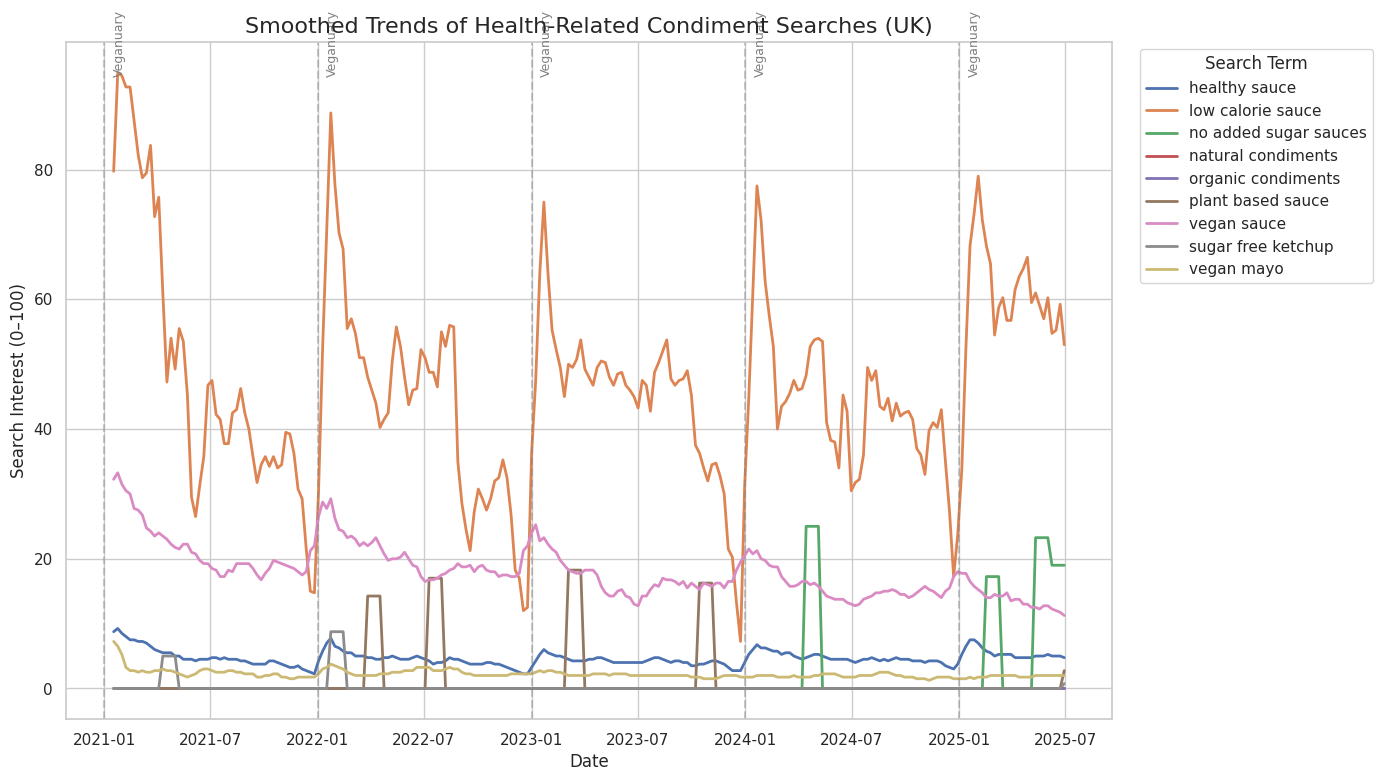

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Start plot
plt.figure(figsize=(14,8))

# Plot smoothed lines
for term in health_terms:
    plt.plot(df_smooth['date'], df_smooth[term], label=term, linewidth=2)

# Add vertical lines for January each year (Veganuary)
for year in range(2021, 2026):
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='grey', linestyle='--', alpha=0.4)
    plt.text(pd.to_datetime(f"{year}-01-15"), plt.ylim()[1]*0.95, "Veganuary", rotation=90, fontsize=9, color='grey')

# Titles and labels
plt.title('Smoothed Trends of Health-Related Condiment Searches (UK)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Interest (0–100)', fontsize=12)
plt.legend(title='Search Term', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


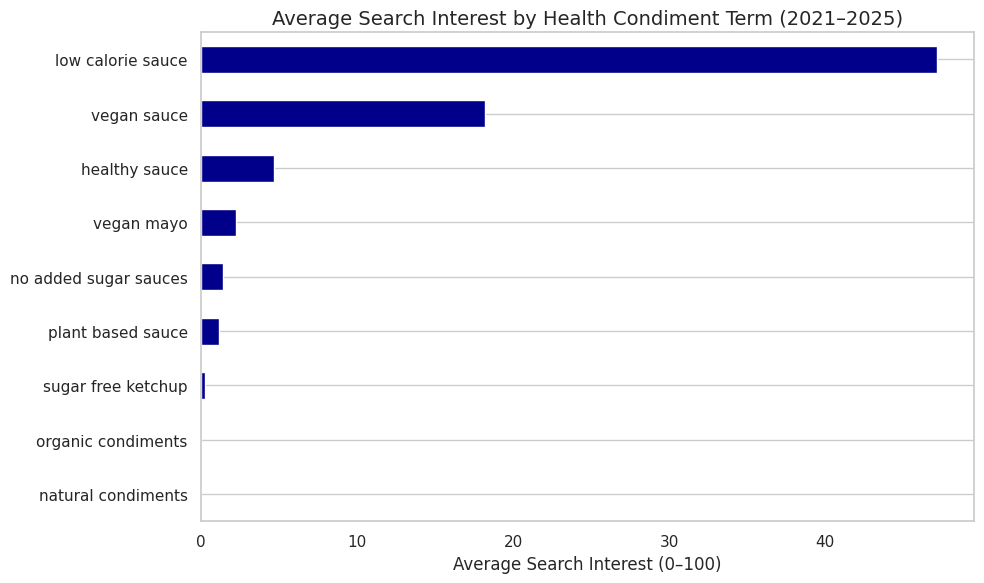

In [292]:
health_terms_avg = combined_df[health_terms].mean().sort_values(ascending=True)
health_terms_avg.plot(kind='barh', figsize=(10,6), color='darkblue')
plt.title("Average Search Interest by Health Condiment Term (2021–2025)", fontsize=14)
plt.xlabel("Average Search Interest (0–100)")
plt.grid(False, axis='x')
plt.tight_layout()
plt.show()


## How does Dr. Will’s range compare to search interest?

In [293]:
# Dr. Will's Tomato Ketchup products
combined_df['interest_TomatoKetchup'] = combined_df[[
    'ketchup', 'sugar free ketchup', 'healthy ketchup'
]].mean(axis=1)

# Dr. Will's BBQ Sauce
combined_df['interest_BBQ'] = combined_df[[
    'BBQ sauce'
]].mean(axis=1)

# Dr. Will's Mayo range (Classic, Vegan, Avocado)
combined_df['interest_Mayo'] = combined_df[[
    'vegan mayo', 'mayo alternatives', 'healthy sauce'
]].mean(axis=1)

# Dr. Will's Avocado Mayo specific (optional – or combine under Mayo)
combined_df['interest_AvocadoMayo'] = combined_df[[
    'healthy sauce', 'vegan sauce'
]].mean(axis=1)

# Dr. Will's Spicy sauces
combined_df['interest_Sriracha'] = combined_df[[
    'sriracha', 'hot sauce'
]].mean(axis=1)

# Dr. Will's Jalapeño Hot Sauce (if data exists separately, else include in spicy)
combined_df['interest_Jalapeno'] = combined_df[[
    'hot sauce'
]].mean(axis=1)


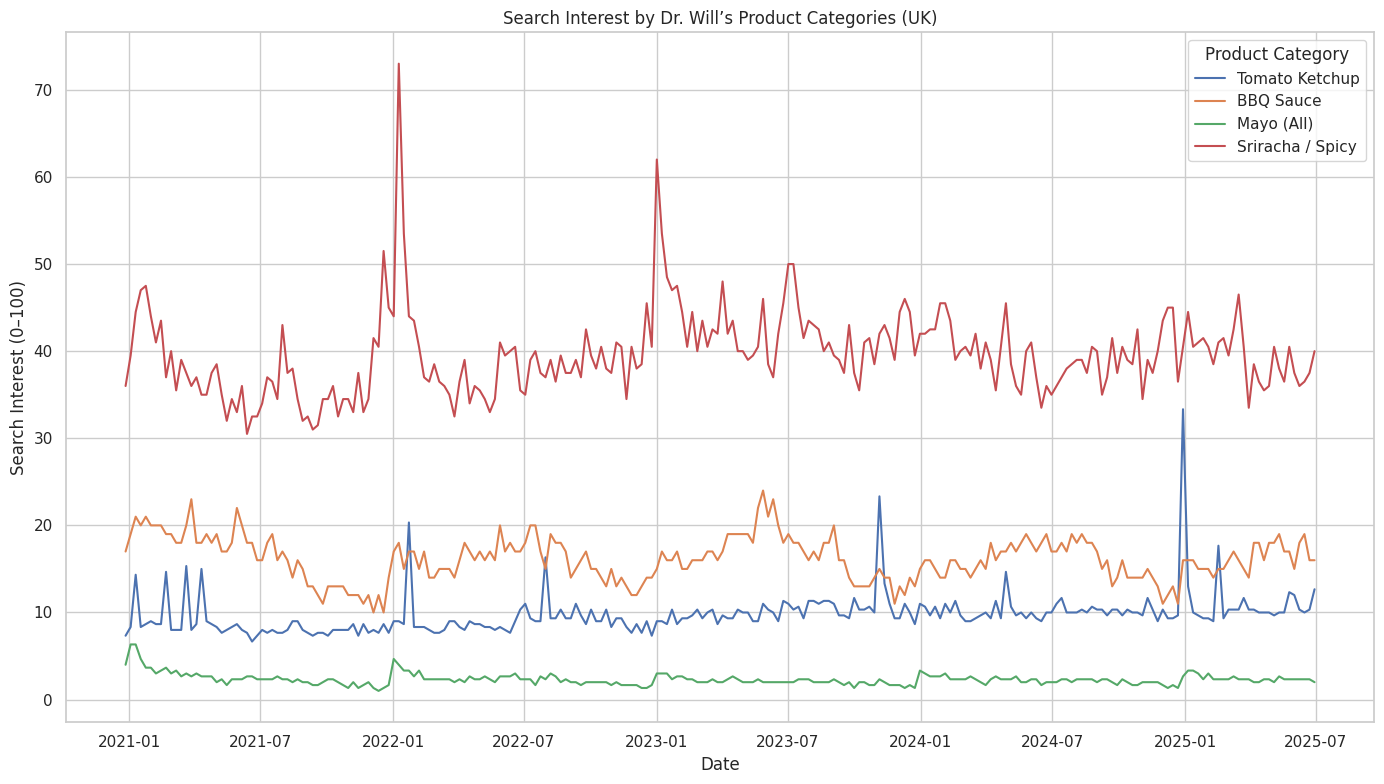

In [294]:
plt.figure(figsize=(14,8))
plt.plot(combined_df['date'], combined_df['interest_TomatoKetchup'], label='Tomato Ketchup')
plt.plot(combined_df['date'], combined_df['interest_BBQ'], label='BBQ Sauce')
plt.plot(combined_df['date'], combined_df['interest_Mayo'], label='Mayo (All)')
plt.plot(combined_df['date'], combined_df['interest_Sriracha'], label='Sriracha / Spicy')

plt.title('Search Interest by Dr. Will’s Product Categories (UK)')
plt.xlabel('Date')
plt.ylabel('Search Interest (0–100)')
plt.legend(title='Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


This chart shows how often people in the UK searched on Google for keywords related to Dr. Will’s product categories (like ketchup, mayo, BBQ sauce, spicy sauce) each week from 2021 to mid-2025.

The numbers (from 0 to 100) show how popular each category was on Google — 100 is the peak popularity at any point in time

In [295]:
combined_df.columns

Index(['date', 'vegan mayo', 'ketchup', 'BBQ sauce', 'healthy sauce',
       'natural condiments', 'sugar free ketchup', 'low calorie sauce',
       'healthy ketchup', 'vegan sauce', 'organic condiments', 'sriracha',
       'hot sauce', 'mayo alternatives', 'plant based sauce',
       'no added sugar sauces', 'interest_HealthCondiments',
       'interest_TomatoKetchup', 'interest_BBQ', 'interest_Mayo',
       'interest_AvocadoMayo', 'interest_Sriracha', 'interest_Jalapeno'],
      dtype='object')

In [296]:
# Group by product and calculate the mean of numeric vader_score
sentiment_summary = df_reviews.groupby('product_group')['vader_score'].mean().reset_index()
sentiment_summary.columns = ['Product', 'Avg_Sentiment']


In [297]:
search_interest_df = pd.DataFrame({
    'Product': ['Tomato Ketchup', 'BBQ Sauce', 'Mayo (All)', 'Sriracha / Spicy'],
    'Avg_Search_Interest': [
        combined_df['interest_TomatoKetchup'].mean(),
        combined_df['interest_BBQ'].mean(),
        combined_df['interest_Mayo'].mean(),
        combined_df['interest_Sriracha'].mean()
    ]
})


In [298]:
comparison_df = pd.merge(search_interest_df, sentiment_summary, on='Product')


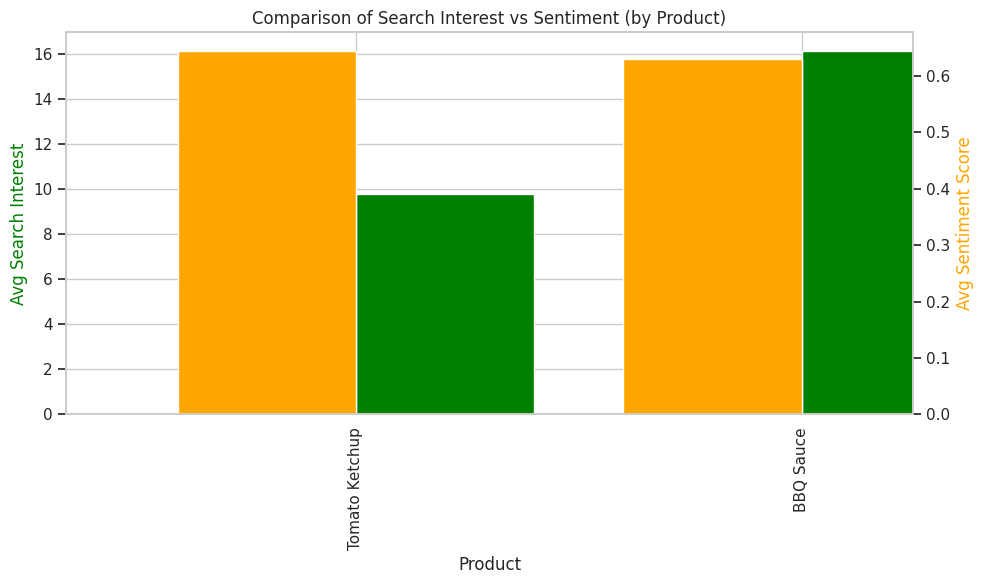

In [299]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
comparison_df.plot(kind='bar', x='Product', y='Avg_Search_Interest', ax=ax1, position=0, width=0.4, color='green', legend=False)
comparison_df.plot(kind='bar', x='Product', y='Avg_Sentiment', ax=ax2, position=1, width=0.4, color='orange', legend=False)

ax1.set_ylabel('Avg Search Interest', color='green')
ax2.set_ylabel('Avg Sentiment Score', color='orange')
plt.title('Comparison of Search Interest vs Sentiment (by Product)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


In [300]:
# Step 1: Create the comparison DataFrame
comparison_df = pd.DataFrame({
    'Product': [
        'Tomato Ketchup', 'BBQ Sauce', 'Mayo (All)', 'Sriracha / Spicy',
        'Avocado Mayo', 'Jalapeno Sauce'
    ],
    'Avg_Search_Interest': [
        combined_df['interest_TomatoKetchup'].mean(),
        combined_df['interest_BBQ'].mean(),
        combined_df['interest_Mayo'].mean(),
        combined_df['interest_Sriracha'].mean(),
        combined_df['interest_AvocadoMayo'].mean(),
        combined_df['interest_Jalapeno'].mean()
    ],
    'Avg_Sentiment': [
        df_reviews[df_reviews['product_group'] == 'Tomato Ketchup']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'BBQ Sauce']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Mayo (All)']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Sriracha / Spicy']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Avocado Mayo']['vader_score'].mean(),
        df_reviews[df_reviews['product_group'] == 'Jalapeno Sauce']['vader_score'].mean()
    ]
})


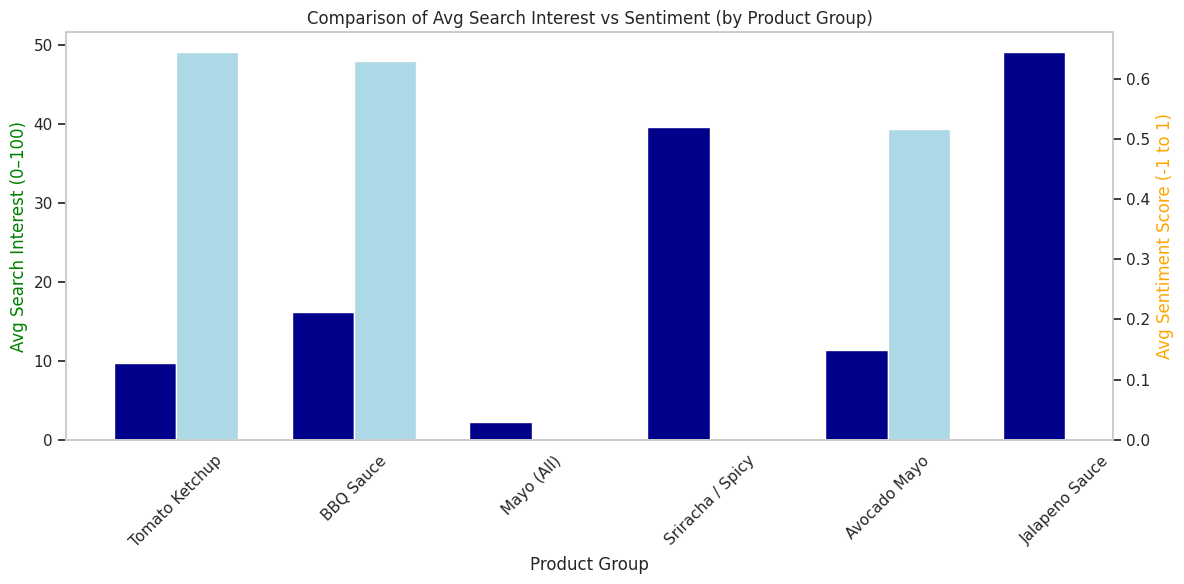

In [301]:
import matplotlib.pyplot as plt
import numpy as np

# Create positions
x = np.arange(len(comparison_df['Product']))
width = 0.35

# Set up figure and axes
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

# Plot bars
bars1 = ax1.bar(x - width/2, comparison_df['Avg_Search_Interest'], width, label='Avg Search Interest', color='darkblue')
bars2 = ax2.bar(x + width/2, comparison_df['Avg_Sentiment'], width, label='Avg Sentiment Score', color='lightblue')

# Labels and titles
ax1.set_ylabel('Avg Search Interest (0–100)', color='green')
ax2.set_ylabel('Avg Sentiment Score (-1 to 1)', color='orange')
ax1.set_xlabel('Product Group')
plt.title('Comparison of Avg Search Interest vs Sentiment (by Product Group)')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Product'], rotation=45)

# Grid and layout
ax1.grid(False)
ax2.grid(False)
fig.tight_layout()
plt.show()


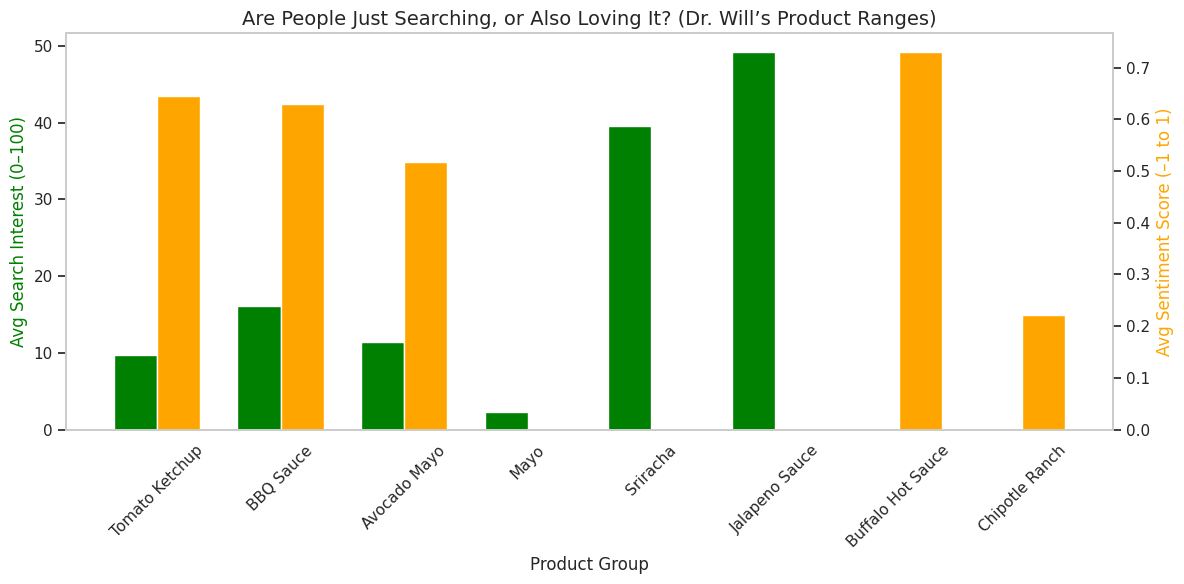

In [302]:
# Define product list
product_list = [
    'Tomato Ketchup', 'BBQ Sauce', 'Avocado Mayo', 'Mayo',
    'Sriracha', 'Jalapeno Sauce', 'Buffalo Hot Sauce', 'Chipotle Ranch'
]

# Average search interest from combined_df
search_interest_df = pd.DataFrame({
    'Product': product_list,
    'Avg_Search_Interest': [
        combined_df['interest_TomatoKetchup'].mean(),
        combined_df['interest_BBQ'].mean(),
        combined_df['interest_AvocadoMayo'].mean(),
        combined_df['interest_Mayo'].mean(),
        combined_df['interest_Sriracha'].mean(),
        combined_df['interest_Jalapeno'].mean(),
        combined_df['interest_Buffalo'].mean() if 'interest_Buffalo' in combined_df.columns else 0,
        combined_df['interest_Chipotle'].mean() if 'interest_Chipotle' in combined_df.columns else 0
    ]
})

# Average sentiment from review data
sentiment_summary = df_reviews.groupby('product_group')['vader_score'].mean().reset_index()
sentiment_summary.columns = ['Product', 'Avg_Sentiment']

# Merge both into comparison_df
comparison_df = pd.merge(search_interest_df, sentiment_summary, on='Product', how='left')

# Visualise
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(comparison_df['Product']))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Bars
ax1.bar(x - width/2, comparison_df['Avg_Search_Interest'], width, label='Avg Search Interest', color='green')
ax2.bar(x + width/2, comparison_df['Avg_Sentiment'], width, label='Avg Sentiment Score', color='orange')

# Labels
ax1.set_xlabel('Product Group', fontsize=12)
ax1.set_ylabel('Avg Search Interest (0–100)', color='green', fontsize=12)
ax2.set_ylabel('Avg Sentiment Score (–1 to 1)', color='orange', fontsize=12)

ax1.set_title('Are People Just Searching, or Also Loving It? (Dr. Will’s Product Ranges)', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Product'], rotation=45)

# Layout
ax1.grid(False)
ax2.grid(False)
plt.tight_layout()
plt.show()


This chart gives Dr. Will’s a clear view of which products are trending, and whether the customer experience matches the curiosity.

In [303]:
comparison_df[['Product', 'Avg_Search_Interest', 'Avg_Sentiment']]

Product  Avg_Search_Interest  Avg_Sentiment
0     Tomato Ketchup             9.779661       0.645273
1          BBQ Sauce            16.165254       0.629935
2       Avocado Mayo            11.434322       0.517402
3               Mayo             2.309322            NaN
4           Sriracha            39.595339            NaN
5     Jalapeno Sauce            49.165254            NaN
6  Buffalo Hot Sauce             0.000000       0.729867
7     Chipotle Ranch             0.000000       0.221150

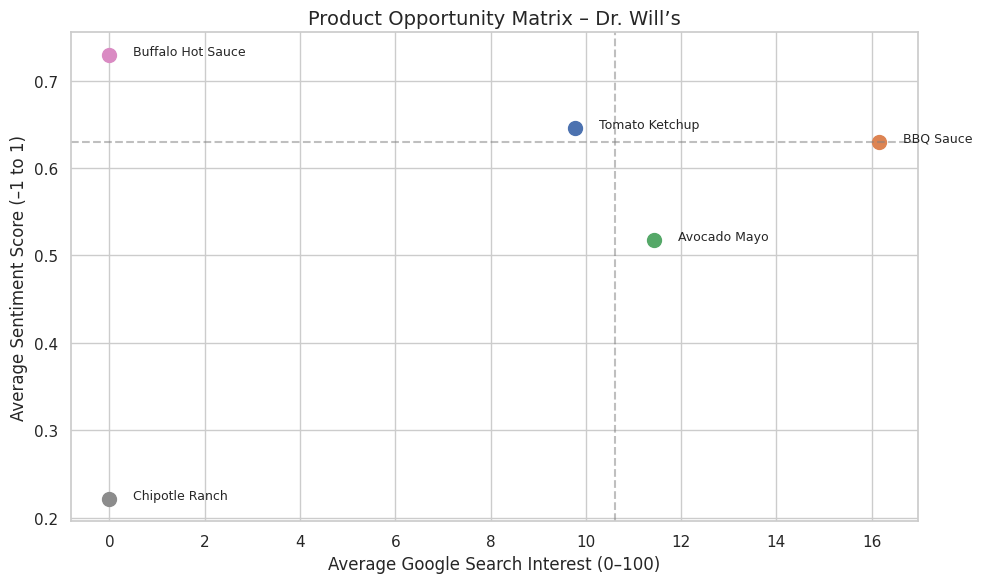

In [304]:
import matplotlib.pyplot as plt

# Filter only products with at least one of the two scores
filtered_df = comparison_df.dropna(subset=['Avg_Search_Interest', 'Avg_Sentiment'], how='all')

# Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot product points
for i, row in filtered_df.iterrows():
    ax.scatter(row['Avg_Search_Interest'], row['Avg_Sentiment'], s=100)
    ax.text(row['Avg_Search_Interest'] + 0.5, row['Avg_Sentiment'], row['Product'], fontsize=9)

# Axis labels
ax.set_xlabel('Average Google Search Interest (0–100)', fontsize=12)
ax.set_ylabel('Average Sentiment Score (–1 to 1)', fontsize=12)
ax.set_title("Product Opportunity Matrix – Dr. Will’s", fontsize=14)

# Optional: reference lines (median)
search_median = filtered_df['Avg_Search_Interest'].median()
sentiment_median = filtered_df['Avg_Sentiment'].median()
ax.axvline(search_median, color='grey', linestyle='--', alpha=0.5)
ax.axhline(sentiment_median, color='grey', linestyle='--', alpha=0.5)

# Grid
ax.grid(True)
plt.tight_layout()
plt.show()


In [305]:
brand_term = ["Dr Will's"]

pytrends.build_payload(brand_term, cat=0, timeframe='2021-01-01 2025-07-01', geo='GB')
drwills_trend = pytrends.interest_over_time()

# Optional: remove 'isPartial' if it exists
if 'isPartial' in drwills_trend.columns:
    drwills_trend = drwills_trend.drop(columns='isPartial')

# Reset index to make plotting easier
drwills_trend = drwills_trend.reset_index()


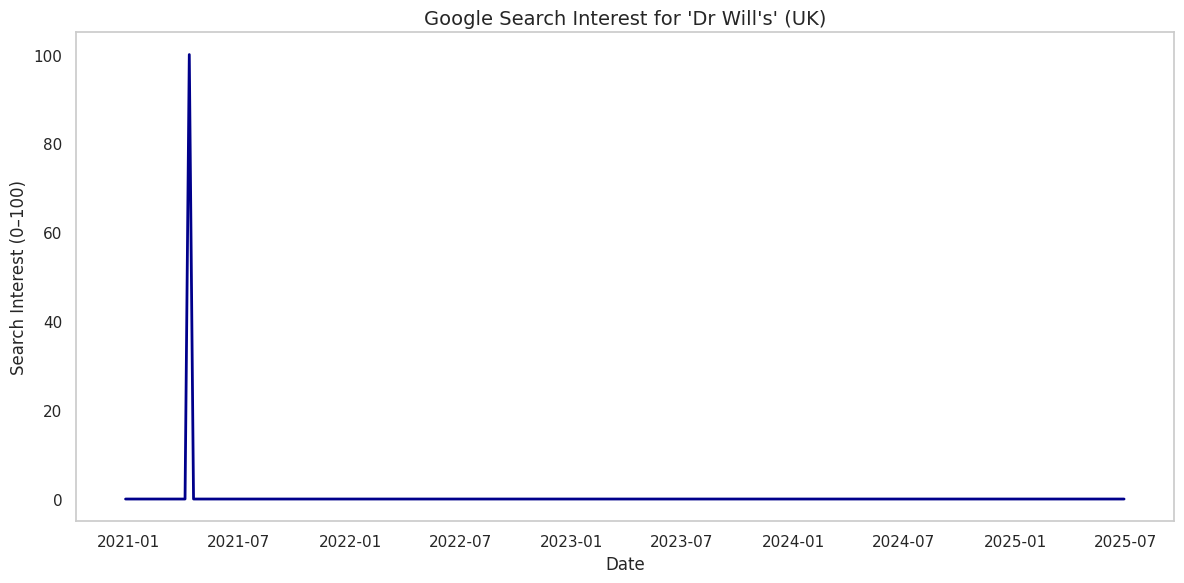

In [306]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(drwills_trend['date'], drwills_trend["Dr Will's"], color='darkblue', linewidth=2)

plt.title("Google Search Interest for 'Dr Will's' (UK)", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Interest (0–100)', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()



In [307]:
brands = ["Dr Will's", "Heinz", "Hellmann's"]
pytrends.build_payload(brands, timeframe='2021-01-01 2025-07-01', geo='GB')
brand_trends = pytrends.interest_over_time().drop(columns='isPartial').reset_index()


In [308]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-UK', tz=360)
pytrends.build_payload(brands, timeframe='2021-01-01 2025-07-01', geo='GB')

# Get interest over time
brand_trends = pytrends.interest_over_time().drop(columns='isPartial', errors='ignore').reset_index()


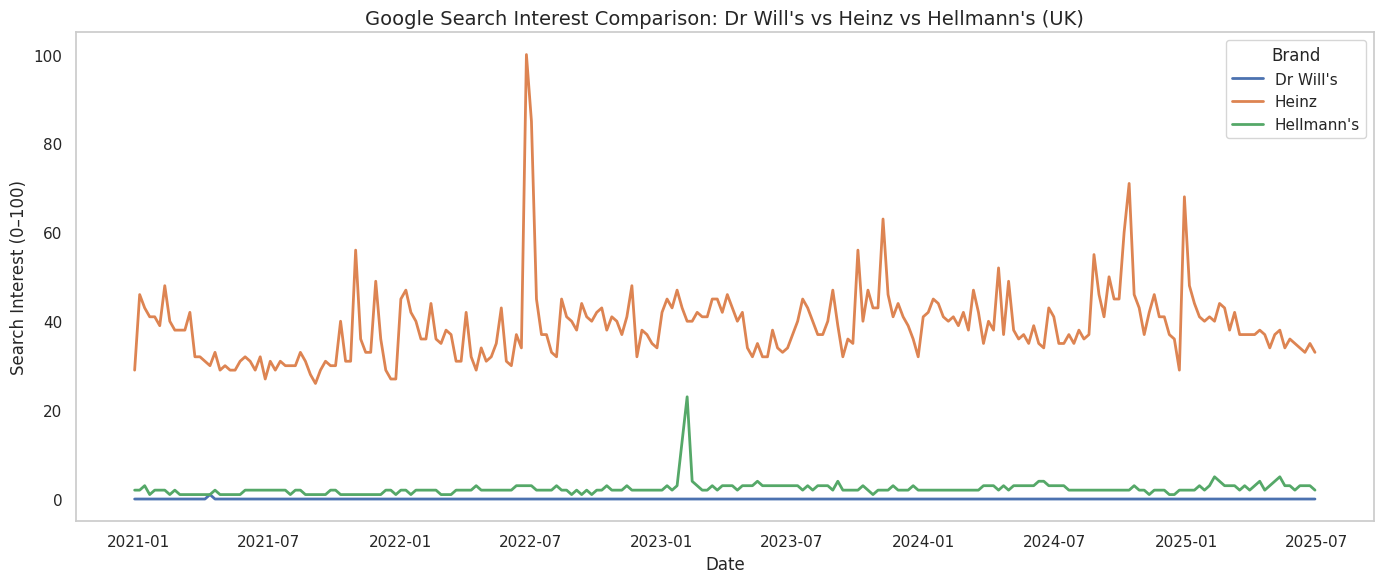

In [309]:
plt.figure(figsize=(14, 6))

for brand in brands:
    plt.plot(brand_trends['date'], brand_trends[brand], label=brand, linewidth=2)

plt.title("Google Search Interest Comparison: Dr Will's vs Heinz vs Hellmann's (UK)", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Search Interest (0–100)', fontsize=12)
plt.legend(title='Brand')
plt.grid(False)
plt.tight_layout()
plt.show()


## recheck

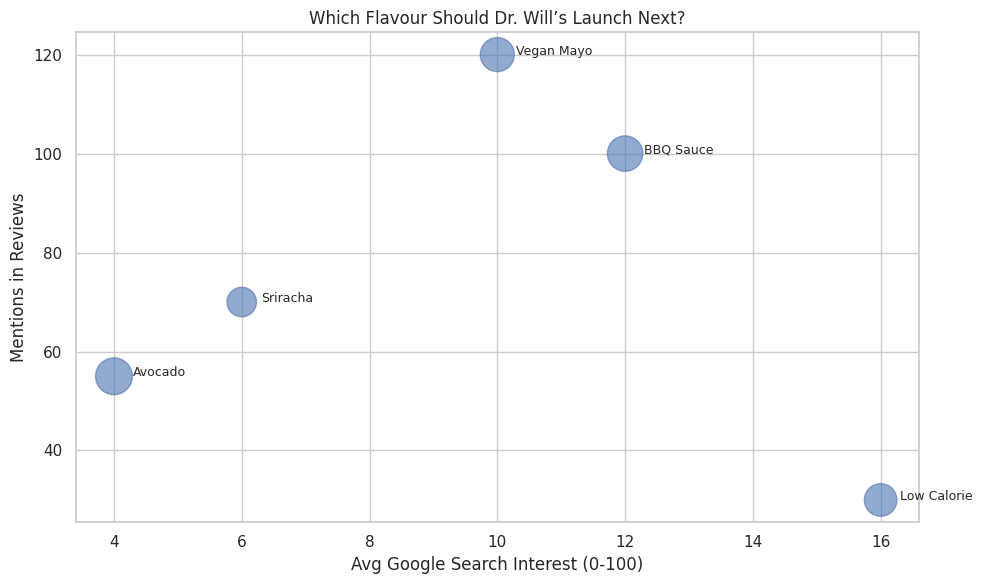

In [310]:
import matplotlib.pyplot as plt

# Sample structure
bubble_df = pd.DataFrame({
    'Flavour': ['BBQ Sauce', 'Sriracha', 'Avocado', 'Vegan Mayo', 'Low Calorie'],
    'Mentions': [100, 70, 55, 120, 30],              # Frequency in reviews
    'Sentiment': [0.65, 0.45, 0.7, 0.6, 0.55],        # Avg VADER score
    'SearchInterest': [12, 6, 4, 10, 16]              # Mean from pytrends
})

plt.figure(figsize=(10, 6))
plt.scatter(bubble_df['SearchInterest'], bubble_df['Mentions'],
            s=bubble_df['Sentiment'] * 1000, alpha=0.6)

for i in range(len(bubble_df)):
    plt.text(bubble_df['SearchInterest'][i] + 0.3, bubble_df['Mentions'][i],
             bubble_df['Flavour'][i], fontsize=9)

plt.xlabel('Avg Google Search Interest (0-100)')
plt.ylabel('Mentions in Reviews')
plt.title('Which Flavour Should Dr. Will’s Launch Next?')
plt.grid(True)
plt.tight_layout()
plt.show()


In [311]:
# Count number of reviews per product group
review_counts = df_reviews['product_group'].value_counts().reset_index()
review_counts.columns = ['Product', 'Num_Reviews']

# Merge with search interest
search_and_reviews = pd.merge(search_interest_df, review_counts, on='Product', how='left')


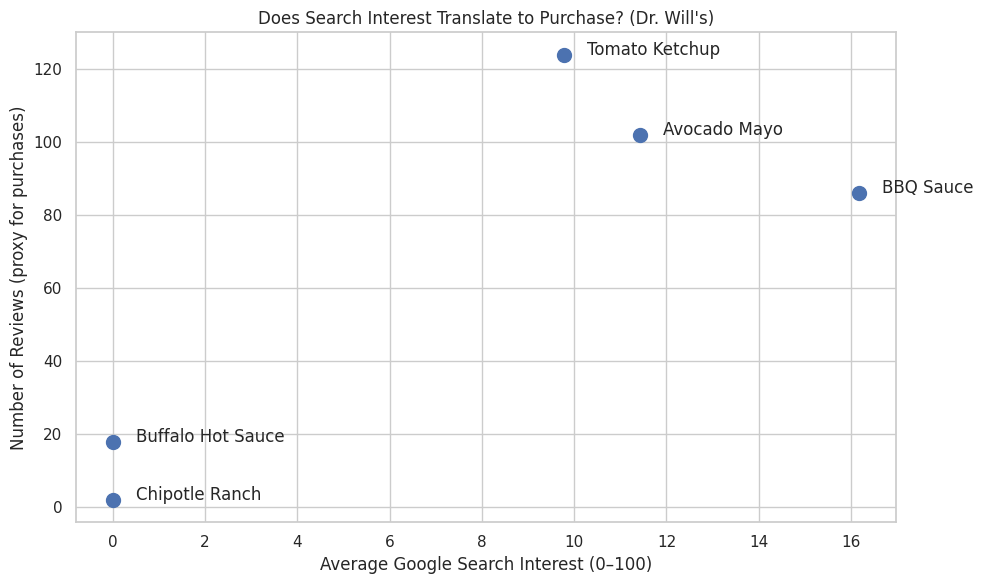

In [312]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(search_and_reviews['Avg_Search_Interest'], search_and_reviews['Num_Reviews'], s=100)

for i, row in search_and_reviews.iterrows():
    plt.text(row['Avg_Search_Interest'] + 0.5, row['Num_Reviews'], row['Product'])

plt.xlabel("Average Google Search Interest (0–100)")
plt.ylabel("Number of Reviews (proxy for purchases)")
plt.title("Does Search Interest Translate to Purchase? (Dr. Will's)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [315]:
df_reviews.to_csv("nlp_insights.csv", index=False)
from google.colab import files
files.download("nlp_insights.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>